# 1. Data Wrangling<a id='1_Data_Wrangling'></a>


## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data Wrangling](#1_Data_wrangling)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction) <a id='1.2_Introduction'></a>
    * [1.2.1 Recap Of Data Science Problem](#1.2.1_Recap_Of_Data_Science_Problem)
    * [1.2.2 Introduction To Notebook](#1.2.2_Introduction_To_Notebook)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load the IMDB Data](#1.4_Load_the_IMDB_Data)
      * [1.4.1 Explore the Data and Handle Missing Data](#1.4.1_Explore_the_Data_and_Handle_Missing_Data)
  * [1.5 Load Datasets on Netflix, Hulu, Disney, HBO(Max) and Prime, and Clean Them](#1.5_Load_Datasets_on_Netflix,_Hulu,_Disney,_HBO(Max)_and_Prime,_and_Clean_Them)
      * [1.5.1 Merge the Streamer_Datasets](#1.5.1_Merge_the_Streamer_Datasets)
      
  * [1.6 Add New Columns using IMDB and TMDB libraries and Cleaning Them](#1.6_Add_New_Columns_using_IMDB_and_TMDB_libraries_and_Cleaning_Them)
  * [1.7 Summary](#1.7_Summary)


## 1.3 Introduction<a id='1.3_Introduction'></a>

This step focuses on collecting data, organizing it, and making sure it's well defined and accurate. Some data cleaning and feature engineering will be done at this stage.

### 1.2.1 Recap Of Data Science Problem<a id='1.2.1_Recap_Of_Data_Science_Problem'></a>

Gaumont, a France-based big international studio, which often collaborates with Streamers, would like to learn which features of a fiction TV-series render the show successful based on the popularity of the TV series produced and streamed on the big streamers, Hulu, Disney, Prime, HBO(Max) and Netflix. They are also curious how the variables of a successful show have changed since the pandemic.
(Note: This is a hypothetical problem.)

### 1.2.2 Introduction To Notebook<a id='1.2.2_Introduction_To_Notebook'></a>

In this notebook, there are multiple datasets gathered from online sources like kaggle, imdb and tmdb.

Many times we used tmdb and imdb modules which can spend a lot of time in finding the results for over 1000 shows. That's why you'll see many shortcuts leading to the datasets that have already implemented the results of these functions from imdb and tmdb modules. All these datasets are properly saved.

## 1.3 Imports<a id='1.3_Imports'></a>

In [2]:
from imdb import Cinemagoer
import pandas as pd
import requests
import os
import datetime as dt
import numpy as np
import re


## 1.4 Load the IMDB Data<a id='1.4_Load_the_IMDB_Data'></a> 

Importing official dataset of imdb,title.ratings.tsv.gz, that is updated daily. 
(Please look for the shortcut that includes the resulting dataset.)

In [1296]:
#creating a dataframe with 3 columns out of the title.ratings tsv file
imdb_ratings = pd.read_csv ('https://datasets.imdbws.com/title.ratings.tsv.gz', delimiter= "\t" )

#putting datestamp since the imdb datasets are updated daily
today = dt.date.today().strftime('%Y-%m-%d')
print ("data was collected on {}".format(today))
print (imdb_ratings.head())


data was collected on 2024-01-20
      tconst  averageRating  numVotes
0  tt0000001            5.7      2015
1  tt0000002            5.7       270
2  tt0000003            6.5      1938
3  tt0000004            5.5       178
4  tt0000005            6.2      2716


Importing official dataset of imdb, title.basics.tsv.gz, that is updated daily. 
(Please look for the shortcut that includes the resulting dataset.)

In [1297]:
imdb_shows = pd.read_csv ('https://datasets.imdbws.com/title.basics.tsv.gz', on_bad_lines='error', delimiter = "\t" )
print ("data was collected on {}".format (today))
print (imdb_shows.head())

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/981154336.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_shows = pd.read_csv ('https://datasets.imdbws.com/title.basics.tsv.gz', on_bad_lines='error', delimiter = "\t" )


data was collected on 2024-01-20
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  


In [1299]:
# renaming the rating columns for clarity
imdb_ratings.rename(columns= {'tconst': 'imdb_id', 'averageRating':'imdb_rating', 'numVotes': 'imdb_no_votes'},inplace = True)
imdb_ratings.columns

Index(['imdb_id', 'imdb_rating', 'imdb_no_votes'], dtype='object')

In [1298]:
imdb_ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [1300]:
#converting imdb_id to string type
imdb_ratings.imdb_id = imdb_ratings.imdb_id.astype('string')
imdb_ratings.dtypes

imdb_id           string
imdb_rating      float64
imdb_no_votes      int64
dtype: object

Shortcut for title.ratings.tsv.gz:

In [1272]:
# saving the rating dataframe as it is on December 23rd 2023
#imdb_ratings.to_csv('datasets/imdb_ratings122323.csv', index=False)
#reopening
#imdb_ratings = pd.read_csv ("datasets/imdb_ratings122323.csv")

In [1301]:
imdb_shows.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [1302]:
imdb_shows.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [1303]:
#dropping 'isAdult'column.
imdb_shows.drop (columns = 'isAdult', inplace = True)

In [1304]:
imdb_shows.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [1305]:
imdb_shows.sort_values(by = 'startYear', inplace = True)
imdb_shows.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
7460119,tt3155794,short,Passage de Venus,Passage de Venus,1874,\N,1,"Documentary,Short"
3423752,tt14495706,short,La Rosace Magique,La Rosace Magique,1877,\N,1,"Animation,Short"
4494852,tt16763674,short,The Tight-rope Dance,La danse sur la corde,1877,\N,1,"Animation,Short"
4494894,tt16763774,short,Dzing. Boom. Boom!,Zimm. Boum. Boum!,1877,\N,1,"Animation,Short"
4494881,tt16763740,short,Skipping Rope,Le jeu de corde,1877,\N,1,"Animation,Short"


In [1306]:
imdb_shows.reset_index(inplace = True)

In [1307]:
#checking the index number where our dataframe will start. This timeframe would include anything from Seinfeld to Black Mirror.

imdb_shows[(imdb_shows['endYear'] >= '1994') & (imdb_shows['startYear'] <= '2023')]

,index,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,7460119,tt3155794,short,Passage de Venus,Passage de Venus,1874,\N,1,"Documentary,Short"
1,3423752,tt14495706,short,La Rosace Magique,La Rosace Magique,1877,\N,1,"Animation,Short"
2,4494852,tt16763674,short,The Tight-rope Dance,La danse sur la corde,1877,\N,1,"Animation,Short"
3,4494894,tt16763774,short,Dzing. Boom. Boom!,Zimm. Boum. Boum!,1877,\N,1,"Animation,Short"
4,4494881,tt16763740,short,Skipping Rope,Le jeu de corde,1877,\N,1,"Animation,Short"
...,...,...,...,...,...,...,...,...,...
9079249,7307447,tt30387465,tvEpisode,Gangsterjagd - Polizei im Kampf gegen die Mafia,Gangsterjagd - Polizei im Kampf gegen die Mafia,2023,\N,\N,"Documentary,News"
9079250,5128830,tt19899298,movie,Sit Down Stand Up,Sit Down Stand Up,2023,\N,\N,Comedy
9079251,7357082,tt30624617,tvEpisode,The Four Horsemen: Reverend Dave Robbins Day 1,The Four Horsemen: Reverend Dave Robbins Day 1,2023,\N,\N,Talk-Show
9079252,6574992,tt27572565,tvEpisode,Episode #1.13,Episode #1.13,2023,\N,\N,Drama


In [1308]:
# dropping all titles before 2015 and after 2023 (not released)
imdb_df =  imdb_shows[(imdb_shows['startYear'] >= '1980') & (imdb_shows['startYear'] <= '2023')]
imdb_df

,index,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
970049,8166260,tt4766390,tvEpisode,To Be Announced,To Be Announced,1980,\N,\N,"Horror,News"
970050,3989641,tt1554576,tvEpisode,England vs West Indies: Prudential Trophy - 2n...,England vs West Indies: Prudential Trophy - 2n...,1980,\N,\N,Sport
970051,8166261,tt4766392,tvEpisode,The Eyes of Charles Sand,The Eyes of Charles Sand,1980,\N,\N,"Horror,News"
970052,992827,tt10045366,tvEpisode,Rodeo Ruckus/Movie Mischief,Rodeo Ruckus/Movie Mischief,1980,\N,\N,"Adventure,Animation,Family"
970053,4073932,tt1569749,tvEpisode,Episode #1.1248,Episode #1.1248,1980,\N,22,"Drama,Romance"
...,...,...,...,...,...,...,...,...,...
9079249,7307447,tt30387465,tvEpisode,Gangsterjagd - Polizei im Kampf gegen die Mafia,Gangsterjagd - Polizei im Kampf gegen die Mafia,2023,\N,\N,"Documentary,News"
9079250,5128830,tt19899298,movie,Sit Down Stand Up,Sit Down Stand Up,2023,\N,\N,Comedy
9079251,7357082,tt30624617,tvEpisode,The Four Horsemen: Reverend Dave Robbins Day 1,The Four Horsemen: Reverend Dave Robbins Day 1,2023,\N,\N,Talk-Show
9079252,6574992,tt27572565,tvEpisode,Episode #1.13,Episode #1.13,2023,\N,\N,Drama


Shortcut for  title.basics.tsv.gz:

In [1309]:
# save the dataframe to csv 
#imdb_df.to_csv('datasets/imdb_shows010224.csv', index=False)
#reopening
imdb_df = pd.read_csv ('datasets/imdb_shows010224.csv')

## 1.4.1 Explore the Data and Handle Missing Data
<a id='1.4.1_Explore_the_Data_and_Handle_Missing_Data'></a>

In [1282]:
imdb_df.head()

,index,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,79281,tt0081013,movie,Koto,Koto,1980,\N,125,Drama
1,4949460,tt19062996,videoGame,Super Knockout,Super Knockout,1980,\N,\N,Family
2,7107215,tt29486654,tvEpisode,Yokubari Kikyôya to damasa reta shôgun,Yokubari Kikyôya to damasa reta shôgun,1980,\N,24,"Animation,Comedy,History"
3,9162437,tt7110072,tvEpisode,Episode #1.205,Episode #1.205,1980,\N,22,"Drama,Romance"
4,9521474,tt7895156,tvEpisode,Episode #1.57,Episode #1.57,1980,\N,\N,"Drama,Romance"


In [1310]:
#investigating the types of projects since we only want a fiction or non-fiction tv series.
imdb_df['titleType'].unique()

array(['movie', 'videoGame', 'tvEpisode', 'video', 'tvSeries', 'tvMovie',
       'tvSpecial', 'short', 'tvShort', 'tvMiniSeries', 'tvPilot'],
      dtype=object)

In [1311]:
# checking the unique values of 'runtimeMinutes' that is also a good indicator to spot the right project titles.
imdb_df.runtimeMinutes.unique()

array(['125', '\\N', '24', '22', '90', '120', '105', '93', '60', '30',
       '141', '79', '61', '58', '96', '43', '25', '27', '95', '23', '85',
       '44', '42', '110', '62', '40', '50', '66', '91', '97', '89', '131',
       '100', '55', '92', '156', '8', '86', '146', '70', '45', '117',
       '114', '83', '15', '57', '101', '10', '87', '103', '99', '80', '6',
       '12', '98', '72', '1', '49', '111', '11', '82', '29', '38', '17',
       '73', '94', '48', '35', '2', '9', '78', '26', '160', '106', '81',
       '77', '124', '159', '112', '129', '37', '139', '88', '13', '180',
       '75', '14', '59', '145', '130', '360', '46', '28', '64', '31',
       '104', '84', '240', '20', '150', '127', '16', '52', '275', '36',
       '4', '118', '121', '56', '126', '65', '138', '54', '71', '69',
       '137', '19', '102', '261', '153', '133', '67', '107', '53', '135',
       '3', '113', '115', '142', '7', '47', '173', '39', '63', '76',
       '152', '119', '122', '32', '109', '128', '194', '108',

Please note that missing values of imdb datasets are indicated with the string, "\\N".

Converting the missing value indicator, ''\\N' to zero so that I can convert the column to int64. I'll later drop them. 

In [1312]:
imdb_df.loc[imdb_df['runtimeMinutes'] == '\\N', 'runtimeMinutes'] = '0'

In [187]:
imdb_df.startYear.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [1313]:
imdb_df.endYear.unique()

array(['\\N', '1982', '1980', '2008', '2016', '1995', '1983', '1984',
       '1981', '1991', '2007', '1986', '1985', '1987', '1988', '1990',
       '2001', '1993', '2019', '1989', '1994', '1996', '2012', '2002',
       '2003', '1999', '2017', '1992', '2006', '2023', '1998', '2009',
       '2000', '2020', '2004', '2015', '2011', '2018', '1997', '2010',
       '2022', '2005', '2013', '2021', '2014', '2024', '2025', '2026',
       '2027', '2028', '2030'], dtype=object)

At somepoint I'll drop 'tvEpisode' rows since they are the subcategories of 'TvSeries'. We are concerned with the show itself not is episodes that have their separate profiles on imdb.

In [1314]:
# before dropping or renaming '\\N' we should understand if the data was not available or if the show was still on.
#I'll mark 0 and not drop the rows for safety.

imdb_df.loc[imdb_df['endYear'] == '\\N', ['endYear']] = 0
imdb_df.head()

,index,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,79281,tt0081013,movie,Koto,Koto,1980,0,125,Drama
1,4949460,tt19062996,videoGame,Super Knockout,Super Knockout,1980,0,0,Family
2,7107215,tt29486654,tvEpisode,Yokubari Kikyôya to damasa reta shôgun,Yokubari Kikyôya to damasa reta shôgun,1980,0,24,"Animation,Comedy,History"
3,9162437,tt7110072,tvEpisode,Episode #1.205,Episode #1.205,1980,0,22,"Drama,Romance"
4,9521474,tt7895156,tvEpisode,Episode #1.57,Episode #1.57,1980,0,0,"Drama,Romance"


In [1315]:
# changing the types of columns
imdb_df.primaryTitle = imdb_df.primaryTitle.astype('string')
imdb_df.genres = imdb_df.genres.astype('string')
imdb_df.tconst = imdb_df.tconst.astype('string')
imdb_df.startYear = imdb_df.startYear.astype('Int64')
imdb_df.titleType = imdb_df.titleType.astype('string')
imdb_df.endYear = imdb_df.endYear.astype(float).astype('Int64')
imdb_df.originalTitle = imdb_df.primaryTitle.astype('string')

imdb_df.runtimeMinutes = imdb_df.runtimeMinutes.astype(float).astype('Int64')


In [1316]:
imdb_df.dtypes

index              int64
tconst            string
titleType         string
primaryTitle      string
originalTitle     string
startYear          Int64
endYear            Int64
runtimeMinutes     Int64
genres            string
dtype: object

In [1317]:
# changing 'primaryTitle' to Title and 'tconst' to imdb_id
imdb_df.rename(columns = {'primaryTitle': 'Title', 'tconst': 'imdb_id'}, inplace = True)
imdb_df.head()

,index,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres
0,79281,tt0081013,movie,Koto,Koto,1980,0,125,Drama
1,4949460,tt19062996,videoGame,Super Knockout,Super Knockout,1980,0,0,Family
2,7107215,tt29486654,tvEpisode,Yokubari Kikyôya to damasa reta shôgun,Yokubari Kikyôya to damasa reta shôgun,1980,0,24,"Animation,Comedy,History"
3,9162437,tt7110072,tvEpisode,Episode #1.205,Episode #1.205,1980,0,22,"Drama,Romance"
4,9521474,tt7895156,tvEpisode,Episode #1.57,Episode #1.57,1980,0,0,"Drama,Romance"


In [1318]:
imdb_df.shape

(8078975, 9)

In [1319]:
imdb_df.columns

Index(['index', 'imdb_id', 'titleType', 'Title', 'originalTitle', 'startYear',
       'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

Then I aimed to eliminate all content above 120 minutes. (some shows have very long finales so 120 min sounds right). However, some runtimeminutes inputs were the total rt for the whole series, instead of per episode. So I had to undo that function below.  

In [1320]:
#eliminating content above 120 minutes for tv shows 
#made sense but unfortunately users wrote down RT sometimes per episode and sometimes for the whole series. so can't do it.
#indexRunT = imdb1_df[(imdb1_df['runtimeMinutes'] >=120)& (imdb1_df['runtimeMinutes']!= 0)].index
#imdb1_df.drop(indexRunT , inplace=True)
#imdb2_df.head(5)

In [1321]:
imdb_df.titleType.unique()

<StringArray>
[       'movie',    'videoGame',    'tvEpisode',        'video',
     'tvSeries',      'tvMovie',    'tvSpecial',        'short',
      'tvShort', 'tvMiniSeries',      'tvPilot']
Length: 11, dtype: string

In [1322]:
#Eliminating non-movie content. I decided not to do this function because the genres of many projects were mislabeled in other lists.
#indexTitle = imdb1_df[ (imdb1_df ['titleType'] != 'tvSeries') & (imdb1_df ['titleType'] != 'tvMiniSeries') & (imdb1_df ['titleType'] != 'tvSpecial')].index
#imdb1_df.drop(indexTitle , inplace=True)
#imdb1_df.head(5)

In [1323]:
imdb_df.shape

(8078975, 9)

I'll make this list as small as possible getting rid of NaN values.

In [1324]:
imdb_df.isna().any()

index             False
imdb_id           False
titleType         False
Title              True
originalTitle      True
startYear         False
endYear           False
runtimeMinutes    False
genres            False
dtype: bool

In [1325]:
imdb_ratings.columns

Index(['imdb_id', 'imdb_rating', 'imdb_no_votes'], dtype='object')

In [1326]:
# merging it with imdb_rating dataframe
imdb_DF = imdb_df.merge(imdb_ratings, on= ['imdb_id'], how='left')

imdb_DF.head()

,index,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes
0,79281,tt0081013,movie,Koto,Koto,1980,0,125,Drama,6.7,100.0
1,4949460,tt19062996,videoGame,Super Knockout,Super Knockout,1980,0,0,Family,NaN,NaN
2,7107215,tt29486654,tvEpisode,Yokubari Kikyôya to damasa reta shôgun,Yokubari Kikyôya to damasa reta shôgun,1980,0,24,"Animation,Comedy,History",NaN,NaN
3,9162437,tt7110072,tvEpisode,Episode #1.205,Episode #1.205,1980,0,22,"Drama,Romance",NaN,NaN
4,9521474,tt7895156,tvEpisode,Episode #1.57,Episode #1.57,1980,0,0,"Drama,Romance",NaN,NaN


In [1327]:
imdb_DF.isna().any()

index             False
imdb_id           False
titleType         False
Title              True
originalTitle      True
startYear         False
endYear           False
runtimeMinutes    False
genres            False
imdb_rating        True
imdb_no_votes      True
dtype: bool

In [1328]:
imdb_DF.imdb_rating.isna().sum()

6873655

In [1329]:
imdb_DF.imdb_no_votes.isna().sum()

6873655

In [1330]:
imdb_DF.dropna(inplace = True)
imdb_DF.head()

,index,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes
0,79281,tt0081013,movie,Koto,Koto,1980,0,125,Drama,6.7,100.0
14,79475,tt0081216,movie,The Leg Fighters,The Leg Fighters,1980,0,90,"Action,Comedy,Drama",5.7,125.0
21,79396,tt0081130,movie,Marmalade Revolution,Marmalade Revolution,1980,0,93,"Comedy,Drama",4.9,101.0
26,79478,tt0081219,movie,The Naxalites,The Naxalites,1980,0,141,Drama,6.5,26.0
29,79280,tt0081012,movie,The Raven's Dance,The Raven's Dance,1980,0,79,Drama,7.0,71.0


In [1331]:
imdb_DF.reset_index

<bound method DataFrame.reset_index of            index     imdb_id  titleType  \
0          79281   tt0081013      movie   
14         79475   tt0081216      movie   
21         79396   tt0081130      movie   
26         79478   tt0081219      movie   
29         79280   tt0081012      movie   
...          ...         ...        ...   
8078920  5894756  tt23184688  tvEpisode   
8078932  6972178  tt28863512  tvSpecial   
8078950  6977148  tt28905458  tvEpisode   
8078951  6976045  tt28892662  tvEpisode   
8078974  6985163  tt28972255  tvEpisode   

                                              Title  \
0                                              Koto   
14                                 The Leg Fighters   
21                             Marmalade Revolution   
26                                    The Naxalites   
29                                The Raven's Dance   
...                                             ...   
8078920                                Episode #1.6   
8078

Finally let's drop all documentaries because we are  interested in narrative films.

## 1.5  Load Datasets on Netflix, Hulu, Disney, HBO(Max) and Prime, and Clean Them
<a id='1.5_Load_Datasets_on_Netflix,_Hulu,_Disney,_HBO(Max)_and_Prime,_and_Clean_Them'></a>


In [1332]:
netflix = pd.read_csv ('datasets/All Netflix Originals.csv')
netflix.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt1856010,2022-01-01,2022-01-01,NaN,House of Cards,https://www.imdb.com/title/tt1856010/,tvSeries,8.6,3804.0,2013,Drama,524712.0,2013-02-01,NaN
1,2,tt2309295,2022-01-01,2022-01-01,NaN,Hemlock Grove,https://www.imdb.com/title/tt2309295/,tvSeries,7.0,46.0,2013,"Drama, Fantasy, Horror, Mystery, Sci-Fi, Thriller",42182.0,2013-04-18,NaN
2,3,tt2372162,2022-01-01,2022-01-01,NaN,Orange Is the New Black,https://www.imdb.com/title/tt2372162/,tvSeries,8.0,59.0,2013,"Comedy, Crime, Drama",316539.0,2013-07-11,NaN
3,4,tt2189461,2022-01-01,2022-01-01,NaN,Marco Polo,https://www.imdb.com/title/tt2189461/,tvSeries,8.0,60.0,2014,"Action, Adventure, Drama, History",77197.0,2014-12-12,NaN
4,5,tt3520702,2022-01-01,2022-01-01,NaN,Bloodline,https://www.imdb.com/title/tt3520702/,tvSeries,7.9,60.0,2015,"Drama, Thriller",57449.0,2015-02-09,NaN


In [1333]:
netflix.columns

Index(['Position', 'Const', 'Created', 'Modified', 'Description', 'Title',
       'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres',
       'Num Votes', 'Release Date', 'Directors'],
      dtype='object')

In [1334]:
netflix.drop (columns = ['Position', 'URL', 'Title Type','Position', 'Modified', 'Created', 'IMDb Rating', 'Runtime (mins)',
                        'Year', 'Genres', 'Num Votes', 'Release Date', 'Title', 'Description'], inplace = True)


In [1335]:
netflix.rename(columns = {"Const": 'imdb_id'}, inplace = True)
netflix['Streamer'] = 'Netflix'
netflix.head()

,imdb_id,Directors,Streamer
0,tt1856010,NaN,Netflix
1,tt2309295,NaN,Netflix
2,tt2372162,NaN,Netflix
3,tt2189461,NaN,Netflix
4,tt3520702,NaN,Netflix


In [1336]:
#importing Prime movies
prime1 = pd.read_csv ('datasets/Amazon Prime Original Series1.csv')
prime1.columns

Index(['Position', 'Const', 'Created', 'Modified', 'Description', 'Title',
       'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres',
       'Num Votes', 'Release Date', 'Directors'],
      dtype='object')

In [1337]:
prime2 = pd.read_csv ('datasets/Amazon Prime Original Series2.csv')
prime2.columns

Index(['Position', 'Const', 'Created', 'Modified', 'Description', 'Title',
       'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres',
       'Num Votes', 'Release Date', 'Directors'],
      dtype='object')

In [1338]:
# concatting with the 2nd list

prime = pd.concat([prime1, prime2])
prime.drop (columns = ['URL', 'Title Type', 'Position', 'Modified', 'Created', 'IMDb Rating', 'Runtime (mins)',
                        'Year', 'Genres', 'Num Votes', 'Release Date', 'Title', 'Description'], inplace = True)

prime.rename(columns = {"Const": 'imdb_id'}, inplace = True)

prime['Streamer'] = 'Prime'
prime.head()

,imdb_id,Directors,Streamer
0,tt3502248,NaN,Prime
1,tt3973768,NaN,Prime
2,tt1740299,NaN,Prime
3,tt2805574,NaN,Prime
4,tt4687880,NaN,Prime


In [1339]:
prime.columns

Index(['imdb_id', 'Directors', 'Streamer'], dtype='object')

In [1340]:
# adding the popular show Fleabag which was a coproduction between Amazon and BBC through its imdb_ids. 

new_row = {'imdb_id':['tt5687612'],
        'Directors':['Harry Bradbeer, Tim Kirkby'],
        'Streamer':['Prime']
       }
df = pd.DataFrame(new_row)
prime = pd.concat([prime, df])




In [1341]:
#testing
prime[prime['imdb_id']== 'tt5687612']

,imdb_id,Directors,Streamer
0,tt5687612,"Harry Bradbeer, Tim Kirkby",Prime


In [1342]:
prime.head()

,imdb_id,Directors,Streamer
0,tt3502248,NaN,Prime
1,tt3973768,NaN,Prime
2,tt1740299,NaN,Prime
3,tt2805574,NaN,Prime
4,tt4687880,NaN,Prime


In [1343]:
#importing Disney+ movies
disney = pd.read_csv ('datasets/All Disney+ Originals.csv')
disney.columns

Index(['Position', 'Const', 'Created', 'Modified', 'Description', 'Title',
       'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres',
       'Num Votes', 'Release Date', 'Directors'],
      dtype='object')

In [1344]:
disney.drop (columns = ['URL', 'Title Type', 'Position', 'Modified', 'Created', 'IMDb Rating', 'Runtime (mins)',
                        'Year', 'Genres', 'Num Votes', 'Release Date', 'Title', 'Description'], inplace = True)

disney.rename(columns = {"Const": 'imdb_id'}, inplace = True)
disney['Streamer'] = 'Disney'
disney.head()

,imdb_id,Directors,Streamer
0,tt8111088,NaN,Disney
1,tt7423322,NaN,Disney
2,tt9140560,NaN,Disney
3,tt9208876,NaN,Disney
4,tt9140554,NaN,Disney


In [1345]:
#importing Hulu movies
hulu = pd.read_csv ('datasets/All Hulu Original Series.csv')
hulu.columns

Index(['Position', 'Const', 'Created', 'Modified', 'Description', 'Title',
       'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres',
       'Num Votes', 'Release Date', 'Directors'],
      dtype='object')

In [1346]:
hulu.drop (columns = ['URL', 'Title Type', 'Position', 'Modified', 'Created', 'IMDb Rating', 'Runtime (mins)',
                        'Year', 'Genres', 'Num Votes', 'Release Date', 'Title', 'Description'], inplace = True)

hulu.rename(columns = {"Const": 'imdb_id'}, inplace = True)
hulu['Streamer'] = 'Hulu'
hulu.head()

,imdb_id,Directors,Streamer
0,tt1809362,NaN,Hulu
1,tt2312036,NaN,Hulu
2,tt4789576,NaN,Hulu
3,tt5875646,NaN,Hulu
4,tt5620076,NaN,Hulu


In [1347]:
hulu[hulu['imdb_id'] == 'tt9059760']

,imdb_id,Directors,Streamer
68,tt9059760,NaN,Hulu


In [1348]:
#hbomax = pd.read_csv ('datasets/HBO Original TV Series.csv')
#hbomax.columns

# trying another hbo list that is more accurate
hbomax = pd.read_csv ('datasets/HBO TV Series.csv')
hbomax.columns

Index(['Title', 'titleType', 'startYear', 'endYear', 'Streamer',
       'Coproduction?', 'genres', 'Coproduction Company'],
      dtype='object')

In [1349]:
hbomax.drop (columns = [ 'titleType',  'Coproduction Company', 'genres'], inplace = True)

hbomax.head()

,Title,startYear,endYear,Streamer,Coproduction?
0,"Philip Marlowe, Private Eye",1983,1986,HBO(Max),0.0
1,Maximum Security,1984,1985,HBO(Max),0.0
2,Oz,1997,2003,HBO(Max),0.0
3,The Sopranos,1999,2007,HBO(Max),0.0
4,Six Feet Under,2001,2005,HBO(Max),0.0


In [1350]:
hbomax.dtypes

Title             object
startYear          int64
endYear            int64
Streamer          object
Coproduction?    float64
dtype: object

In [1351]:
#hbomax['imdb_id']= 0
#hbo_list = hbomax['Title'].tolist()
#ia = Cinemagoer()
#series = [ia.search_movie(x) for x in hbo_list]
#seriesID = 'tt' + movie[0].movieID 
#seriesID

In [1352]:
hbomax['startYear'] =hbomax.startYear.astype('Int64')
hbomax['endYear'] =hbomax.endYear.astype(float).astype('Int64')
hbomax['Streamer'] =hbomax.Streamer.astype('string')
hbomax['Title'] =hbomax.Title.astype('string')
hbomax.dtypes

Title             string
startYear          Int64
endYear            Int64
Streamer          string
Coproduction?    float64
dtype: object

In [1353]:
netflix_df = imdb_DF.merge(netflix, on='imdb_id', how='right')
prime_df =imdb_DF.merge(prime, on='imdb_id', how='right')
hbo_df = hbomax.merge(imdb_DF, on = ['Title', 'startYear'], how = 'left')
hulu_df = imdb_DF.merge(hulu, on= 'imdb_id', how='right')
disney_df = imdb_DF.merge(disney, on= 'imdb_id', how='right')
hbo_df

,Title,startYear,endYear_x,Streamer,Coproduction?,index,imdb_id,titleType,originalTitle,endYear_y,runtimeMinutes,genres,imdb_rating,imdb_no_votes
0,"Philip Marlowe, Private Eye",1983,1986,HBO(Max),0.0,94527.0,tt0096677,tvSeries,"Philip Marlowe, Private Eye",1986,60,"Action,Crime,Mystery",7.8,474.0
1,Maximum Security,1984,1985,HBO(Max),0.0,226896.0,tt0236909,tvSeries,Maximum Security,1985,60,Drama,5.7,37.0
2,Oz,1997,2003,HBO(Max),0.0,115652.0,tt0118421,tvSeries,Oz,2003,55,"Crime,Drama,Thriller",8.7,105374.0
3,The Sopranos,1999,2007,HBO(Max),0.0,137631.0,tt0141842,tvSeries,The Sopranos,2007,55,"Crime,Drama",9.2,455422.0
4,Six Feet Under,2001,2005,HBO(Max),0.0,238130.0,tt0248654,tvSeries,Six Feet Under,2005,60,"Comedy,Drama",8.7,146389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,I Spy,2002,2004,HBO(Max),0.0,352750.0,tt0368202,tvEpisode,I Spy,0,30,Comedy,6.8,14.0
224,Stuart Little,2002,2003,HBO(Max),0.0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
225,Classical Baby,2005,2008,HBO(Max),0.0,448219.0,tt0466731,tvShort,Classical Baby,0,0,"Animation,Family,Music",8.8,106.0
226,Sesame Street,2016,2020,HBO(Max),0.0,8451689.0,tt5510754,tvEpisode,Sesame Street,0,42,"Game-Show,Reality-TV",6.4,7.0


In [1354]:
hbo_df[hbo_df['Title'].duplicated()].head()

,Title,startYear,endYear_x,Streamer,Coproduction?,index,imdb_id,titleType,originalTitle,endYear_y,runtimeMinutes,genres,imdb_rating,imdb_no_votes
6,The Wire,2002,2008,HBO(Max),0.0,725624.0,tt0749452,tvEpisode,The Wire,0,59,"Crime,Drama,Thriller",8.5,5438.0
9,Deadwood,2004,2006,HBO(Max),0.0,334038.0,tt0348914,tvSeries,Deadwood,2006,55,"Crime,Drama,History",8.6,115869.0
11,Rome,2005,2007,HBO(Max),1.0,447114.0,tt0465589,tvEpisode,Rome,0,85,"Documentary,History",7.9,266.0
19,Boardwalk Empire,2010,2014,HBO(Max),0.0,947978.0,tt0979432,tvSeries,Boardwalk Empire,2014,55,"Crime,Drama",8.6,200866.0
22,Game of Thrones,2011,2019,HBO(Max),0.0,6002856.0,tt2381080,tvEpisode,Game of Thrones,0,15,"Action,Reality-TV",8.9,20.0


In [1355]:
print(len(hbo_df))
print(len(hbomax))

228
183


In [1356]:
hbo_df['titleType'].dtypes

string[python]

In [1357]:
hbo_df.columns

Index(['Title', 'startYear', 'endYear_x', 'Streamer', 'Coproduction?', 'index',
       'imdb_id', 'titleType', 'originalTitle', 'endYear_y', 'runtimeMinutes',
       'genres', 'imdb_rating', 'imdb_no_votes'],
      dtype='object')

In [1358]:
index_movie = hbo_df[hbo_df['titleType'] == 'movie'].index
hbo_df.drop(index_movie, inplace=True)
hbo_df.head()

index_ep = hbo_df[hbo_df['titleType'] == 'tvEpisode'].index
hbo_df.drop(index_ep, inplace=True)
hbo_df.head()

index_sh = hbo_df[hbo_df['titleType'] == 'short'].index
hbo_df.drop(index_sh, inplace=True)
hbo_df.head()

,Title,startYear,endYear_x,Streamer,Coproduction?,index,imdb_id,titleType,originalTitle,endYear_y,runtimeMinutes,genres,imdb_rating,imdb_no_votes
0,"Philip Marlowe, Private Eye",1983,1986,HBO(Max),0.0,94527.0,tt0096677,tvSeries,"Philip Marlowe, Private Eye",1986,60,"Action,Crime,Mystery",7.8,474.0
1,Maximum Security,1984,1985,HBO(Max),0.0,226896.0,tt0236909,tvSeries,Maximum Security,1985,60,Drama,5.7,37.0
2,Oz,1997,2003,HBO(Max),0.0,115652.0,tt0118421,tvSeries,Oz,2003,55,"Crime,Drama,Thriller",8.7,105374.0
3,The Sopranos,1999,2007,HBO(Max),0.0,137631.0,tt0141842,tvSeries,The Sopranos,2007,55,"Crime,Drama",9.2,455422.0
4,Six Feet Under,2001,2005,HBO(Max),0.0,238130.0,tt0248654,tvSeries,Six Feet Under,2005,60,"Comedy,Drama",8.7,146389.0


In [1359]:
print(len(hbo_df))
print(len(hbomax))

182
183


In [1360]:
hbo_df[hbo_df['Title'].duplicated()]

,Title,startYear,endYear_x,Streamer,Coproduction?,index,imdb_id,titleType,originalTitle,endYear_y,runtimeMinutes,genres,imdb_rating,imdb_no_votes
53,Dream On,1990,1996,HBO(Max),0.0,293083.0,tt0306320,tvSeries,Dream On,0,52,Documentary,6.3,25.0


In [1361]:
hbo_df.isna().sum()

Title              0
startYear          0
endYear_x          0
Streamer           0
Coproduction?      3
index             24
imdb_id           24
titleType         24
originalTitle     24
endYear_y         24
runtimeMinutes    24
genres            24
imdb_rating       24
imdb_no_votes     24
dtype: int64

In [1362]:
hbo_df.drop(columns = 'endYear_x', inplace = True)
hbo_df.rename (columns = {'endYear_y' : 'endYear'}, inplace = True)
hbo_df.columns

Index(['Title', 'startYear', 'Streamer', 'Coproduction?', 'index', 'imdb_id',
       'titleType', 'originalTitle', 'endYear', 'runtimeMinutes', 'genres',
       'imdb_rating', 'imdb_no_votes'],
      dtype='object')

In [1363]:
hbo_missing = pd.DataFrame(hbo_df[hbo_df['imdb_id'].isna()])

In [1364]:
hbo_missing.drop (columns = ['index', 'imdb_id', 'titleType',  'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'imdb_rating', 'imdb_no_votes', 'endYear'], inplace = True)

In [1365]:
#erasing the missing rows, will add their updated versions with pdconcat
hbo_df.dropna(inplace= True)
hbo_df.isna().sum()

Title             0
startYear         0
Streamer          0
Coproduction?     0
index             0
imdb_id           0
titleType         0
originalTitle     0
endYear           0
runtimeMinutes    0
genres            0
imdb_rating       0
imdb_no_votes     0
dtype: int64

In [1366]:
hbo_missing.head()

,Title,Streamer,Coproduction?
46,Not Necessarily the News,HBO(Max),0.0
49,The Kids in the Hall,HBO(Max),1.0
57,Arliss,HBO(Max),0.0
64,Da Ali G Show,HBO(Max),0.0
80,The No. 1 Ladies' Detective Agency,HBO(Max),1.0


In [1367]:
hbo_missing[hbo_missing['Title'] == 'Dream On']

,Title,Streamer,Coproduction?


In [1368]:
missing_df = hbo_missing.merge(imdb_DF, on = 'Title', how = 'left')
missing_df.head()

,Title,Streamer,Coproduction?,index,imdb_id,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes
0,Not Necessarily the News,HBO(Max),0.0,83205.0,tt0085065,tvSeries,Not Necessarily the News,1982,1990,0,Comedy,7.5,553.0
1,Not Necessarily the News,HBO(Max),0.0,640043.0,tt0662494,tvEpisode,Not Necessarily the News,1982,0,0,Comedy,7.5,8.0
2,Not Necessarily the News,HBO(Max),0.0,571774.0,tt0593303,tvEpisode,Not Necessarily the News,1987,0,25,"Comedy,Family",6.9,51.0
3,The Kids in the Hall,HBO(Max),1.0,94479.0,tt0096626,tvSeries,The Kids in the Hall,1988,2021,25,Comedy,8.4,10990.0
4,The Kids in the Hall,HBO(Max),1.0,929856.0,tt0960608,tvEpisode,The Kids in the Hall,2007,0,51,"Crime,Drama,Romance",7.7,38.0


In [1369]:
missing_df = pd.DataFrame(missing_df[missing_df['imdb_id'].isna()])

In [1370]:
missing_t = missing_df['Title'].tolist()
missing_t 

['Arliss', 'Tales from the Neverending Story']

In [1371]:
ia = Cinemagoer()
def find_imdb_ids(titles):
    series = [ia.search_movie(x)[0] for x in titles]
    showID = []
    for i in range (len(titles)):
        showID.append('tt' + series[i].movieID)
    return showID

In [1372]:
find_imdb_ids(missing_t)

['tt0115101', 'tt0271308']

In [1373]:
id_list = find_imdb_ids(missing_t)

In [1374]:
missing_df['imdb_id'] = id_list
missing_df['imdb_id']

6     tt0115101
59    tt0271308
Name: imdb_id, dtype: object

In [1375]:
#utilizing an earlier imdb dataframe with projects from years earlier than 1994
missing_DF = missing_df.merge(imdb_df, on = 'imdb_id', how = 'left' ).merge(imdb_ratings, on='imdb_id', how ='left')
missing_DF.head()

,Title_x,Streamer,Coproduction?,index_x,imdb_id,titleType_x,originalTitle_x,startYear_x,endYear_x,runtimeMinutes_x,...,index_y,titleType_y,Title_y,originalTitle_y,startYear_y,endYear_y,runtimeMinutes_y,genres_y,imdb_rating_y,imdb_no_votes_y
0,Arliss,HBO(Max),0.0,NaN,tt0115101,<NA>,<NA>,<NA>,<NA>,<NA>,...,112464,tvSeries,Arli$$,Arli$$,1996,2002,30,"Comedy,Sport",7.1,1594
1,Tales from the Neverending Story,HBO(Max),0.0,NaN,tt0271308,<NA>,<NA>,<NA>,<NA>,<NA>,...,259732,tvSeries,Neverending Story,Neverending Story,2001,2002,375,"Adventure,Drama,Family",5.0,926


In [1376]:
missing_DF.columns

Index(['Title_x', 'Streamer', 'Coproduction?', 'index_x', 'imdb_id',
       'titleType_x', 'originalTitle_x', 'startYear_x', 'endYear_x',
       'runtimeMinutes_x', 'genres_x', 'imdb_rating_x', 'imdb_no_votes_x',
       'index_y', 'titleType_y', 'Title_y', 'originalTitle_y', 'startYear_y',
       'endYear_y', 'runtimeMinutes_y', 'genres_y', 'imdb_rating_y',
       'imdb_no_votes_y'],
      dtype='object')

In [1377]:
missing_DF.drop(columns= ['titleType_x', 'originalTitle_x', 'startYear_x', 'endYear_x',
       'runtimeMinutes_x', 'genres_x', 'imdb_rating_x', 'imdb_no_votes_x',
       'index_y','index_x', 'Title_y'], inplace = True)
missing_DF.columns

Index(['Title_x', 'Streamer', 'Coproduction?', 'imdb_id', 'titleType_y',
       'originalTitle_y', 'startYear_y', 'endYear_y', 'runtimeMinutes_y',
       'genres_y', 'imdb_rating_y', 'imdb_no_votes_y'],
      dtype='object')

In [1378]:
missing_DF.rename(columns= {'titleType_y': 'titleType', 'startYear_y': 'startYear','endYear_y': 'endYear',
                           'runtimeMinutes_y': 'runtimeMinutes', 'genres_y': 'genres', 'imdb_rating_y': 'imdb_rating',
                           'imdb_no_votes_y':'imdb_no_votes', 'originalTitle_y': 'originalTitle', 'Title_x':'Title' }, inplace = True)

In [1379]:
missing_DF.head()

,Title,Streamer,Coproduction?,imdb_id,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes
0,Arliss,HBO(Max),0.0,tt0115101,tvSeries,Arli$$,1996,2002,30,"Comedy,Sport",7.1,1594
1,Tales from the Neverending Story,HBO(Max),0.0,tt0271308,tvSeries,Neverending Story,2001,2002,375,"Adventure,Drama,Family",5.0,926


In [1380]:
hbo_DF = pd.concat([hbo_df, missing_DF])
hbo_DF.isna().sum()

Title             0
startYear         0
Streamer          0
Coproduction?     0
index             2
imdb_id           0
titleType         0
originalTitle     0
endYear           0
runtimeMinutes    0
genres            0
imdb_rating       0
imdb_no_votes     0
dtype: int64

In [1381]:
hbo_DF[hbo_DF.isna()]

,Title,startYear,Streamer,Coproduction?,index,imdb_id,titleType,originalTitle,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes
0,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
3,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
4,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
225,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
227,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
0,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


It looks like some of the projects on Netflix list belonged to different category like 'short' 'documentary short'. I'll drop them after concatting dataframes

## 1.5.1 Merge the Streamer Datasets <a id= '1.5.1_Merge_the_Streamer_Datasets' ></a>

In [1382]:
Streamers_df = pd.concat([netflix_df, prime_df, hbo_DF, hulu_df, disney_df])
Streamers_df.drop(columns = ['index'], inplace = True)
Streamers_df.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,526174.0,NaN,Netflix,NaN
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42278.0,NaN,Netflix,NaN
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,317300.0,NaN,Netflix,NaN
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77453.0,NaN,Netflix,NaN
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57686.0,NaN,Netflix,NaN


In [1383]:
Streamers_df.isna().sum()

imdb_id              0
titleType           14
Title               14
originalTitle       14
startYear           14
endYear             14
runtimeMinutes      14
genres              14
imdb_rating         14
imdb_no_votes       14
Directors         2141
Streamer             0
Coproduction?     3757
dtype: int64

In [1384]:
Streamers_df.describe()

,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Coproduction?
count,3901.000000,3901.000000,3901.000000,3901.000000,3.901000e+03,158.000000
mean,2019.556268,743.311971,81.381697,6.605178,1.951131e+04,0.196203
std,3.979334,974.002096,138.214370,1.071466,6.890527e+04,0.398386
min,1983.000000,0.000000,0.000000,1.200000,5.000000e+00,0.000000
25%,2018.000000,0.000000,30.000000,6.000000,7.170000e+02,0.000000
50%,2020.000000,0.000000,60.000000,6.700000,2.751000e+03,0.000000
75%,2022.000000,2019.000000,99.000000,7.300000,1.077100e+04,0.000000
max,2023.000000,2025.000000,4189.000000,9.400000,2.244991e+06,1.000000


In [1385]:
Streamers_df.shape

(3915, 13)

In [1386]:
#testing

Streamers_df[Streamers_df['Title'] == 'The Wire']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?
5,tt0306414,tvSeries,The Wire,The Wire,2002,2008,59,"Crime,Drama,Thriller",9.3,369603.0,NaN,HBO(Max),0.0


In [1387]:
Streamers_df[Streamers_df['Title'] == 'Fleabag']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?
154,tt5687612,tvSeries,Fleabag,Fleabag,2016,2019,27,"Comedy,Drama",8.7,192911.0,"Harry Bradbeer, Tim Kirkby",Prime,NaN


In [1388]:
Streamers_df[Streamers_df['Title'] == 'Normal People']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?
68,tt9059760,tvMiniSeries,Normal People,Normal People,2020,2020,339,"Drama,Romance",8.4,85366.0,NaN,Hulu,NaN


In [1389]:
Streamers_df[Streamers_df['Title'] == 'Loki']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?
4,tt9140554,tvSeries,Loki,Loki,2021,2023,586,"Action,Adventure,Fantasy",8.2,401706.0,NaN,Disney,NaN


In [1390]:
Streamers_df[Streamers_df['Title'] == 'Narcos']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?
7,tt2707408,tvSeries,Narcos,Narcos,2015,2017,49,"Biography,Crime,Drama",8.8,461358.0,NaN,Netflix,NaN


it looks like sometimes the total running time of the whole series is written down versus the average running time for each episode. I'll add a separate column with correct running times later.

## 1.6 Add New Columns using IMDB and TMDB libraries and Cleaning Them <a id='1.6_Add_New_Columns_using_IMDB_and_TMDB_libraries_and_Cleaning_Them'><a>

In [1391]:
# now adding writers(who include creators) and Directors to the dataframe. 
imdb_crew = pd.read_csv ('https://datasets.imdbws.com/title.crew.tsv.gz', delimiter= "\t" )

imdb_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [1392]:
imdb_crew.rename(columns= {'tconst': 'imdb_id'}, inplace = True)

In [1393]:
Streamers_DF = pd.merge(Streamers_df, imdb_crew, on = 'imdb_id', how = 'left')
Streamers_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?,directors,writers
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,526174.0,NaN,Netflix,NaN,"nm0001226,nm0000705,nm0171315,nm0002399,nm0002...","nm0203577,nm0229645,nm2802722,nm0247495,nm5940..."
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42278.0,NaN,Netflix,NaN,"nm0833191,nm0764776,nm0277655,nm0779830,nm0783...","nm2992029,nm0794106,nm0290130,nm1964043,nm2642..."
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,317300.0,NaN,Netflix,NaN,"nm0000530,nm0008971,nm0872841,nm0538744,nm0122...","nm0463176,nm5246353,nm6371396,nm7264226,nm5551..."
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77453.0,NaN,Netflix,NaN,"nm0590889,nm0007008,nm0002399,nm0562266,nm1461...","nm0299301,nm4063095,nm3250138,nm0533976,nm0765..."
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57686.0,NaN,Netflix,NaN,"nm0405632,nm0450393,nm0080601,nm2385621,nm0211...","nm0450331,nm0450393,nm0954664,nm3373946,nm1430..."


In [1394]:
Streamers_DF.sort_values(by = 'imdb_id')

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?,directors,writers
1227,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,2018,0,122,Drama,6.7,7944.0,Orson Welles,Netflix,NaN,nm0000080,"nm0000080,nm0462648"
3536,tt0085017,tvSeries,Fraggle Rock,Fraggle Rock,1983,1987,30,"Adventure,Comedy,Family",7.9,8221.0,NaN,HBO(Max),1.0,"nm0089276,nm0556455,nm0863254,nm0001345,nm0898...","nm0001345,nm0432075,nm0828966,nm0949451,nm0629..."
3524,tt0085031,tvSeries,The Hitchhiker,The Hitchhiker,1983,1991,26,"Drama,Horror,Mystery",6.8,1825.0,NaN,HBO(Max),1.0,"nm0304604,nm0637518,nm0481910,nm0770918,nm0162...","nm0156207,nm0548737,nm0745330,nm0322211,nm0513..."
3426,tt0086660,tvSeries,1st & Ten,1st & Ten,1984,1991,30,"Comedy,Sport",6.5,555.0,NaN,HBO(Max),0.0,"nm0094288,nm0337675,nm0490133,nm0199722,nm0109...","nm0459147,nm1061443,nm0036583,nm0588375,nm0456..."
3476,tt0086711,tvMiniSeries,The Far Pavilions,The Far Pavilions,1984,1984,315,"Drama,History,Romance",7.0,861.0,NaN,HBO(Max),0.0,nm0240439,"nm0093972,nm0443349"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,tt9879074,tvSeries,The Disappearance of Madeleine McCann,The Disappearance of Madeleine McCann,2019,2019,60,"Crime,Documentary,Mystery",6.6,11536.0,NaN,Netflix,NaN,nm0807687,\N
1362,tt9880234,tvSpecial,Still Laugh-In: The Stars Celebrate,Still Laugh-In: The Stars Celebrate,2019,0,60,"Comedy,Music",5.2,662.0,NaN,Netflix,NaN,\N,"nm0972418,nm3691685"
2550,tt9894516,tvMiniSeries,Oni: Thunder God's Tale,Oni: Thunder God's Tale,2022,2022,167,"Action,Adventure,Animation",8.1,1193.0,NaN,Netflix,NaN,"nm1156606,nm7311679,nm4014909","nm3372967,nm2689816,nm2584046,nm1156606"
1787,tt9898858,movie,Coffee & Kareem,Coffee & Kareem,2020,0,88,"Action,Comedy,Crime",5.2,14446.0,Michael Dowse,Netflix,NaN,nm0236226,nm3377973


In [1395]:
Streamers_DF.titleType.unique()

<StringArray>
[    'tvSeries', 'tvMiniSeries',    'tvSpecial',      'tvMovie',
        'movie',      'tvShort',    'tvEpisode',        'short',
        'video',           <NA>]
Length: 10, dtype: string

In [1396]:
Streamers_DF.isna().sum()

imdb_id              0
titleType           14
Title               14
originalTitle       14
startYear           14
endYear             14
runtimeMinutes      14
genres              14
imdb_rating         14
imdb_no_votes       14
Directors         2141
Streamer             0
Coproduction?     3757
directors            2
writers              2
dtype: int64

In [1397]:
Streamers_DF.shape

(3915, 15)

In [1398]:
#Dropping all rows with titleTypes 'tvMovie', 'tvSpecial', 'short', 'tvShort', 'movie', 'video'

indexType = Streamers_DF[ (Streamers_DF ['titleType'] != 'tvSeries') & (Streamers_DF ['titleType'] != 'tvMiniSeries')].index
Streamers_DF.drop(indexType , inplace=True)
Streamers_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Directors,Streamer,Coproduction?,directors,writers
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,526174.0,NaN,Netflix,NaN,"nm0001226,nm0000705,nm0171315,nm0002399,nm0002...","nm0203577,nm0229645,nm2802722,nm0247495,nm5940..."
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42278.0,NaN,Netflix,NaN,"nm0833191,nm0764776,nm0277655,nm0779830,nm0783...","nm2992029,nm0794106,nm0290130,nm1964043,nm2642..."
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,317300.0,NaN,Netflix,NaN,"nm0000530,nm0008971,nm0872841,nm0538744,nm0122...","nm0463176,nm5246353,nm6371396,nm7264226,nm5551..."
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77453.0,NaN,Netflix,NaN,"nm0590889,nm0007008,nm0002399,nm0562266,nm1461...","nm0299301,nm4063095,nm3250138,nm0533976,nm0765..."
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57686.0,NaN,Netflix,NaN,"nm0405632,nm0450393,nm0080601,nm2385621,nm0211...","nm0450331,nm0450393,nm0954664,nm3373946,nm1430..."


In [1399]:
Streamers_DF.shape

(2100, 15)

In [1400]:
Streamers_DF.isna().sum()

imdb_id              0
titleType           14
Title               14
originalTitle       14
startYear           14
endYear             14
runtimeMinutes      14
genres              14
imdb_rating         14
imdb_no_votes       14
Directors         2095
Streamer             0
Coproduction?     1944
directors            2
writers              2
dtype: int64

In [1401]:
Streamers_DF.columns

Index(['imdb_id', 'titleType', 'Title', 'originalTitle', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'imdb_rating', 'imdb_no_votes',
       'Directors', 'Streamer', 'Coproduction?', 'directors', 'writers'],
      dtype='object')

In [1402]:
#dropping Directors column for a bit
Streamers_DF.drop (columns = ['Directors', 'Coproduction?'], inplace = True)
Streamers_DF.columns

Index(['imdb_id', 'titleType', 'Title', 'originalTitle', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'imdb_rating', 'imdb_no_votes',
       'Streamer', 'directors', 'writers'],
      dtype='object')

In [1403]:
Streamers_DF.dropna(inplace = True)
Streamers_DF.isna().sum()

imdb_id           0
titleType         0
Title             0
originalTitle     0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
imdb_rating       0
imdb_no_votes     0
Streamer          0
directors         0
writers           0
dtype: int64

In [1404]:
Streamers_DF.shape

(2086, 13)

In [1405]:
#Testing
Streamers_DF[Streamers_DF['Title'] == 'Fleabag']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers
3391,tt5687612,tvSeries,Fleabag,Fleabag,2016,2019,27,"Comedy,Drama",8.7,192911.0,Prime,"nm0102873,nm1469191",nm3564817


In [1406]:
Streamers_DF[Streamers_DF['Title'] == 'The Wheel of Time']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers
3359,tt7462410,tvSeries,The Wheel of Time,The Wheel of Time,2021,0,60,"Action,Adventure,Drama",7.2,133937.0,Prime,"nm3408764,nm1012772,nm1065402,nm0724757,nm0904...","nm3104337,nm1988994,nm11665732,nm4561085,nm456..."


In [1407]:
ia = Cinemagoer()

show = ia.get_movie('13406094')

show['certificates'] = pd.DataFrame(show['certificates'])
show['certificates']

,0
0,Argentina:18
1,Australia:MA15+
2,Brazil:16
3,Canada:16+::(Quebec)
4,Canada:13+::(self-applied)
5,Canada:18+::(self-applied)
6,Colombia:18
7,Ecuador:R
8,Egypt:18+::(self-applied)
9,France:12


In [1408]:
#testing
'Australia' in show['certificates'][0][1]

True

In [1409]:
# Adding a column with age ratings
Streamers_DF['Age'] = 0
Streamers_DF['Age'] = Streamers_DF['Age'].astype('string')
Streamers_DF['Age'].dtypes

string[python]

In [1410]:
#creating extra columns for imdb movie ids without 'tt' and age column to put the data in

Streamers_DF['imdb_id2']= Streamers_DF['imdb_id'].replace('tt', '', regex=True)
Streamers_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,526174.0,Netflix,"nm0001226,nm0000705,nm0171315,nm0002399,nm0002...","nm0203577,nm0229645,nm2802722,nm0247495,nm5940...",0,1856010
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42278.0,Netflix,"nm0833191,nm0764776,nm0277655,nm0779830,nm0783...","nm2992029,nm0794106,nm0290130,nm1964043,nm2642...",0,2309295
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,317300.0,Netflix,"nm0000530,nm0008971,nm0872841,nm0538744,nm0122...","nm0463176,nm5246353,nm6371396,nm7264226,nm5551...",0,2372162
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77453.0,Netflix,"nm0590889,nm0007008,nm0002399,nm0562266,nm1461...","nm0299301,nm4063095,nm3250138,nm0533976,nm0765...",0,2189461
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57686.0,Netflix,"nm0405632,nm0450393,nm0080601,nm2385621,nm0211...","nm0450331,nm0450393,nm0954664,nm3373946,nm1430...",0,3520702


In [1411]:
Streamers_DF[Streamers_DF['Title'] == 'The Hookup Plan']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2
266,tt9170638,tvSeries,The Hookup Plan,The Hookup Plan,2018,2022,27,"Comedy,Romance",7.1,5861.0,Netflix,"nm2015017,nm0078416,nm5252813","nm0485712,nm2015017,nm5252813,nm0918334",0,9170638


Due to unsatisfaction with the rottentomatoes module I'm gonna use TMDB website and its libraries. Found on this page:https://developer.themoviedb.org/docs/wrappers-and-libraries

### Importing TMDB.ORG LIBRARY

In [23]:
#importing tmdb wrapper - 
import tmdbsimple as tmdb

# to get api key from your .env file
import os
from dotenv import load_dotenv
from pathlib import Path
import requests

In [24]:
dotenv_path = Path('.env.env')
load_dotenv(dotenv_path=dotenv_path)
API_KEY = os.getenv('TMDB_API_KEY')
tmdb.API_KEY = API_KEY

In [1415]:
#testing -checking for a turkish Netflix show
search = tmdb.Search()
tv = tmdb.TV()
response = search.tv(query= 'Ethos')
search.results[0]['id']

112745

In [1416]:
title_list = Streamers_DF['Title'].tolist()
title_list

['House of Cards',
 'Hemlock Grove',
 'Orange Is the New Black',
 'Marco Polo',
 'Bloodline',
 'Daredevil',
 'Sense8',
 'Narcos',
 'Jessica Jones',
 'The Get Down',
 'Luke Cage',
 'The OA',
 'A Series of Unfortunate Events',
 'Iron Fist',
 '13 Reasons Why',
 'Free Rein',
 'Gypsy',
 'Greenhouse Academy',
 'Mindhunter',
 'The Punisher',
 'Altered Carbon',
 'Seven Seconds',
 'Lost in Space',
 'Ponysitters Club',
 'The Innocents',
 'Chilling Adventures of Sabrina',
 'Narcos: Mexico',
 'Tidelands',
 'The Order',
 'Chambers',
 'The Society',
 'What/If',
 'Trinkets',
 'Wu Assassins',
 'The Dark Crystal: Age of Resistance',
 'Criminal: UK',
 "Dolly Parton's Heartstrings",
 'V-Wars',
 'Soundtrack',
 'Messiah',
 'Spinning Out',
 'October Faction',
 'The Stranger',
 'Queen Sono',
 'The Letter for the King',
 'The English Game',
 'Hollywood',
 'White Lines',
 'Homemade',
 'Cursed',
 'Away',
 'Social Distance',
 'Grand Army',
 'Dash & Lily',
 'Selena: The Series',
 'Tiny Pretty Things',
 'Zero Chil

In [1417]:
#create a function that retrieves the ratings ideally in USA, if US rating doesn't exist, it gets the first ratin
def tmdb_rating (title):
    try:
        search = tmdb.Search()
        tv = tmdb.TV()
        response = search.tv(query=  title)
        tmdb_id = search.results[0]['id']
        tv = tmdb.TV(tmdb_id)
        response = tv.content_ratings()
        for r in tv.results:
            if r['iso_3166_1'] == 'US':
                return r['rating']
                break
            else:
                continue
        for r in tv.results:
                return tv.results[0]['rating']              
                      
    except:
        print ("ERROR!'{}' can't be found.".format(title))

    

In [1418]:
tmdb_rating ('House of Cards')

'TV-MA'

In [1419]:
#testing
tmdb_rating ("Sumo Do, Sumo Don't")

'12'

Creating a shortcut for the findings of the tmdb libraries by saving the resulting dataframe to a csv and reopening it.

In [1420]:
from datetime import datetime as dt
#start_time = dt.now()
#tmdb_list = [tmdb_rating (x) for x in title_list]
#tmdb_list
#end_time = dt.now()
#print('Duration: {}'.format(end_time - start_time))

Unfortunately IMDB fails in writing the real original title of the shows as well. So we will have a big amount of missing data to fix.

In [1421]:
#print (len(tmdb_list))
#print (len(title_list))

Adding the results to the column and creating a dataframe saving it and reopening it.

In [1422]:
#Streamers_DF['Age'] = tmdb_list
#tmdb_df = pd.DataFrame(Streamers_DF)
#tmdb_df.to_csv('datasets/tmdb_df010224.csv', index=False)
#reopening
tmdb_df = pd.read_csv ('datasets/tmdb_df010224.csv')

In [1423]:
# cleaning up the column
tmdb_df['Age'].unique()

array(['TV-MA', 'TV-PG', 'TV-G', '0', 'TV-14', '16', nan, '10', '19',
       'TV-Y7', 'R18+', 'L', '12+', 'NR', 'R21', 'U/A 13+', 'TV-Y', 'ALL',
       '15', '14', '18+', '12', '6', '18', '16+', 'M', 'MA15+', 'U',
       'NC16', '14+', 'PG', 'น 18+', 'G', 'PG13', 'C', 'M18', 'AL'],
      dtype=object)

In [1424]:
len(tmdb_df [tmdb_df['Age'] == 'NR'])

16

In [1425]:
tmdb_df[tmdb_df['Age'] == 'NR']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2
132,tt7087260,tvSeries,Tales of the City,Tales of the City,2019,2019,60,Drama,7.4,8904.0,Netflix,"nm1036574,nm2978148,nm4945419,nm1547859,nm0136...","nm10399659,nm0560945,nm10399660,nm5551149,nm62...",NR,7087260
186,tt4680360,tvSeries,Care Bears and Cousins,Care Bears and Cousins,2015,2016,132,Animation,6.9,91.0,Netflix,nm1882191,"nm2377905,nm0250172,nm0265283,nm0736711,nm1072...",NR,4680360
486,tt13329282,tvSeries,Voices of Fire,Voices of Fire,2020,2020,0,"Music,Reality-TV",6.9,413.0,Netflix,\N,\N,NR,13329282
524,tt6370626,tvSeries,Chasing Cameron,Chasing Cameron,2016,2016,31,Reality-TV,3.7,1506.0,Netflix,"nm4024927,nm3165495",\N,NR,6370626
564,tt9581778,tvSeries,The Circle: France,The Circle: France,2020,2020,0,Reality-TV,7.4,803.0,Netflix,\N,\N,NR,9581778
799,tt13241650,tvSeries,"Ada Twist, Scientist","Ada Twist, Scientist",2021,0,12,"Adventure,Animation,Comedy",6.6,302.0,Netflix,"nm4033425,nm4844783,nm2334676,nm0564796","nm6245885,nm4023303,nm11963436,nm1349008,nm119...",NR,13241650
1087,tt18274176,tvSeries,Team Zenko Go,Team Zenko Go,2022,0,24,"Animation,Family",6.8,68.0,Netflix,"nm3968997,nm8539900,nm1746859,nm0201611","nm3958548,nm2990462,nm0003243,nm0345907,nm9234...",NR,18274176
1123,tt14160684,tvSeries,Mai,Mai,2022,0,45,"Crime,Drama,Thriller",7.1,5619.0,Netflix,"nm2529840,nm3386152","nm2529840,nm7461993,nm3997936,nm11675950,nm108...",NR,14160684
1242,tt22085978,tvSeries,Phantom Pups,Phantom Pups,2022,2022,25,"Comedy,Family,Fantasy",5.9,221.0,Netflix,"nm0574516,nm0898547","nm1312628,nm7109244,nm0574516,nm5515130,nm1282...",NR,22085978
1619,tt2805574,tvSeries,Mad Dogs,Mad Dogs,2015,2016,56,"Comedy,Crime,Drama",7.5,8771.0,Prime,"nm0568224,nm0003802,nm0171315,nm0251848,nm0272...","nm1659841,nm2130654,nm1236670,nm2859316,nm2189...",NR,2805574


I'll try to find ratings for these shows in other ways.

In [1426]:
#testing imdb module to see how dictionary works.
show1 = ia.get_movie(13329282)
print (show1['certificates'])

['Argentina:7', 'Australia:PG', 'Brazil:10::(self-applied)', 'Canada:PG::(self-applied)', 'France:7::(self-applied)', 'Germany:6', 'India:13::(self-applied)', 'Italy:T::(self-applied)', 'Japan:G::(self-applied)', 'Mexico:TV-PG::(self-applied)', 'Philippines:13+::(self-applied)', 'Singapore:PG13', 'South Korea:All', 'Spain:7', 'United Kingdom:PG', 'United States:TV-PG::(self-applied)']


In [1427]:
#testing
show = ia.get_movie(2883562)
show['certificates']

['United States:TV-14']

In [1428]:
def nr_rate (imdb_id2):
    try:
        show = ia.get_movie(imdb_id2)
        return show['certificates']
    except:
      print("---ERROR----{}".format(imdb_id2))

In [1429]:
nr_ids = tmdb_df[tmdb_df['Age'] == 'NR']['imdb_id2'].tolist()
nr_list = [nr_rate(x) for x in nr_ids]
nr_list

---ERROR----367288


[['Argentina:16',
  'Australia:MA15+',
  'Brazil:18::(Self-applied)',
  'Canada:TV-MA::(self-applied)',
  'France:16::(self-applied)',
  'Germany:12',
  'Hong Kong:16+::(self-applied)',
  'India:18::(self-applied)',
  'Indonesia:18+::(self-applied)',
  'Israel:16::(self-applied)',
  'Italy:VM14',
  'Mexico:TV-MA::(self-applied)',
  'Netherlands:16',
  'Philippines:18+::(self-applied)',
  'Poland:12::(self-applied)',
  'Singapore:R21',
  'South Africa:16::(self-applied)',
  'South Korea:18',
  'Spain:16',
  'Sweden:16',
  'Turkey:18+::(self-applied)',
  'United Kingdom:15',
  'United States:TV-MA::(self-applied)',
  'United Arab Emirates:18+::(self-applied)'],
 ['Philippines:All::(self-applied)',
  'Singapore:G',
  'South Korea:All',
  'United Kingdom:U',
  'United States:TV-Y'],
 ['Argentina:7',
  'Australia:PG',
  'Brazil:10::(self-applied)',
  'Canada:PG::(self-applied)',
  'France:7::(self-applied)',
  'Germany:6',
  'India:13::(self-applied)',
  'Italy:T::(self-applied)',
  'Japan:

In [1430]:
# rating the shows labeled previously as nr, and giving zero to a non found show.
nr_shows = [nr_list[0][-2].split(':')[1].split(':')[0], nr_list[1][-1].split(':')[1],nr_list[2][-1].split(':')[1].split(':')[0], 
            nr_list[3][-1].split(':')[1],nr_list[4][-2].split(':')[1].split(':')[0], nr_list[5][-2].split(':')[1], 
            nr_list[6][-2].split(':')[1], nr_list[7][-2].split(':')[1].split(':')[0],nr_list[8][-1].split(':')[1].split(':')[0], 
            nr_list[9][-1].split(':')[1], nr_list[10][-1].split(':')[1].split(':')[0], '0', nr_list[12][0].split(':')[1], 
            nr_list[13][-1].split(':')[1], nr_list[14][-1].split(':')[1], nr_list[15][-1].split(':')[1].split(':')[0]]
nr_shows

['TV-MA',
 'TV-Y',
 'TV-PG',
 'TV-PG',
 'M18',
 'G',
 'TV-Y',
 'TV-MA',
 'TV-Y',
 'M',
 'TV-14',
 '0',
 'TV-14',
 '15',
 'TV-PG',
 'TV-PG']

Because some shows didn't have a rating for USA I decided to fill it with the rating from a Western country such as UK or France.

In [1431]:
for i in range(len(nr_shows)):
    tmdb_df['Age'] = tmdb_df['Age'].replace(['NR'], nr_shows[i])
    
tmdb_df

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,525135.0,Netflix,"nm0001226,nm0000705,nm0171315,nm0002399,nm0002...","nm0203577,nm0229645,nm2802722,nm0247495,nm5620...",TV-MA,1856010
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42205.0,Netflix,"nm3393440,nm0797455,nm0007008,nm0779830,nm1127...","nm2992029,nm0794106,nm0290130,nm1964043,nm2642...",TV-MA,2309295
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,316768.0,Netflix,"nm0000530,nm0008971,nm0872841,nm0538744,nm0122...","nm0463176,nm5246353,nm6371396,nm7264226,nm5551...",TV-MA,2372162
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77293.0,Netflix,"nm0590889,nm0007008,nm0002399,nm0562266,nm1461...","nm0299301,nm4063095,nm3250138,nm0533976,nm0765...",TV-MA,2189461
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57529.0,Netflix,"nm0405632,nm0450393,nm0080601,nm2385621,nm0211...","nm0450331,nm0450393,nm0954664,nm3373946,nm1430...",TV-MA,3520702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,tt27192366,tvMiniSeries,Ed Sheeran: The Sum of It All,Ed Sheeran: The Sum of It All,2023,2023,0,"Biography,Documentary,Music",8.3,1705.0,Disney,"nm12335124,nm6486830",\N,TV-14,27192366
2078,tt13157618,tvMiniSeries,Secret Invasion,Secret Invasion,2023,2023,261,"Action,Adventure,Drama",5.9,71956.0,Disney,nm0783180,"nm2258357,nm3744921,nm1272009,nm5021520,nm5720...",TV-14,13157618
2079,tt15532576,tvSeries,Freeks,Freeks,2023,0,40,"Drama,Musical,Mystery",6.3,48.0,Disney,"nm1780141,nm1389105","nm1780141,nm5021566,nm0515795,nm12916890,nm140...",TV-PG,15532576
2080,tt14866860,tvSeries,Kizazi Moto: Generation Fire,Kizazi Moto: Generation Fire,2023,0,10,"Action,Adventure,Animation",7.0,515.0,Disney,"nm3492245,nm3728328,nm14993325,nm12486611,nm11...","nm14970640,nm8040987,nm3492245,nm7806296,nm149...",TV-PG,14866860


In [1432]:
#testing
tmdb_df[tmdb_df['imdb_id2'] == '4680360']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2


In [1433]:
tmdb_df['Age'].isna().sum()

136

In [1434]:
tmdb_df['Age'].unique()

array(['TV-MA', 'TV-PG', 'TV-G', '0', 'TV-14', '16', nan, '10', '19',
       'TV-Y7', 'R18+', 'L', '12+', 'R21', 'U/A 13+', 'TV-Y', 'ALL', '15',
       '14', '18+', '12', '6', '18', '16+', 'M', 'MA15+', 'U', 'NC16',
       '14+', 'PG', 'น 18+', 'G', 'PG13', 'C', 'M18', 'AL'], dtype=object)

In [1435]:
tmdb_df['Age'].astype('string')

0       TV-MA
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
2077    TV-14
2078    TV-14
2079    TV-PG
2080    TV-PG
2081    TV-PG
Name: Age, Length: 2082, dtype: string

In [1436]:
tmdb_df[tmdb_df['Age'] == None ]

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2


None values don't show up. So I'll start renaming columns to simplify the values and decrease value names.

In [1437]:
tmdb_df.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,525135.0,Netflix,"nm0001226,nm0000705,nm0171315,nm0002399,nm0002...","nm0203577,nm0229645,nm2802722,nm0247495,nm5620...",TV-MA,1856010
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42205.0,Netflix,"nm3393440,nm0797455,nm0007008,nm0779830,nm1127...","nm2992029,nm0794106,nm0290130,nm1964043,nm2642...",TV-MA,2309295
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,316768.0,Netflix,"nm0000530,nm0008971,nm0872841,nm0538744,nm0122...","nm0463176,nm5246353,nm6371396,nm7264226,nm5551...",TV-MA,2372162
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77293.0,Netflix,"nm0590889,nm0007008,nm0002399,nm0562266,nm1461...","nm0299301,nm4063095,nm3250138,nm0533976,nm0765...",TV-MA,2189461
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57529.0,Netflix,"nm0405632,nm0450393,nm0080601,nm2385621,nm0211...","nm0450331,nm0450393,nm0954664,nm3373946,nm1430...",TV-MA,3520702


In [1438]:
tmdb_df['Age'].unique()

array(['TV-MA', 'TV-PG', 'TV-G', '0', 'TV-14', '16', nan, '10', '19',
       'TV-Y7', 'R18+', 'L', '12+', 'R21', 'U/A 13+', 'TV-Y', 'ALL', '15',
       '14', '18+', '12', '6', '18', '16+', 'M', 'MA15+', 'U', 'NC16',
       '14+', 'PG', 'น 18+', 'G', 'PG13', 'C', 'M18', 'AL'], dtype=object)

In [1439]:
tmdb_df.isna().sum()

imdb_id             0
titleType           0
Title               0
originalTitle       0
startYear           0
endYear             0
runtimeMinutes      0
genres              0
imdb_rating         0
imdb_no_votes       0
Streamer            0
directors           0
writers             0
Age               136
imdb_id2            0
dtype: int64

In [1440]:
# adding tmdb_id so that i can use it to find other tmbd values (original language, original region, cast etc)
def find_tmdb_id (title):
    try:
        search = tmdb.Search()
        tv = tmdb.TV()
        response = search.tv(query=  title)
        return search.results[0]['id']
    except:
        print ('{} was not found'.format(title))

In [1441]:
# some shows are mislabeled as a movie so I need a different function for them

def find_tmdb_movie_id (title):
    try:
        search = tmdb.Search()
        response = search.movie(query= title)
        for s in search.results:
            return s['id']
    except:
        print ('{} was not found'.format(title))

Creating a shortcut for the resulted dataframe. Please skip to openning the csv file.

In [1442]:
#title_list = tmdb_df['Title'].tolist()

In [1443]:
#tmdb_id_list = [find_tmdb_id(x) for x in title_list]
#tmdb_id_list

In [1444]:
#print(len(tmdb_id_list))
#print(len(tmdb_df))

In [1445]:
#tmdb_df['tmdb_id'] = tmdb_id_list
#tmdb_df['tmdb_id'].astype(float).astype('Int64')

In [1446]:
#tmdb_df.to_csv('datasets/tmdb_df_id010224.csv', index=False)
#reopening
tmdb_df = pd.read_csv ('datasets/tmdb_df_id010224.csv')

In [1447]:
tmdb_df['tmdb_id'].isna().sum()

13

Here are the titles with no tmdb id found.

In [1448]:
# The Witcher
tmdb_df.loc[tmdb_df['Title'] == "The Witcher Bestiary", 'tmdb_id'] = 922154

# The Hookup Plan
tmdb_df.loc[tmdb_df['Title'] == "The Hookup Plan", 'tmdb_id'] = find_tmdb_id ('Plan Coeur')

# This is a Robbery
tmdb_df.loc[tmdb_df['Title']  == "This Is a Robbery: The World's Greatest Art Heist", 'tmdb_id'] = find_tmdb_id ("This Is a Robbery: The World's Biggest Art Heist")

#Oggy
tmdb_df.loc[tmdb_df['Title']  == "The New Adventures of Oggy", 'tmdb_id'] = find_tmdb_id ("Oggy Oggy")


# Launchpad
tmdb_df.loc[tmdb_df['Title']  == "Launchpad", 'tmdb_id'] = find_tmdb_movie_id('Maxine')

# Netflix is a Joke - this one episode is categorized as a movie
tmdb_df.loc[tmdb_df['Title']  == "Netflix Is a Joke: The Festival", 'tmdb_id'] = find_tmdb_movie_id('The Best of Netflix is a Joke: The Festival')


# Forky - Each episode is categorized as a movie
tmdb_df.loc[tmdb_df['Title'] == "Forky Asks a Question", 'tmdb_id'] = find_tmdb_movie_id('Forky Asks a Question: What is a Computer?')

# Triaverse is an interactive short program, not a series, so I'll drop it with others.
# A Whole Lifetime with Jamie Demetriou is not rated. So will drop it.
# Spoilers with Kevin Smith not found. - will be dropped
# Connect and Sing not found - will be dropped with the rest.
#The Exorcist Boner - doesn't exist - will be dropped

tmdb_df['tmdb_id'].isna().sum()

6

In [1449]:
# dropping the other 6 projects
index_id = tmdb_df.loc[tmdb_df['tmdb_id'].isna()].index
tmdb_df.drop(index_id, inplace = True)

In [1450]:
tmdb_df.isna().sum()

imdb_id             0
titleType           0
Title               0
originalTitle       0
startYear           0
endYear             0
runtimeMinutes      0
genres              0
imdb_rating         0
imdb_no_votes       0
Streamer            0
directors           0
writers             0
Age               130
imdb_id2            0
tmdb_id             0
dtype: int64

In [1451]:
# to find the rating of the mislabeled projects on tmdb
def find_tmdb_movie_rating (title):
    try:
        search = tmdb.Search()
        response = search.movie(query= title)
        tmdb_id = search.results[0]['id']
        movie = tmdb.Movies(tmdb_id)
        response = movie.releases()
        for c in movie.countries:
            if c['iso_3166_1'] == 'US':
                print(c['certification'])
    except:
        print ('{} was not found'.format(title))

In [1452]:
# The Witcher
tmdb_df.loc[tmdb_df['Title'] == "The Witcher Bestiary", 'Age'] = find_tmdb_movie_rating('"The Witcher Bestiary"')

# The Hookup Plan - also adding its French title which the series was registered with.
tmdb_df.loc[tmdb_df['Title']  == "The Hookup Plan", 'originalTitle'] = 'Plan Coeur'
tmdb_df.loc[tmdb_df['Title'] == "The Hookup Plan", 'Age'] = tmdb_rating('Plan Coeur')

# This is a Robbery - this was a project with a miswritten title.
tmdb_df.loc[tmdb_df['Title']== "This Is a Robbery: The World's Greatest Art Heist" , 'Age'] = tmdb_rating("This Is a Robbery: The World's Biggest Art Heist")

#Oggy - also miswritten title
tmdb_df.loc[tmdb_df['Title']  == "The New Adventures of Oggy" , 'Age'] = tmdb_rating("Oggy Oggy")

# Forky - Each episode is categorized as a movie
tmdb_df.loc[tmdb_df['Title']  == "Forky Asks a Question", 'Age'] = find_tmdb_movie_rating('Forky Asks a Question: What is a Computer?')
# redoing this since it brought no result but it must be for all audiences.
tmdb_df.loc[tmdb_df['Title'] == "Forky Asks a Question", 'Age'] = 0


In [1453]:
tmdb_df.isna().sum()

imdb_id             0
titleType           0
Title               0
originalTitle       0
startYear           0
endYear             0
runtimeMinutes      0
genres              0
imdb_rating         0
imdb_no_votes       0
Streamer            0
directors           0
writers             0
Age               126
imdb_id2            0
tmdb_id             0
dtype: int64

In [1454]:
tmdb_df.reset_index()

,index,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2,tmdb_id
0,0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,525135.0,Netflix,"nm0001226,nm0000705,nm0171315,nm0002399,nm0002...","nm0203577,nm0229645,nm2802722,nm0247495,nm5620...",TV-MA,1856010,1425.0
1,1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42205.0,Netflix,"nm3393440,nm0797455,nm0007008,nm0779830,nm1127...","nm2992029,nm0794106,nm0290130,nm1964043,nm2642...",TV-MA,2309295,42295.0
2,2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,316768.0,Netflix,"nm0000530,nm0008971,nm0872841,nm0538744,nm0122...","nm0463176,nm5246353,nm6371396,nm7264226,nm5551...",TV-MA,2372162,1424.0
3,3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77293.0,Netflix,"nm0590889,nm0007008,nm0002399,nm0562266,nm1461...","nm0299301,nm4063095,nm3250138,nm0533976,nm0765...",TV-MA,2189461,60699.0
4,4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57529.0,Netflix,"nm0405632,nm0450393,nm0080601,nm2385621,nm0211...","nm0450331,nm0450393,nm0954664,nm3373946,nm1430...",TV-MA,3520702,61986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,2077,tt27192366,tvMiniSeries,Ed Sheeran: The Sum of It All,Ed Sheeran: The Sum of It All,2023,2023,0,"Biography,Documentary,Music",8.3,1705.0,Disney,"nm12335124,nm6486830",\N,TV-14,27192366,222674.0
2072,2078,tt13157618,tvMiniSeries,Secret Invasion,Secret Invasion,2023,2023,261,"Action,Adventure,Drama",5.9,71956.0,Disney,nm0783180,"nm2258357,nm3744921,nm1272009,nm5021520,nm5720...",TV-14,13157618,114472.0
2073,2079,tt15532576,tvSeries,Freeks,Freeks,2023,0,40,"Drama,Musical,Mystery",6.3,48.0,Disney,"nm1780141,nm1389105","nm1780141,nm5021566,nm0515795,nm12916890,nm140...",TV-PG,15532576,135240.0
2074,2080,tt14866860,tvSeries,Kizazi Moto: Generation Fire,Kizazi Moto: Generation Fire,2023,0,10,"Action,Adventure,Animation",7.0,515.0,Disney,"nm3492245,nm3728328,nm14993325,nm12486611,nm11...","nm14970640,nm8040987,nm3492245,nm7806296,nm149...",TV-PG,14866860,156610.0


In [1455]:
tmdb_df[tmdb_df['Title'] == 'I May Destroy You']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2,tmdb_id
1809,tt11204260,tvSeries,I May Destroy You,I May Destroy You,2020,2020,30,Drama,8.1,25416.0,HBO(Max),"nm0589284,nm3948190","nm3948190,nm5644411,nm6854991,nm6276004",TV-MA,11204260,102619.0


In [1456]:
# creating a df with nan values
ageless_df = tmdb_df[tmdb_df['Age'].isna()]
ageless_list = ageless_df['imdb_id2'].tolist()

Let's utilize imdb module to find missing age rating data.

In [1457]:
# this is a function to find usa age rating through imdb for the titles with no tmdb info and if there is no usa rating then it gets the first rating it sees.
def imdb_age (imdb_id2):
    try:
        ages = ia.get_movie(imdb_id2)['certificates']
        for i in range(len(ages)):
            if 'United States' in ages[i]:
                return  ages[i].split(':')[1]
                break
            else:
                continue
        for i in range(len(ages)):
            if not 'United States' in ages[i]:
                return ages[0].split(':')[1]
    except:
         print ("-----ERROR------")

In [1458]:
index_age = tmdb_df[tmdb_df['Age'].isna()].index
tmdb_df.drop(index_age, inplace = True)

In [1459]:
tmdb_df.isna().sum()

imdb_id           0
titleType         0
Title             0
originalTitle     0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
imdb_rating       0
imdb_no_votes     0
Streamer          0
directors         0
writers           0
Age               0
imdb_id2          0
tmdb_id           0
dtype: int64

Creating a short cut for the results through csv file.

In [1460]:
#ageless = [imdb_age(x) for x in ageless_list]
#ageless_df['Age'] = ageless
#ageless

In [1461]:
#ageless_df.to_csv('datasets/ageless010224.csv', index=False)
ageless_df = pd.read_csv ('datasets/ageless010224.csv')

In [1462]:
tmdb_df = pd.concat([tmdb_df, ageless_df])

In [1463]:
tmdb_df.isna().sum()

imdb_id            0
titleType          0
Title              0
originalTitle      0
startYear          0
endYear            0
runtimeMinutes     0
genres             0
imdb_rating        0
imdb_no_votes      0
Streamer           0
directors          0
writers            0
Age               49
imdb_id2           0
tmdb_id            0
dtype: int64

In [1464]:
# dropping the rest
tmdb_DF = tmdb_df.dropna()

In [1465]:
tmdb_DF.isna().sum()

imdb_id           0
titleType         0
Title             0
originalTitle     0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
imdb_rating       0
imdb_no_votes     0
Streamer          0
directors         0
writers           0
Age               0
imdb_id2          0
tmdb_id           0
dtype: int64

In [1466]:
tmdb_DF.Age.unique()

array(['TV-MA', 'TV-PG', 'TV-G', '0', 'TV-14', '16', '10', '19', 'TV-Y7',
       'R18+', 'L', '12+', 'R21', 'U/A 13+', 'TV-Y', 'ALL', '15', '14',
       '18+', '12', '6', '18', '16+', 'M', 'MA15+', 'U', 'NC16', '14+',
       'PG', 'น 18+', 'G', 'PG13', 'C', 'M18', 'AL', 0, '13', '7', 'Atp',
       '13+', 'A'], dtype=object)

Changing the string "Age" values to integers

In [1467]:
#Converting parental guide to 7 as well
tmdb_DF.loc[tmdb_DF['Age']== 'TV-PG', ['Age']] = 7
tmdb_DF.loc[tmdb_DF['Age'] =='TV-Y7', ['Age']] = 7
tmdb_DF.loc[tmdb_DF['Age'] =='Atp', ['Age']] = 7
tmdb_DF.loc[tmdb_DF['Age'] =='7', ['Age']] = 7
tmdb_DF.loc[tmdb_DF['Age'] =='6', ['Age']] = 7


# converting the ages 10, 12, 13 to 13 of age...
tmdb_DF.loc[tmdb_DF['Age'] == '13+', ['Age']] = 13
tmdb_DF.loc[tmdb_DF['Age'] =='12', ['Age']] = 13
tmdb_DF.loc[tmdb_DF['Age'] == '13', ['Age']] = 13
tmdb_DF.loc[tmdb_DF['Age'] == '12+', ['Age']] = 13
tmdb_DF.loc[tmdb_DF['Age'] == '10', ['Age']] = 13
tmdb_DF.loc[tmdb_DF['Age'] =='U/A 13+', ['Age']] = 13
tmdb_DF.loc[tmdb_DF['Age'] =='PG13', ['Age']] = 13

#Converting L to age 13 as well (Coarse or crude language)
tmdb_DF.loc[tmdb_DF['Age'] == 'L', ['Age']] = 13

#converting to age 14
tmdb_DF.loc[tmdb_DF['Age'] =='TV-14', ['Age']] = 14
tmdb_DF.loc[tmdb_DF['Age'] =='14', ['Age']] = 14
tmdb_DF.loc[tmdb_DF['Age'] =='14+', ['Age']] = 14


#converting all ages of 15 and 16 to 16
tmdb_DF.loc[tmdb_DF['Age'] == 'MA15+', ['Age']] = 16
tmdb_DF.loc[tmdb_DF['Age'] == 'NC16', ['Age']] = 16
tmdb_DF.loc[tmdb_DF['Age'] =='16+', ['Age']] = 16
tmdb_DF.loc[tmdb_DF['Age'] == '16', ['Age']] = 16
tmdb_DF.loc[tmdb_DF['Age'] =='15', ['Age']] = 16


#converting the rest to 0 age.
tmdb_DF.loc[tmdb_DF['Age'] =='A', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] == 'TV-Y', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='TV-G', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='0', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='G', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='AL', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='C', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='ALL', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='U', ['Age']] = 0
tmdb_DF.loc[tmdb_DF['Age'] =='PG', ['Age']] = 0


tmdb_DF.loc[tmdb_DF['Age'] == 'TV-MA', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == 'M18', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == 'R18+', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == 'R21', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == '18', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == 'R18', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == 'น 18+', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == '19', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == 'R18+', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == 'M', ['Age']] = 18
tmdb_DF.loc[tmdb_DF['Age'] == '18+', ['Age']] = 18

#converting r21 to 18 as well for unity
tmdb_DF.loc[tmdb_DF['Age'] == 'R21', ['Age']] = 18


tmdb_DF['Age'].unique()


array([18, 7, 0, 14, 16, 13], dtype=object)

Now adding creator credits with a function... Creator credit is the most important credit in a TV Serie

In [1468]:
# listing creators up until 4 names
def tmdb_creator (tmdb_id):
    try:
        tv = tmdb.TV(tmdb_id)
        response = tv.info()
        creators = response['created_by']
        if len(creators) == 1:
            return creators[0]['name']
        elif len(creators) == 2:
            return creators[0]['name'], creators[1]['name'] 
        
        elif len(creators) == 3:
             return (creators[0]['name'], creators[1]['name'], creators[2]['name'])
        elif len(creators) == 4:
             return (creators[0]['name'], creators[1]['name'], creators[2]['name'],  creators[3]['name'])
            
    except:
        print("-----ERROR for {}-------".format(tmdb_id))
    
        
   
    

In [1469]:
tmdb_id_list = tmdb_DF['tmdb_id'].astype('Int64').tolist()  
tmdb_id_list 

[1425,
 42295,
 1424,
 60699,
 61986,
 61889,
 61664,
 63351,
 38472,
 65345,
 62126,
 69061,
 65294,
 62127,
 66788,
 72462,
 66939,
 73602,
 67744,
 67178,
 68421,
 75540,
 3051,
 79892,
 77400,
 79242,
 80968,
 83381,
 82104,
 80055,
 84647,
 91363,
 89852,
 86752,
 71809,
 92926,
 86456,
 81559,
 96095,
 81292,
 83050,
 93826,
 96608,
 96676,
 99356,
 100052,
 87050,
 90265,
 83125,
 89233,
 110862,
 104229,
 111625,
 97180,
 113246,
 120849,
 98187,
 93484,
 124416,
 30991,
 62626,
 61671,
 61967,
 63454,
 64113,
 53606,
 63623,
 65315,
 65977,
 65493,
 66309,
 67780,
 67148,
 68375,
 69017,
 69470,
 65856,
 70767,
 70573,
 71890,
 71578,
 71308,
 73126,
 72633,
 76438,
 76747,
 76874,
 80309,
 80743,
 80308,
 82656,
 84111,
 81290,
 85486,
 87799,
 82578,
 88366,
 88512,
 89490,
 85958,
 88378,
 93960,
 83127,
 81532,
 83478,
 94587,
 84896,
 95670,
 97441,
 90260,
 101255,
 100963,
 101531,
 101200,
 107304,
 90766,
 106292,
 107363,
 109616,
 112164,
 116736,
 119180,
 119122,


Shortcutting to the dataset I saved, skipping the run of the function.

In [1470]:
#creator_list = [tmdb_creator(x) for x in tmdb_id_list]
#creator_list

In [1471]:
#print (len(creator_list))
#print (len(tmdb_DF))

In [1472]:
#tmdb_DF['creators'] = 0
#tmdb_DF['creators'] = creator_list
#tmdb_DF['tmdb_id'] = tmdb_DF['tmdb_id'].astype('Int64')
#tmdb_DF['creators'].isna().sum()

In [1473]:
#tmdb_DF.to_csv('datasets/creators_df06012024.csv')

In [1474]:
tmdb_DF = pd.read_csv('datasets/creators_df06012024.csv')

In [1475]:
tmdb_DF.tail()

,Unnamed: 0,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,Streamer,directors,writers,Age,imdb_id2,tmdb_id,creators
2019,73,tt27921622,tvSeries,Is She the Wolf?,Is She the Wolf?,2023,2023,30,"Reality-TV,Romance",6.4,150.0,Netflix,\N,\N,7,27921622,234053,NaN
2020,74,tt19723614,tvSeries,Feedback,Feedback,2023,2023,55,"Crime,Drama",7.1,849.0,Netflix,nm1291828,"nm6222970,nm8609952",18,19723614,137978,NaN
2021,75,tt4196686,tvSeries,The Kicks,The Kicks,2015,2016,27,"Comedy,Family,Sport",6.8,780.0,Prime,"nm0638271,nm1487468,nm2118553,nm0020491","nm1362049,nm0825738,nm3019150,nm2903805,nm0649...",0,4196686,68296,NaN
2022,76,tt5200330,tvSeries,Dino Dana,Dino Dana,2017,2020,22,"Adventure,Comedy,Family",7.4,559.0,Prime,"nm1664945,nm0768737,nm1743325,nm1089963,nm3506...","nm1664945,nm2576718,nm8303122,nm4943908,nm8187...",0,5200330,71655,J.J. Johnson
2023,77,tt7076630,tvMiniSeries,Vanity Fair,Vanity Fair,2018,2018,60,Drama,7.3,5564.0,Prime,"nm1326093,nm3536642","nm0400634,nm0856842",14,7076630,109857,Lee Tim-sing


In [1476]:
tmdb_DF['imdb_id'] =tmdb_DF['imdb_id'].astype('string')
tmdb_DF['titleType'] = tmdb_DF['titleType'].astype('string')
tmdb_DF['Title'] = tmdb_DF['Title'].astype('string')
tmdb_DF['originalTitle'] = tmdb_DF['originalTitle'].astype('string')
tmdb_DF['Streamer'] = tmdb_DF['Streamer'].astype('string')
tmdb_DF['Age'] = tmdb_DF['Age'].astype('Int64')

In [1477]:
na_writers_df = pd.DataFrame(tmdb_DF[tmdb_DF['creators'].isna()])

In [1478]:
id_list = na_writers_df['tmdb_id'].tolist()
id_list

[91363,
 86456,
 120849,
 30991,
 65977,
 68375,
 87799,
 94587,
 101255,
 107304,
 18745,
 97539,
 104399,
 80020,
 77778,
 78239,
 78375,
 80623,
 84646,
 84655,
 85940,
 90855,
 90660,
 95579,
 93899,
 97009,
 94795,
 94423,
 100617,
 99769,
 72486,
 78173,
 71377,
 76004,
 74153,
 70779,
 66558,
 69930,
 69450,
 64910,
 71867,
 73275,
 73673,
 73472,
 77962,
 75116,
 76205,
 78938,
 109607,
 83248,
 83689,
 87848,
 90137,
 91089,
 94462,
 95594,
 100746,
 103174,
 103407,
 106528,
 115085,
 234717,
 88516,
 82700,
 119861,
 82834,
 96648,
 80736,
 68387,
 87820,
 44969,
 139155,
 68708,
 68545,
 70177,
 70508,
 26101,
 73807,
 74579,
 75140,
 76453,
 76153,
 43348,
 76307,
 77134,
 77416,
 77591,
 77700,
 77601,
 77061,
 78704,
 79126,
 81520,
 81852,
 82157,
 83039,
 83061,
 83109,
 84777,
 44969,
 85159,
 85276,
 85956,
 86169,
 86616,
 87216,
 87070,
 87600,
 83880,
 89557,
 90665,
 93016,
 93723,
 94611,
 94813,
 95387,
 95637,
 95661,
 71705,
 96129,
 102355,
 96815,
 97062,
 

Let's find writing credits for the projects that didn't have creators on the moviedatabase. Sometimes creator credit can be omitted and only writing credit would be used.

In [1479]:
# creating a function to find writers via tmdb
def tmdb_writers (tmdb_id):
    try:
        tv = tmdb.TV(tmdb_id)
        response = tv.credits()
        results = []
        for c in tv.crew:
            if c['known_for_department'] == 'Writing':
                results.append(c['name'])
        return results
        print (results)
    except:
        print ("----ERROR----for{}".format(tmdb_id))

In [1480]:
# its execution
#writers_list = [tmdb_writers (x) for x in id_list]
#writers_list

There are still many missing writers after this execution, so I'll use imdb dataset to find writer/director names out of their ids.

First splitting writer/director values to columns. 3 writer columns and 3 director columns. I'll later find their popularity and create a popularity column with the average popularity of the writer and director teams.

In [1481]:
tmdb_DF['writer_1'], tmdb_DF['writer_2'] = tmdb_DF['writers'].str.split(',', n=1).str
tmdb_DF['writer_2'], tmdb_DF['writer_3'] = tmdb_DF['writer_2'].str.split(',', n=1).str
tmdb_DF['writer_3'], tmdb_DF['writer_4'] = tmdb_DF['writer_3'].str.split(',', n=1).str

tmdb_DF['director_1'], tmdb_DF['director_2'] = tmdb_DF['directors'].str.split(',', n=1).str
tmdb_DF['director_2'], tmdb_DF['director_3'] = tmdb_DF['director_2'].str.split(',', n=1).str
tmdb_DF['director_3'], tmdb_DF['director_4'] = tmdb_DF['director_3'].str.split(',', n=1).str


timdb_df = tmdb_DF.drop(columns = ['writer_4', 'director_4', 'writers', 'directors', 'Unnamed: 0'])
timdb_df.head()

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/1889135825.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  tmdb_DF['writer_1'], tmdb_DF['writer_2'] = tmdb_DF['writers'].str.split(',', n=1).str
/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/1889135825.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  tmdb_DF['writer_2'], tmdb_DF['writer_3'] = tmdb_DF['writer_2'].str.split(',', n=1).str
/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/1889135825.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  tmdb_DF['writer_3'], tmdb_DF['writer_4'] = tmdb_DF['writer_3'].str.split(',', n=1).str
/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/1889135825.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  tmdb_DF['director_1'], tmdb_DF['director_2'] = t

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_no_votes,...,Age,imdb_id2,tmdb_id,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,Drama,8.6,525135.0,...,18,1856010,1425,Beau Willimon,nm0203577,nm0229645,nm2802722,nm0001226,nm0000705,nm0171315
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,"Drama,Fantasy,Horror",7.0,42205.0,...,18,2309295,42295,Brian McGreevy,nm2992029,nm0794106,nm0290130,nm3393440,nm0797455,nm0007008
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,"Comedy,Crime,Drama",8.0,316768.0,...,18,2372162,1424,Jenji Kohan,nm0463176,nm5246353,nm6371396,nm0000530,nm0008971,nm0872841
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,"Action,Adventure,Drama",8.0,77293.0,...,18,2189461,60699,John Fusco,nm0299301,nm4063095,nm3250138,nm0590889,nm0007008,nm0002399
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,"Drama,Thriller",7.9,57529.0,...,18,3520702,61986,"('Daniel Zelman', 'Glenn Kessler', 'Todd A. Ke...",nm0450331,nm0450393,nm0954664,nm0405632,nm0450393,nm0080601


In [1482]:
# converting imdb ids of people to their names by importing title.principals dataset from imdb website
#imdb_person = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', delimiter= "\t")
#imdb_person_df = pd.DataFrame(imdb_person)
#imdb_person_df.head()

In [1483]:
#creating a dataset to retrieve
#imdb_person_df.to_csv ('datasets/07012024.csv')
#imdb_person_df = pd.read_csv('datasets/07012024.csv')
#imdb_person_df.head()

We need to use imdb module, Cinemagoer instead of dataset since this one doesn't have names in hand.

Now let's split directors into multiple columns and keep only two directors. Fewer directors generally mean that those directors have values and they are auteur types.

In [1484]:
timdb_df['director_1'] = timdb_df['director_1'].str.replace('nm', '', regex=True)
timdb_df['director_2'] = timdb_df['director_2'].str.replace('nm', '', regex=True)
timdb_df['director_3'] = timdb_df['director_3'].str.replace('nm', '', regex=True)
timdb_df['writer_1'] = timdb_df['writer_1'].str.replace('nm', '', regex=True)
timdb_df['writer_2'] = timdb_df['writer_2'].str.replace('nm', '', regex=True)
timdb_df['writer_3'] = timdb_df['writer_3'].str.replace('nm', '', regex=True)


In [1485]:
timdb_df.dtypes

imdb_id            string
titleType          string
Title              string
originalTitle      string
startYear           int64
endYear             int64
runtimeMinutes      int64
genres             object
imdb_rating       float64
imdb_no_votes     float64
Streamer           string
Age                 Int64
imdb_id2            int64
tmdb_id             int64
creators           object
writer_1           object
writer_2           object
writer_3           object
director_1         object
director_2         object
director_3         object
dtype: object

In [1486]:
timdb_df['genres'] = timdb_df['genres'].astype('string')
timdb_df['creators'] = timdb_df['creators'].astype('string')
timdb_df['writer_1'] =timdb_df['writer_1'].astype('string')
timdb_df['writer_2'] = timdb_df['writer_2'].astype('string')
timdb_df['writer_3'] = timdb_df['writer_3'].astype('string')
timdb_df['director_1'] = timdb_df['director_1'].astype('string')
timdb_df['director_2']= timdb_df['director_2'].astype('string')
timdb_df['director_3']= timdb_df['director_3'].astype('string')


There are many missing writing and directing credits that's because there are many shows with reality tv genres. I'll take them off before continuing.

In [1487]:
timdb_df['genres'].dtypes

string[python]

In [1488]:
# dividing genres to two categories
timdb_df['genre_1'], timdb_df['genre_2'] = timdb_df['genres'].str.split(',', n=1).str
timdb_df['genre_2'], timdb_df['genre_3'] = timdb_df['genre_2'].str.split(',', n=1).str
timdb_df.drop(columns = ['genres', 'genre_3'], inplace = True)
timdb_df.head()

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/3806505629.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  timdb_df['genre_1'], timdb_df['genre_2'] = timdb_df['genres'].str.split(',', n=1).str
/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/3806505629.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  timdb_df['genre_2'], timdb_df['genre_3'] = timdb_df['genre_2'].str.split(',', n=1).str


,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_id,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,1425,Beau Willimon,0203577,0229645,2802722,0001226,0000705,0171315,Drama,NaN
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,42295,Brian McGreevy,2992029,0794106,0290130,3393440,0797455,0007008,Drama,Fantasy
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,1424,Jenji Kohan,0463176,5246353,6371396,0000530,0008971,0872841,Comedy,Crime
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,60699,John Fusco,0299301,4063095,3250138,0590889,0007008,0002399,Action,Adventure
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,61986,"('Daniel Zelman', 'Glenn Kessler', 'Todd A. Ke...",0450331,0450393,0954664,0405632,0450393,0080601,Drama,Thriller


In [1489]:
timdb_df['genre_1'].unique()

array(['Drama', 'Comedy', 'Action', 'Biography', 'Adventure', 'Crime',
       'Family', 'Animation', 'Romance', 'Sport', 'Horror', 'Mystery',
       'Documentary', 'Music', 'Reality-TV', 'Game-Show', 'Talk-Show',
       'Sci-Fi', 'Thriller', 'History', 'News', 'Musical'], dtype=object)

In [1490]:
#erasing reality-tv and game-show
index_r = timdb_df[timdb_df['genre_1'] == 'Reality-TV'].index
timdb_DF = pd.DataFrame(timdb_df.drop(index = index_r))
timdb_DF.tail()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_id,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2
2018,tt26315488,tvSeries,Celebrity,Celebrity,2023,0,60,7.4,4649.0,Netflix,...,225148,<NA>,2083054,<NA>,<NA>,1957161,<NA>,<NA>,Drama,Mystery
2020,tt19723614,tvSeries,Feedback,Feedback,2023,2023,55,7.1,849.0,Netflix,...,137978,<NA>,6222970,8609952,<NA>,1291828,<NA>,<NA>,Crime,Drama
2021,tt4196686,tvSeries,The Kicks,The Kicks,2015,2016,27,6.8,780.0,Prime,...,68296,<NA>,1362049,0825738,3019150,0638271,1487468,2118553,Comedy,Family
2022,tt5200330,tvSeries,Dino Dana,Dino Dana,2017,2020,22,7.4,559.0,Prime,...,71655,J.J. Johnson,1664945,2576718,8303122,1664945,0768737,1743325,Adventure,Comedy
2023,tt7076630,tvMiniSeries,Vanity Fair,Vanity Fair,2018,2018,60,7.3,5564.0,Prime,...,109857,Lee Tim-sing,0400634,0856842,<NA>,1326093,3536642,<NA>,Drama,NaN


In [1491]:
index_g = timdb_DF[timdb_DF['genre_1'] == 'Game-Show'].index
TIMDB_DF = pd.DataFrame(timdb_DF.drop(index = index_g))
TIMDB_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_id,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,1425,Beau Willimon,0203577,0229645,2802722,0001226,0000705,0171315,Drama,NaN
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,42295,Brian McGreevy,2992029,0794106,0290130,3393440,0797455,0007008,Drama,Fantasy
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,1424,Jenji Kohan,0463176,5246353,6371396,0000530,0008971,0872841,Comedy,Crime
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,60699,John Fusco,0299301,4063095,3250138,0590889,0007008,0002399,Action,Adventure
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,61986,"('Daniel Zelman', 'Glenn Kessler', 'Todd A. Ke...",0450331,0450393,0954664,0405632,0450393,0080601,Drama,Thriller


In [1492]:
index_g2 = TIMDB_DF[timdb_DF['genre_2'] == 'Game-Show'].index
TIMDB_DF.drop(index = index_g2, inplace = True)
index_r2 = TIMDB_DF[timdb_DF['genre_2'] == 'Reality-TV'].index
TIMDB_DF.drop(index = index_r2, inplace = True)
TIMDB_DF.head()

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/4083567748.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_g2 = TIMDB_DF[timdb_DF['genre_2'] == 'Game-Show'].index
/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/4083567748.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_r2 = TIMDB_DF[timdb_DF['genre_2'] == 'Reality-TV'].index


,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_id,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,1425,Beau Willimon,0203577,0229645,2802722,0001226,0000705,0171315,Drama,NaN
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,42295,Brian McGreevy,2992029,0794106,0290130,3393440,0797455,0007008,Drama,Fantasy
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,1424,Jenji Kohan,0463176,5246353,6371396,0000530,0008971,0872841,Comedy,Crime
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,60699,John Fusco,0299301,4063095,3250138,0590889,0007008,0002399,Action,Adventure
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,61986,"('Daniel Zelman', 'Glenn Kessler', 'Todd A. Ke...",0450331,0450393,0954664,0405632,0450393,0080601,Drama,Thriller


In [1493]:
TIMDB_DF.isna().sum()

imdb_id             0
titleType           0
Title               0
originalTitle       0
startYear           0
endYear             0
runtimeMinutes      0
imdb_rating         0
imdb_no_votes       0
Streamer            0
Age                 0
imdb_id2            0
tmdb_id             0
creators          597
writer_1            0
writer_2          475
writer_3          642
director_1          0
director_2        625
director_3        966
genre_1             0
genre_2           349
dtype: int64

In [1494]:
len(TIMDB_DF[TIMDB_DF['director_1'] == '\\N'])

79

In [1495]:
len(TIMDB_DF[TIMDB_DF['writer_1'] == '\\N'])

260

In [1496]:
def tmdb_directors (tmdb_id):
    try:
        tv = tmdb.TV(tmdb_id)
        response = tv.credits()
        results = []
        for c in tv.crew:
            if c['known_for_department'] == 'Directing':
                results.append(c['name'])
        return results
        print (results)
    except:
        print ("----ERROR----for{}".format(tmdb_id))

In [1497]:
TIMDB_DF.columns

Index(['imdb_id', 'titleType', 'Title', 'originalTitle', 'startYear',
       'endYear', 'runtimeMinutes', 'imdb_rating', 'imdb_no_votes', 'Streamer',
       'Age', 'imdb_id2', 'tmdb_id', 'creators', 'writer_1', 'writer_2',
       'writer_3', 'director_1', 'director_2', 'director_3', 'genre_1',
       'genre_2'],
      dtype='object')

In [1498]:
nan_director_list = TIMDB_DF[TIMDB_DF['director_1'] == '\\N']['tmdb_id'].tolist()
nan_director_list 

[97009,
 67242,
 90137,
 91089,
 94661,
 127575,
 115085,
 116215,
 81006,
 37632,
 82834,
 87024,
 76453,
 81520,
 81521,
 81852,
 82157,
 87070,
 87832,
 2625,
 70274,
 95609,
 102355,
 96815,
 110343,
 112860,
 124337,
 95284,
 83673,
 67075,
 80865,
 108987,
 126840,
 110545,
 102878,
 79746,
 109000,
 125970,
 105689,
 130245,
 134367,
 114171,
 152445,
 132262,
 70830,
 110167,
 105029,
 125969,
 155545,
 194922,
 195931,
 1528,
 132171,
 210267,
 195298,
 137094,
 222839,
 224229,
 224047,
 233232,
 225261,
 233759,
 234633,
 236505,
 71819,
 195081,
 120907,
 126794,
 114695,
 124734,
 135211,
 111858,
 201838,
 81350,
 84956,
 106753,
 922154,
 222155,
 52910]

In [1499]:
TIMDB_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_id,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,1425,Beau Willimon,0203577,0229645,2802722,0001226,0000705,0171315,Drama,NaN
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,42295,Brian McGreevy,2992029,0794106,0290130,3393440,0797455,0007008,Drama,Fantasy
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,1424,Jenji Kohan,0463176,5246353,6371396,0000530,0008971,0872841,Comedy,Crime
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,60699,John Fusco,0299301,4063095,3250138,0590889,0007008,0002399,Action,Adventure
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,61986,"('Daniel Zelman', 'Glenn Kessler', 'Todd A. Ke...",0450331,0450393,0954664,0405632,0450393,0080601,Drama,Thriller


In [1500]:
first_d_nan_list = [tmdb_directors (x) for x in nan_director_list]
first_d_nan_list 

----ERROR----for922154


[[],
 ['Ryan Crego'],
 [],
 [],
 [],
 [],
 [],
 ['Rajiv Chilaka'],
 ['Michio Mitsuno'],
 [],
 ['Park Jun-soo'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Krishnendu Bose'],
 ['David Gelb', 'Brian McGinn'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Takahiro Hasui', 'Miyo Sato', 'Yuzuru Tachikawa'],
 [],
 [],
 [],
 ['Kim Jung-sik', 'Kwon Ik-jun'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Park Hee-yeon'],
 [],
 [],
 [],
 ['Troy Miller'],
 [],
 [],
 [],
 [],
 ['Bert Youn',
  'Bert Youn',
  'James Lancett',
  'Elizabeth Ito',
  'Megan Nicole Dong',
  'Jorge R. Gutierrez',
  'Chris Williams',
  'Jennifer Yuh Nelson'],
 [],
 ['Kim Jin-woo', 'Park Yoo-young'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Robin Dashwood'],
 ['S. S. Rajamouli'],
 ['Takashi Yasudo', 'Hisashi Saito'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Catherine Pappas'],
 [],
 [],
 [],
 None,
 [],
 []]

In [1501]:
len(first_d_nan_list)

79

In [1502]:
director_df = pd.DataFrame(TIMDB_DF[TIMDB_DF['director_1'] == '\\N'])
director_df['director_1_name'] = first_d_nan_list
director_df['director_1_name'].head(30)

171                                               []
192                                     [Ryan Crego]
227                                               []
228                                               []
235                                               []
239                                               []
247                                               []
248                                  [Rajiv Chilaka]
288                                 [Michio Mitsuno]
289                                               []
294                                   [Park Jun-soo]
326                                               []
372                                               []
389                                               []
390                                               []
391                                               []
392                                               []
407                                [Krishnendu Bose]
410                       [David Gelb, Brian M

In [1503]:
director_df.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name
171,tt11163352,tvSeries,The Disastrous Life of Saiki K.: Reawakened,The Disastrous Life of Saiki K.: Reawakened,2019,0,0,7.9,2165.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,Comedy,[]
192,tt5759196,tvSeries,Home: Adventures with Tip & Oh,Home: Adventures with Tip & Oh,2016,2018,23,6.2,663.0,Netflix,...,"('Ryan Crego', 'Thurop Van Orman')",0825517,3372967,1394301,\N,<NA>,<NA>,Adventure,Animation,[Ryan Crego]
227,tt10370958,tvSeries,Super Monsters Monster Pets,Super Monsters Monster Pets,2019,0,0,6.3,49.0,Netflix,...,<NA>,0025811,1085902,0694070,\N,<NA>,<NA>,Animation,NaN,[]
228,tt10522374,tvSeries,True Tunes,True Tunes,2019,0,0,8.7,14.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Family,NaN,[]
235,tt10987498,tvSeries,Mighty Little Bheem: Diwali,Mighty Little Bheem: Diwali,2019,2019,0,7.4,42.0,Netflix,...,Rajiv Chilaka,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,NaN,[]


In [1504]:
director_df['director_1_name'] = director_df['director_1_name'].astype('string')

In [1505]:
director_df['director_1_name']= director_df['director_1_name'].str.replace('[', '', regex=True)
director_df['director_1_name'] = director_df['director_1_name'].str.replace(']', '', regex=True)
director_df.head(40)

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name
171,tt11163352,tvSeries,The Disastrous Life of Saiki K.: Reawakened,The Disastrous Life of Saiki K.: Reawakened,2019,0,0,7.9,2165.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,Comedy,
192,tt5759196,tvSeries,Home: Adventures with Tip & Oh,Home: Adventures with Tip & Oh,2016,2018,23,6.2,663.0,Netflix,...,"('Ryan Crego', 'Thurop Van Orman')",0825517,3372967,1394301,\N,<NA>,<NA>,Adventure,Animation,'Ryan Crego'
227,tt10370958,tvSeries,Super Monsters Monster Pets,Super Monsters Monster Pets,2019,0,0,6.3,49.0,Netflix,...,<NA>,0025811,1085902,0694070,\N,<NA>,<NA>,Animation,NaN,
228,tt10522374,tvSeries,True Tunes,True Tunes,2019,0,0,8.7,14.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Family,NaN,
235,tt10987498,tvSeries,Mighty Little Bheem: Diwali,Mighty Little Bheem: Diwali,2019,2019,0,7.4,42.0,Netflix,...,Rajiv Chilaka,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,NaN,
239,tt11738790,tvSeries,Mighty Little Bheem: Festival of Colors,Mighty Little Bheem: Festival of Colors,2020,0,0,7.5,41.0,Netflix,...,Rajiv Chilaka,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,NaN,
247,tt13530018,tvSeries,Rhyme Time Town Singalongs,Rhyme Time Town Singalongs,2020,0,0,8.1,20.0,Netflix,...,<NA>,3080533,<NA>,<NA>,\N,<NA>,<NA>,Animation,Family,
248,tt13711094,tvSeries,Mighty Little Bheem: Kite Festival,Mighty Little Bheem: Kite Festival,2021,0,0,6.9,23.0,Netflix,...,Rajiv Chilaka,5592581,<NA>,<NA>,\N,<NA>,<NA>,Animation,Comedy,'Rajiv Chilaka'
288,tt6866914,tvSeries,Jimmy: The True Story of a True Idiot,Jimmy: The True Story of a True Idiot,2018,2018,0,6.7,89.0,Netflix,...,Michio Mitsuno,\N,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Michio Mitsuno'
289,tt8747882,tvMiniSeries,Switched,Switched,2018,2018,35,7.1,1701.0,Netflix,...,Lizzy Weiss,15366883,<NA>,<NA>,\N,<NA>,<NA>,Drama,Sci-Fi,


In [1506]:
index_nan = director_df[director_df['director_1_name'].isna()].index
director_df.drop(index = index_nan, inplace = True)

In [1507]:
director_df['director_1_name'].unique()

<StringArray>
[                                                                                                                                              '',
                                                                                                                                   "'Ryan Crego'",
                                                                                                                                "'Rajiv Chilaka'",
                                                                                                                               "'Michio Mitsuno'",
                                                                                                                                 "'Park Jun-soo'",
                                                                                                                              "'Krishnendu Bose'",
                                                                                                        

In [1508]:
director_df[director_df['director_1_name'] == ""]

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name
171,tt11163352,tvSeries,The Disastrous Life of Saiki K.: Reawakened,The Disastrous Life of Saiki K.: Reawakened,2019,0,0,7.9,2165.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,Comedy,
227,tt10370958,tvSeries,Super Monsters Monster Pets,Super Monsters Monster Pets,2019,0,0,6.3,49.0,Netflix,...,<NA>,0025811,1085902,0694070,\N,<NA>,<NA>,Animation,NaN,
228,tt10522374,tvSeries,True Tunes,True Tunes,2019,0,0,8.7,14.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Family,NaN,
235,tt10987498,tvSeries,Mighty Little Bheem: Diwali,Mighty Little Bheem: Diwali,2019,2019,0,7.4,42.0,Netflix,...,Rajiv Chilaka,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,NaN,
239,tt11738790,tvSeries,Mighty Little Bheem: Festival of Colors,Mighty Little Bheem: Festival of Colors,2020,0,0,7.5,41.0,Netflix,...,Rajiv Chilaka,\N,<NA>,<NA>,\N,<NA>,<NA>,Animation,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,tt6647696,tvSeries,Marching Orders,Marching Orders,2017,0,0,6.2,261.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Documentary,NaN,
1963,tt9437310,tvSeries,Inside the Real Narcos,Inside the Real Narcos,2018,2018,45,7.5,788.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Crime,Documentary,
1978,tt10687464,tvSeries,Emily's Wonder Lab,Emily's Wonder Lab,2020,2020,0,8.8,232.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Family,Talk-Show,
2010,tt21964626,tvSeries,Entrapped,Entrapped,2022,0,45,7.0,3009.0,Netflix,...,Baltasar Kormákur,\N,<NA>,<NA>,\N,<NA>,<NA>,Crime,Drama,


In [1509]:
index_nand = director_df[director_df['director_1_name'] == ""].index
director_df.drop(index_nand, inplace = True)
director_df.head(50)

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name
192,tt5759196,tvSeries,Home: Adventures with Tip & Oh,Home: Adventures with Tip & Oh,2016,2018,23,6.2,663.0,Netflix,...,"('Ryan Crego', 'Thurop Van Orman')",0825517,3372967,1394301,\N,<NA>,<NA>,Adventure,Animation,'Ryan Crego'
248,tt13711094,tvSeries,Mighty Little Bheem: Kite Festival,Mighty Little Bheem: Kite Festival,2021,0,0,6.9,23.0,Netflix,...,Rajiv Chilaka,5592581,<NA>,<NA>,\N,<NA>,<NA>,Animation,Comedy,'Rajiv Chilaka'
288,tt6866914,tvSeries,Jimmy: The True Story of a True Idiot,Jimmy: The True Story of a True Idiot,2018,2018,0,6.7,89.0,Netflix,...,Michio Mitsuno,\N,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Michio Mitsuno'
294,tt8129694,tvMiniSeries,YG Future Strategy Office,YG Future Strategy Office,2018,2018,0,6.8,220.0,Netflix,...,<NA>,1593177,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Park Jun-soo'
407,tt8531592,tvMiniSeries,Cricket Fever: Mumbai Indians,Cricket Fever: Mumbai Indians,2019,0,40,7.3,755.0,Netflix,...,<NA>,\N,<NA>,<NA>,\N,<NA>,<NA>,Sport,NaN,'Krishnendu Bose'
410,tt10050778,tvMiniSeries,Street Food: Asia,Street Food: Asia,2019,2019,30,7.9,3174.0,Netflix,...,David Gelb,0312173,2770831,<NA>,\N,<NA>,<NA>,Documentary,NaN,"'David Gelb', 'Brian McGinn'"
595,tt7701694,tvMiniSeries,Mob Psycho 100,Mob Psycho 100,2018,2018,24,5.1,597.0,Netflix,...,<NA>,1165767,8301461,1027089,\N,<NA>,<NA>,Sci-Fi,Thriller,"'Takahiro Hasui', 'Miyo Sato', 'Yuzuru Tachikawa'"
789,tt13186480,tvSeries,So Not Worth It,So Not Worth It,2021,0,35,6.9,1347.0,Netflix,...,Kwon Ik-jun,\N,<NA>,<NA>,\N,<NA>,<NA>,Comedy,Drama,"'Kim Jung-sik', 'Kwon Ik-jun'"
917,tt15381696,tvSeries,Paik's Spirit,Paik's Spirit,2021,0,0,6.9,89.0,Netflix,...,Park Hee-yeon,\N,<NA>,<NA>,\N,<NA>,<NA>,Talk-Show,NaN,'Park Hee-yeon'
964,tt9384194,tvSeries,Standup and Away! with Brian Regan,Standup and Away! with Brian Regan,2018,0,24,5.7,434.0,Netflix,...,Brian Regan,1156467,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Troy Miller'


In [1510]:
director_df['director_1_name'] = director_df['director_1_name'].astype('string')

In [1511]:
director_df['director_1_name'], director_df['director_2_name'] = director_df['director_1_name'].str.split(',', n=1).str
director_df['director_2_name'], director_df['director_3_name'] = director_df['director_2_name'].str.split(',', n=1).str
director_df['director_3_name'], director_df['director_4_name'] = director_df['director_3_name'].str.split(',', n=1).str

director_df.drop(columns = 'director_4_name', inplace = True)

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/2528467272.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  director_df['director_1_name'], director_df['director_2_name'] = director_df['director_1_name'].str.split(',', n=1).str
/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/2528467272.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  director_df['director_2_name'], director_df['director_3_name'] = director_df['director_2_name'].str.split(',', n=1).str
/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/2528467272.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  director_df['director_3_name'], director_df['director_4_name'] = director_df['director_3_name'].str.split(',', n=1).str


In [1512]:
director_df.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name
192,tt5759196,tvSeries,Home: Adventures with Tip & Oh,Home: Adventures with Tip & Oh,2016,2018,23,6.2,663.0,Netflix,...,3372967,1394301,\N,<NA>,<NA>,Adventure,Animation,'Ryan Crego',NaN,NaN
248,tt13711094,tvSeries,Mighty Little Bheem: Kite Festival,Mighty Little Bheem: Kite Festival,2021,0,0,6.9,23.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Animation,Comedy,'Rajiv Chilaka',NaN,NaN
288,tt6866914,tvSeries,Jimmy: The True Story of a True Idiot,Jimmy: The True Story of a True Idiot,2018,2018,0,6.7,89.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Michio Mitsuno',NaN,NaN
294,tt8129694,tvMiniSeries,YG Future Strategy Office,YG Future Strategy Office,2018,2018,0,6.8,220.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Park Jun-soo',NaN,NaN
407,tt8531592,tvMiniSeries,Cricket Fever: Mumbai Indians,Cricket Fever: Mumbai Indians,2019,0,40,7.3,755.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Sport,NaN,'Krishnendu Bose',NaN,NaN


Now I'll fill out the missing director 2 and director 3 values with director one (at the end we will take the average popularity of the write/directors, so duplicating makes sense)

In [1513]:
director_df.iloc[1]['director_2_name']

nan

In [1514]:
mask = (director_df['director_2_name'].isna())
director_df.loc[mask, 'director_2_name'] = director_df.loc[mask, 'director_1_name']

mask2 = (director_df['director_3_name'].isna())
director_df.loc[mask2, 'director_3_name'] = director_df.loc[mask2, 'director_1_name']
director_df.head(20)
      

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name
192,tt5759196,tvSeries,Home: Adventures with Tip & Oh,Home: Adventures with Tip & Oh,2016,2018,23,6.2,663.0,Netflix,...,3372967,1394301,\N,<NA>,<NA>,Adventure,Animation,'Ryan Crego','Ryan Crego','Ryan Crego'
248,tt13711094,tvSeries,Mighty Little Bheem: Kite Festival,Mighty Little Bheem: Kite Festival,2021,0,0,6.9,23.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Animation,Comedy,'Rajiv Chilaka','Rajiv Chilaka','Rajiv Chilaka'
288,tt6866914,tvSeries,Jimmy: The True Story of a True Idiot,Jimmy: The True Story of a True Idiot,2018,2018,0,6.7,89.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Michio Mitsuno','Michio Mitsuno','Michio Mitsuno'
294,tt8129694,tvMiniSeries,YG Future Strategy Office,YG Future Strategy Office,2018,2018,0,6.8,220.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Park Jun-soo','Park Jun-soo','Park Jun-soo'
407,tt8531592,tvMiniSeries,Cricket Fever: Mumbai Indians,Cricket Fever: Mumbai Indians,2019,0,40,7.3,755.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Sport,NaN,'Krishnendu Bose','Krishnendu Bose','Krishnendu Bose'
410,tt10050778,tvMiniSeries,Street Food: Asia,Street Food: Asia,2019,2019,30,7.9,3174.0,Netflix,...,2770831,<NA>,\N,<NA>,<NA>,Documentary,NaN,'David Gelb','Brian McGinn','David Gelb'
595,tt7701694,tvMiniSeries,Mob Psycho 100,Mob Psycho 100,2018,2018,24,5.1,597.0,Netflix,...,8301461,1027089,\N,<NA>,<NA>,Sci-Fi,Thriller,'Takahiro Hasui','Miyo Sato','Yuzuru Tachikawa'
789,tt13186480,tvSeries,So Not Worth It,So Not Worth It,2021,0,35,6.9,1347.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Comedy,Drama,'Kim Jung-sik','Kwon Ik-jun','Kim Jung-sik'
917,tt15381696,tvSeries,Paik's Spirit,Paik's Spirit,2021,0,0,6.9,89.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Talk-Show,NaN,'Park Hee-yeon','Park Hee-yeon','Park Hee-yeon'
964,tt9384194,tvSeries,Standup and Away! with Brian Regan,Standup and Away! with Brian Regan,2018,0,24,5.7,434.0,Netflix,...,<NA>,<NA>,\N,<NA>,<NA>,Comedy,NaN,'Troy Miller','Troy Miller','Troy Miller'


In [1515]:
# dropping the rows with nan values before concating it with the director_df
index_N = TIMDB_DF[TIMDB_DF['director_1'] == '\\N'].index
Streamers_DF = TIMDB_DF.drop (index = index_N)
Streamers_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_id,creators,writer_1,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,1425,Beau Willimon,0203577,0229645,2802722,0001226,0000705,0171315,Drama,NaN
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,42295,Brian McGreevy,2992029,0794106,0290130,3393440,0797455,0007008,Drama,Fantasy
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,1424,Jenji Kohan,0463176,5246353,6371396,0000530,0008971,0872841,Comedy,Crime
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,60699,John Fusco,0299301,4063095,3250138,0590889,0007008,0002399,Action,Adventure
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,61986,"('Daniel Zelman', 'Glenn Kessler', 'Todd A. Ke...",0450331,0450393,0954664,0405632,0450393,0080601,Drama,Thriller


In [1516]:
def find_imdb_name (person_id):
    try:
        person = ia.get_person(person_id, info=['main'])  
        return person.data.get('name')
    except:
        print ("----ERROR-------")

In [1517]:
#testing
person = ia.get_person('6371396', info=['main'])  
person.data.get('name')

'Anthony Natoli'

In [1518]:
director_1_list = Streamers_DF['director_1']
director_2_list = Streamers_DF['director_2']
director_3_list = Streamers_DF['director_3']

Having a shortcut for the function below so that the viewers can reach the resulting dataset easily.

In [1519]:
#finding the first directors of Streamers_DF
#first_directors = [find_imdb_name(x) for x in director_1_list]
#first_directors

In [1520]:
#second_directors = [find_imdb_name(x) for x in director_2_list]

In [1521]:
#third_directors = [find_imdb_name(x) for x in director_3_list]

In [1522]:
#second_directors

In [1523]:
#third_directors

In [1524]:
#Streamers_DF['director_1_name'] = first_directors
#Streamers_DF['director_2_name'] = second_directors
#Streamers_DF['director_3_name'] = third_directors
#Streamers_DF.head()

In [1525]:
#Streamers_df = pd.concat([Streamers_DF, director_df])

In [1526]:
#Streamers_df.to_csv('datasets/streamers_directors.csv', index = False)

In [1527]:
Streamers_df = pd.read_csv ('datasets/streamers_directors.csv')

In [1528]:
Streamers_df.isna().sum()

imdb_id               0
titleType             0
Title                 0
originalTitle         0
startYear             0
endYear               0
runtimeMinutes        0
imdb_rating           0
imdb_no_votes         0
Streamer              0
Age                   0
imdb_id2              0
tmdb_id               0
creators            554
writer_1              0
writer_2            422
writer_3            587
director_1            0
director_2          561
director_3          902
genre_1               0
genre_2             318
director_1_name       1
director_2_name     546
director_3_name    1712
dtype: int64

In [1529]:
Streamers_df.reset_index()

,index,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,...,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name
0,0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,...,229645.0,2802722.0,0001226,705.0,171315.0,Drama,NaN,James Foley,Robin Wright,John David Coles
1,1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,...,794106.0,290130.0,3393440,797455.0,7008.0,Drama,Fantasy,Carl Tibbetts,Floria Sigismondi,David Petrarca
2,2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,...,5246353.0,6371396.0,0000530,8971.0,872841.0,Comedy,Crime,Andrew McCarthy,Phil Abraham,Michael Trim
3,3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,...,4063095.0,3250138.0,0590889,7008.0,2399.0,Action,Adventure,Daniel Minahan,David Petrarca,Alik Sakharov
4,4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,...,450393.0,954664.0,0405632,450393.0,80601.0,Drama,Thriller,Mikael Håfström,Todd A. Kessler,Ed Bianchi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1733,tt21289712,tvSeries,A Model Family,A Model Family,2022,0,45,6.6,1365.0,...,6079249.0,NaN,\N,NaN,NaN,Crime,Drama,'Kim Jin-woo','Park Yoo-young','Kim Jin-woo'
1734,1734,tt29416049,tvSeries,Mysteries of the Faith,Mysteries of the Faith,2023,0,45,5.6,368.0,...,NaN,NaN,\N,NaN,NaN,Documentary,History,'Robin Dashwood','Robin Dashwood','Robin Dashwood'
1735,1735,tt5523460,tvSeries,Baahubali: The Lost Legends,Baahubali: The Lost Legends,2017,0,23,7.2,556.0,...,1442514.0,2868625.0,\N,NaN,NaN,Action,Adventure,'S. S. Rajamouli','S. S. Rajamouli','S. S. Rajamouli'
1736,1736,tt12105232,tvSeries,It's A Dog's Life,It's A Dog's Life,2020,2020,22,7.5,116.0,...,NaN,NaN,\N,NaN,NaN,Documentary,NaN,'Takashi Yasudo','Hisashi Saito','Takashi Yasudo'


In [1530]:
Streamers_df[Streamers_df['director_1_name'].isna()]

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name
1121,tt26931883,tvSeries,Unseen,Unseen,2023,0,45,5.9,1083.0,Netflix,...,3737296.0,7084617.0,3737296,2345184.0,7607450.0,Crime,Drama,NaN,Rolie Nikiwe,NaN


In [1531]:
find_imdb_name(3737296)

'Travis Taute'

In [1532]:
#filling out the missing director_1_name data
Streamers_df.loc[Streamers_df['Title'] == 'Unseen', 'director_1_name'] = 'Travis Taute'
#checking
Streamers_df[Streamers_df['director_1_name'].isna()]

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name


In [1533]:
# filling NaN values of director 2 and 3 with director 1 values

mask = (Streamers_df['director_2_name'].isna())
Streamers_df.loc[mask, 'director_2_name'] = Streamers_df.loc[mask, 'director_1_name']

mask2 = (Streamers_df['director_3_name'].isna())
Streamers_df.loc[mask2, 'director_3_name'] = Streamers_df.loc[mask2, 'director_1_name']
Streamers_df.head(20)

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,229645.0,2802722.0,0001226,705.0,171315.0,Drama,NaN,James Foley,Robin Wright,John David Coles
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,794106.0,290130.0,3393440,797455.0,7008.0,Drama,Fantasy,Carl Tibbetts,Floria Sigismondi,David Petrarca
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,5246353.0,6371396.0,0000530,8971.0,872841.0,Comedy,Crime,Andrew McCarthy,Phil Abraham,Michael Trim
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,4063095.0,3250138.0,0590889,7008.0,2399.0,Action,Adventure,Daniel Minahan,David Petrarca,Alik Sakharov
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,450393.0,954664.0,0405632,450393.0,80601.0,Drama,Thriller,Mikael Håfström,Todd A. Kessler,Ed Bianchi
5,tt3322312,tvSeries,Daredevil,Daredevil,2015,2018,54,8.6,466426.0,Netflix,...,1206844.0,498278.0,0008971,839660.0,387486.0,Action,Crime,Phil Abraham,Stephen Surjik,Peter Hoar
6,tt2431438,tvSeries,Sense8,Sense8,2015,2018,60,8.2,161239.0,Netflix,...,905154.0,905152.0,0905154,905152.0,574625.0,Drama,Mystery,Lana Wachowski,Lilly Wachowski,James McTeigue
7,tt2707408,tvSeries,Narcos,Narcos,2015,2017,49,8.8,459579.0,Netflix,...,104333.0,1215164.0,1223381,2129610.0,2036500.0,Biography,Crime,Andrés Baiz,Josef Kubota Wladyka,Fernando Coimbra
8,tt2357547,tvSeries,Jessica Jones,Jessica Jones,2015,2019,56,7.9,224144.0,Netflix,...,7584292.0,742279.0,0839660,315298.0,3802.0,Action,Crime,Stephen Surjik,Jennifer Getzinger,Uta Briesewitz
9,tt4592410,tvSeries,The Get Down,The Get Down,2016,2017,52,8.2,23465.0,Netflix,...,525303.0,3228766.0,0080601,2425863.0,76997.0,Drama,Music,Ed Bianchi,Mack Williams,Andrew Bernstein


In [1534]:
mask = (Streamers_df['director_2'].isna())
Streamers_df.loc[mask, 'director_2'] = Streamers_df.loc[mask, 'director_1']

mask2 = (Streamers_df['director_3'].isna())
Streamers_df.loc[mask2, 'director_3'] = Streamers_df.loc[mask2, 'director_1']
Streamers_df.head(20)

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,writer_2,writer_3,director_1,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,229645.0,2802722.0,0001226,705.0,171315.0,Drama,NaN,James Foley,Robin Wright,John David Coles
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,794106.0,290130.0,3393440,797455.0,7008.0,Drama,Fantasy,Carl Tibbetts,Floria Sigismondi,David Petrarca
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,5246353.0,6371396.0,0000530,8971.0,872841.0,Comedy,Crime,Andrew McCarthy,Phil Abraham,Michael Trim
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,4063095.0,3250138.0,0590889,7008.0,2399.0,Action,Adventure,Daniel Minahan,David Petrarca,Alik Sakharov
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,450393.0,954664.0,0405632,450393.0,80601.0,Drama,Thriller,Mikael Håfström,Todd A. Kessler,Ed Bianchi
5,tt3322312,tvSeries,Daredevil,Daredevil,2015,2018,54,8.6,466426.0,Netflix,...,1206844.0,498278.0,0008971,839660.0,387486.0,Action,Crime,Phil Abraham,Stephen Surjik,Peter Hoar
6,tt2431438,tvSeries,Sense8,Sense8,2015,2018,60,8.2,161239.0,Netflix,...,905154.0,905152.0,0905154,905152.0,574625.0,Drama,Mystery,Lana Wachowski,Lilly Wachowski,James McTeigue
7,tt2707408,tvSeries,Narcos,Narcos,2015,2017,49,8.8,459579.0,Netflix,...,104333.0,1215164.0,1223381,2129610.0,2036500.0,Biography,Crime,Andrés Baiz,Josef Kubota Wladyka,Fernando Coimbra
8,tt2357547,tvSeries,Jessica Jones,Jessica Jones,2015,2019,56,7.9,224144.0,Netflix,...,7584292.0,742279.0,0839660,315298.0,3802.0,Action,Crime,Stephen Surjik,Jennifer Getzinger,Uta Briesewitz
9,tt4592410,tvSeries,The Get Down,The Get Down,2016,2017,52,8.2,23465.0,Netflix,...,525303.0,3228766.0,0080601,2425863.0,76997.0,Drama,Music,Ed Bianchi,Mack Williams,Andrew Bernstein


In [1535]:
# Also filling out missing values of genre 2 with genre 1
mask3 = (Streamers_df['genre_2'].isna())
Streamers_df.loc[mask3, 'genre_2'] = Streamers_df.loc[mask3, 'genre_1']


Moving to the NaN values of writers

In [1536]:
writer_1_list = Streamers_df['writer_1']
writer_2_list = Streamers_df['writer_2']
writer_3_list = Streamers_df['writer_3']

In [1537]:
#writer_1st_names = [find_imdb_name(x) for x in writer_1_list]
#writer_1st_names

In [1538]:
#writer_2nd_names = [find_imdb_name(x) for x in writer_2_list]
#writer_2nd_names

In [1539]:
#writer_3rd_names = [find_imdb_name(x) for x in writer_3_list]
#writer_3rd_names 

In [1540]:
#Streamers_df['writer_1_name'] = writer_1st_names
#Streamers_df['writer_2_name'] = writer_2nd_names
#Streamers_df['writer_3_name'] = writer_3rd_names 



In [1541]:
#Streamers_df.to_csv ('datasets/streamers_w_writers.csv')

In [1542]:
shows_df = pd.read_csv ('datasets/streamers_w_writers.csv')

In [1543]:
shows_df.isna().sum()

Unnamed: 0           0
imdb_id              0
titleType            0
Title                0
originalTitle        0
startYear            0
endYear              0
runtimeMinutes       0
imdb_rating          0
imdb_no_votes        0
Streamer             0
Age                  0
imdb_id2             0
tmdb_id              0
creators           554
writer_1             0
writer_2           422
writer_3           587
director_1           0
director_2           0
director_3           0
genre_1              0
genre_2              0
director_1_name      0
director_2_name      0
director_3_name      0
writer_1_name      214
writer_2_name      422
writer_3_name      587
dtype: int64

In [1544]:
#testing
shows_df[shows_df['Title'] == 'Normal People']

,Unnamed: 0,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,...,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name
1539,1539,tt9059760,tvMiniSeries,Normal People,Normal People,2020,2020,339,8.4,84408.0,...,531751.0,1049433,Drama,Romance,Lenny Abrahamson,Hettie Macdonald,Lenny Abrahamson,Alice Birch,Mark O'Rowe,Sally Rooney


In [1545]:
shows_df['writer_1'].tail()

1733    6547221
1734         \N
1735    2457862
1736         \N
1737         \N
Name: writer_1, dtype: object

In [1546]:

len(shows_df[shows_df['writer_1'] == '\\N'])

214

In [1547]:
shows_df.tail()

,Unnamed: 0,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,...,director_2,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name
1733,1733,tt21289712,tvSeries,A Model Family,A Model Family,2022,0,45,6.6,1365.0,...,\N,\N,Crime,Drama,'Kim Jin-woo','Park Yoo-young','Kim Jin-woo',Jin-woo Kim,Jae-gon Lee,NaN
1734,1734,tt29416049,tvSeries,Mysteries of the Faith,Mysteries of the Faith,2023,0,45,5.6,368.0,...,\N,\N,Documentary,History,'Robin Dashwood','Robin Dashwood','Robin Dashwood',NaN,NaN,NaN
1735,1735,tt5523460,tvSeries,Baahubali: The Lost Legends,Baahubali: The Lost Legends,2017,0,23,7.2,556.0,...,\N,\N,Action,Adventure,'S. S. Rajamouli','S. S. Rajamouli','S. S. Rajamouli',Sharad Devarajan,S.S. Rajamouli,Jeevan J. Kang
1736,1736,tt12105232,tvSeries,It's A Dog's Life,It's A Dog's Life,2020,2020,22,7.5,116.0,...,\N,\N,Documentary,Documentary,'Takashi Yasudo','Hisashi Saito','Takashi Yasudo',NaN,NaN,NaN
1737,1737,tt9145308,tvSeries,Family Reboot,Family Reboot,2022,2022,0,5.6,27.0,...,\N,\N,Drama,Family,'Catherine Pappas','Catherine Pappas','Catherine Pappas',NaN,NaN,NaN


In [1548]:
# dropping the hidden NaN values of writers. Some are docs so don't have writers and some miss data.

index_w = shows_df[shows_df['writer_1'] == '\\N'].index
shows_df.drop(index = index_w, inplace = True)

In [1549]:
#testing
len(shows_df[shows_df['writer_1'] == '\\N'])

0

In [1550]:
shows_df.isna().sum()

Unnamed: 0           0
imdb_id              0
titleType            0
Title                0
originalTitle        0
startYear            0
endYear              0
runtimeMinutes       0
imdb_rating          0
imdb_no_votes        0
Streamer             0
Age                  0
imdb_id2             0
tmdb_id              0
creators           381
writer_1             0
writer_2           208
writer_3           373
director_1           0
director_2           0
director_3           0
genre_1              0
genre_2              0
director_1_name      0
director_2_name      0
director_3_name      0
writer_1_name        0
writer_2_name      208
writer_3_name      373
dtype: int64

In [1551]:
# assigning write 1 values to the missing writer 2 and writer 3

mask = (shows_df['writer_2'].isna())
shows_df.loc[mask, 'writer_2'] = shows_df.loc[mask, 'writer_1']

mask2 = (shows_df['writer_3'].isna())
shows_df.loc[mask2, 'writer_3'] = shows_df.loc[mask2, 'writer_1']

mask3 = (shows_df['writer_2_name'].isna())
shows_df.loc[mask, 'writer_2_name'] = shows_df.loc[mask3, 'writer_1_name']

mask4 = (shows_df['writer_3_name'].isna())
shows_df.loc[mask2, 'writer_3_name'] = shows_df.loc[mask4, 'writer_1_name']


In [1552]:
shows_df['tmdb_id'].head()

0     1425
1    42295
2     1424
3    60699
4    61986
Name: tmdb_id, dtype: int64

The runtime is problematic because instead of showing the RT per episode it shows the total hours of the show. So I'll add another column with ep_run_time

In [1553]:
#tmdb_ids = shows_df['tmdb_id'].tolist()

#ep_run_times= [tmdb.TV(x).info()['episode_run_time'] for x in tmdb_ids]
#ep_run_times 

Please see below to access the resulting dataframe via shortcut.

In [1554]:
#shows_df['ep_run_times'] = ep_run_times 

In [1555]:
#shows_df.to_csv('datasets/ep_run_time_df.csv')
shows_df = pd.read_csv('datasets/ep_run_time_df.csv')

In [1556]:
shows_df.head()

,Unnamed: 0.1,Unnamed: 0,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,...,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name,ep_run_times
0,0,0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,...,171315.0,Drama,Drama,James Foley,Robin Wright,John David Coles,Andrew Davies,Michael Dobbs,Beau Willimon,[]
1,1,1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,...,7008.0,Drama,Fantasy,Carl Tibbetts,Floria Sigismondi,David Petrarca,Brian McGreevy,Lee Shipman,David Paul Francis,"[60, 50]"
2,2,2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,...,872841.0,Comedy,Crime,Andrew McCarthy,Phil Abraham,Michael Trim,Jenji Kohan,Piper Kerman,Anthony Natoli,[60]
3,3,3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,...,2399.0,Action,Adventure,Daniel Minahan,David Petrarca,Alik Sakharov,John Fusco,Matthew White,Noelle Valdivia,[60]
4,4,4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,...,80601.0,Drama,Thriller,Mikael Håfström,Todd A. Kessler,Ed Bianchi,Glenn Kessler,Todd A. Kessler,Daniel Zelman,[60]


In [1557]:
shows_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

In [1558]:
# editing the values of the new column first by converting to a string
shows_df['ep_run_times'] = shows_df['ep_run_times'].astype('string')

In [1559]:
shows_df['ep_run_times'].unique()

<StringArray>
[              '[]',         '[60, 50]',             '[60]',
             '[52]',             '[57]', '[46, 52, 54, 60]',
             '[55]',             '[26]',             '[51]',
             '[30]',
 ...
              '[2]',             '[86]',              '[4]',
         '[60, 48]',              '[5]',        '[90, 120]',
 '[40, 47, 31, 42]',              '[6]',         '[12, 25]',
         '[30, 43]']
Length: 180, dtype: string

In [1560]:
shows_df[shows_df['ep_run_times'] == '[]'].head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name,ep_run_times
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,171315.0,Drama,Drama,James Foley,Robin Wright,John David Coles,Andrew Davies,Michael Dobbs,Beau Willimon,[]
9,tt4592410,tvSeries,The Get Down,The Get Down,2016,2017,52,8.2,23465.0,Netflix,...,76997.0,Drama,Music,Ed Bianchi,Mack Williams,Andrew Bernstein,Stephen Adly Guirgis,Baz Luhrmann,Jacqui Rivera,[]
27,tt6898970,tvSeries,Tidelands,Tidelands,2018,2018,60,6.8,8774.0,Netflix,...,1642908.0,Crime,Drama,Toa Fraser,Emma Freeman,Toa Fraser,Stephen M. Irwin,Nathan Mayfield,Leigh McGrath,[]
53,tt1758589,tvSeries,Dash & Lily,Dash & Lily,2020,2020,0,7.5,22756.0,Netflix,...,797869.0,Comedy,Drama,Fred Savage,Pamela Romanowsky,Fred Savage,Rachel Cohn,David Levithan,Lauren Moon,[]
111,tt11092086,tvSeries,The Iliza Shlesinger Sketch Show,The Iliza Shlesinger Sketch Show,2020,2020,115,5.1,997.0,Netflix,...,1980395,Comedy,Comedy,Laura Murphy,Laura Murphy,Laura Murphy,Kim Gamble,Kim Gamble,Kim Gamble,[]


In [1561]:
shows_df['runtimeMinutes'] = shows_df['runtimeMinutes'].astype('string')
runtime_list = shows_df.loc[shows_df['ep_run_times'] == '[]']['runtimeMinutes'].tolist()
mask5 = (shows_df['ep_run_times'] == '[]')


In [1562]:
shows_df.loc[mask5, 'ep_run_times'] = runtime_list

In [1563]:
#testing
shows_df.loc[shows_df['ep_run_times'] == '[]']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name,ep_run_times


In [1564]:
shows_df.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name,ep_run_times
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,171315.0,Drama,Drama,James Foley,Robin Wright,John David Coles,Andrew Davies,Michael Dobbs,Beau Willimon,3804
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,7008.0,Drama,Fantasy,Carl Tibbetts,Floria Sigismondi,David Petrarca,Brian McGreevy,Lee Shipman,David Paul Francis,"[60, 50]"
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,872841.0,Comedy,Crime,Andrew McCarthy,Phil Abraham,Michael Trim,Jenji Kohan,Piper Kerman,Anthony Natoli,[60]
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,2399.0,Action,Adventure,Daniel Minahan,David Petrarca,Alik Sakharov,John Fusco,Matthew White,Noelle Valdivia,[60]
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,80601.0,Drama,Thriller,Mikael Håfström,Todd A. Kessler,Ed Bianchi,Glenn Kessler,Todd A. Kessler,Daniel Zelman,[60]


In [1565]:
shows_df.columns

Index(['imdb_id', 'titleType', 'Title', 'originalTitle', 'startYear',
       'endYear', 'runtimeMinutes', 'imdb_rating', 'imdb_no_votes', 'Streamer',
       'Age', 'imdb_id2', 'tmdb_id', 'creators', 'writer_1', 'writer_2',
       'writer_3', 'director_1', 'director_2', 'director_3', 'genre_1',
       'genre_2', 'director_1_name', 'director_2_name', 'director_3_name',
       'writer_1_name', 'writer_2_name', 'writer_3_name', 'ep_run_times'],
      dtype='object')

In [1566]:
shows_df.ep_run_times.unique()

<StringArray>
[            '3804',         '[60, 50]',             '[60]',
             '[52]',             '[57]',               '52',
 '[46, 52, 54, 60]',             '[55]',             '[26]',
             '[51]',
 ...
              '261',         '[60, 48]',              '289',
              '[5]',        '[90, 120]', '[40, 47, 31, 42]',
              '[6]',                '3',         '[12, 25]',
         '[30, 43]']
Length: 267, dtype: string

In [1567]:
# taking off the brackets
shows_df['ep_run_times']= shows_df['ep_run_times'].str.replace('[', '', regex=True)
shows_df['ep_run_times']= shows_df['ep_run_times'].str.replace(']', '', regex=True)


In [1568]:
for i in range(len(shows_df)):
    if ',' in shows_df['ep_run_times'][i]:
         shows_df['ep_run_times'][i] = shows_df['ep_run_times'][i].split(',')[0]
    
shows_df['ep_run_times'].head(20)

0     3804
1       60
2       60
3       60
4       60
5       52
6       60
7       57
8       52
9       52
10      46
11      60
12      52
13      55
14      57
15      26
16      51
17      30
18      50
19      53
Name: ep_run_times, dtype: string

In [1569]:
shows_df['ep_run_times'].unique()

<StringArray>
['3804',   '60',   '52',   '57',   '46',   '55',   '26',   '51',   '30',
   '50',
 ...
    '3',  '350',  '339',    '5',    '2',   '86',    '4',  '261',  '289',
    '6']
Length: 145, dtype: string

In [1570]:
#checking one of the outliers in terms of running time.
shows_df[shows_df['ep_run_times'] == '350']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name,ep_run_times
1387,tt9140560,tvMiniSeries,WandaVision,WandaVision,2021,2021,350,7.9,361129.0,Disney,...,0787687,Action,Comedy,Matt Shakman,Matt Shakman,Matt Shakman,Peter Cameron,Mackenzie Dohr,Laura Donney,350


For any running time that is above 120 min, I'll divide number by number of episodes to find the right running time.


In [1571]:
#testing the tmdb code
tv = tmdb.TV(shows_df['tmdb_id'][1387])
tv.info()['number_of_episodes']

9

In [1572]:
shows_df['ep_run_times'] = shows_df['ep_run_times'].astype('int64')
for i in range(len(shows_df)):
    if shows_df['ep_run_times'][i] >120:
        tv = tmdb.TV(shows_df['tmdb_id'][i])
        show = tv.info()
        shows_df['ep_run_times'][i] = show['number_of_episodes']
        
shows_df.head()
        

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_45024/1532185851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows_df['ep_run_times'][i] = show['number_of_episodes']


,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_3,genre_1,genre_2,director_1_name,director_2_name,director_3_name,writer_1_name,writer_2_name,writer_3_name,ep_run_times
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,171315.0,Drama,Drama,James Foley,Robin Wright,John David Coles,Andrew Davies,Michael Dobbs,Beau Willimon,73
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,7008.0,Drama,Fantasy,Carl Tibbetts,Floria Sigismondi,David Petrarca,Brian McGreevy,Lee Shipman,David Paul Francis,60
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,872841.0,Comedy,Crime,Andrew McCarthy,Phil Abraham,Michael Trim,Jenji Kohan,Piper Kerman,Anthony Natoli,60
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,2399.0,Action,Adventure,Daniel Minahan,David Petrarca,Alik Sakharov,John Fusco,Matthew White,Noelle Valdivia,60
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,80601.0,Drama,Thriller,Mikael Håfström,Todd A. Kessler,Ed Bianchi,Glenn Kessler,Todd A. Kessler,Daniel Zelman,60


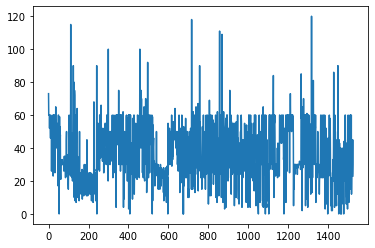

In [1573]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.plot(shows_df['ep_run_times'])

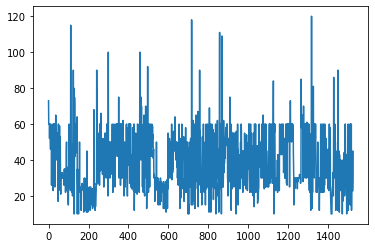

In [1574]:
#dropping shows under 10 minutes because that's not the type of show our client is interested.
index_short = shows_df[shows_df['ep_run_times'] < 10].index
shows_DF = shows_df.drop(index = index_short)
plt.plot(shows_DF['ep_run_times'])

In [1575]:
len(shows_DF)

1436

In [1576]:
shows_DF.isna().sum()

imdb_id              0
titleType            0
Title                0
originalTitle        0
startYear            0
endYear              0
runtimeMinutes       0
imdb_rating          0
imdb_no_votes        0
Streamer             0
Age                  0
imdb_id2             0
tmdb_id              0
creators           346
writer_1             0
writer_2             0
writer_3             0
director_1           0
director_2           0
director_3           0
genre_1              0
genre_2              0
director_1_name      0
director_2_name      0
director_3_name      0
writer_1_name        0
writer_2_name        0
writer_3_name        0
ep_run_times         0
dtype: int64

In [1577]:
# dropping the creators column
shows_DF.drop(columns = 'creators', inplace = True)
shows_DF.columns

Index(['imdb_id', 'titleType', 'Title', 'originalTitle', 'startYear',
       'endYear', 'runtimeMinutes', 'imdb_rating', 'imdb_no_votes', 'Streamer',
       'Age', 'imdb_id2', 'tmdb_id', 'writer_1', 'writer_2', 'writer_3',
       'director_1', 'director_2', 'director_3', 'genre_1', 'genre_2',
       'director_1_name', 'director_2_name', 'director_3_name',
       'writer_1_name', 'writer_2_name', 'writer_3_name', 'ep_run_times'],
      dtype='object')

Now let's add popularity feature of tmbd to our dataset.

In [1578]:
tmdb.People(7008).info()['popularity']

3.067

In [1579]:
writerone_list = shows_DF['writer_1_name'].tolist()

writertwo_list = shows_DF['writer_2_name'].tolist()
writerthree_list = shows_DF['writer_3_name'].tolist()


In [1580]:
shows_DF.dtypes

imdb_id             object
titleType           object
Title               object
originalTitle       object
startYear            int64
endYear              int64
runtimeMinutes      string
imdb_rating        float64
imdb_no_votes      float64
Streamer            object
Age                  int64
imdb_id2             int64
tmdb_id              int64
writer_1             int64
writer_2           float64
writer_3           float64
director_1          object
director_2          object
director_3          object
genre_1             object
genre_2             object
director_1_name     object
director_2_name     object
director_3_name     object
writer_1_name       object
writer_2_name       object
writer_3_name       object
ep_run_times         int64
dtype: object

In [1581]:
def team_popularity(name):
    try:
        search = tmdb.Search()
        people = tmdb.People()
        response = search.person(query= name)
        person_id = tmdb.People(search.results[0]['id'])
        response = person_id.info()
        return response['popularity']
    except:
        print ('====ERROR===={} was not found'.format(name))
     
        

In [1582]:
#Testing
search = tmdb.Search()
people = tmdb.People()
response = search.person(query= 'David Benioff')
search.results[0]['id']

9813

In [1583]:
writer_popularity('David Benioff')

20.114

In [1584]:
writer_one_list = [team_popularity(x) for x in writerone_list]


====ERROR====Stuti Malhotra was not found
====ERROR====Jeremy Bronson was not found
====ERROR====Ariana Berkowitz was not found
====ERROR====Brian Athey was not found
====ERROR====R.D. Chamberlain was not found
====ERROR====Daromeon was not found
====ERROR====Shane Gotcher was not found
====ERROR====Yang E. Coutiño was not found
====ERROR====Nate Stevenson was not found
====ERROR====Jimin Ahn was not found
====ERROR====Islam Alshomali was not found
====ERROR====Gabriel Chiche was not found
====ERROR====Prayaag Akbar was not found
====ERROR====Tatiana Bacal was not found
====ERROR====Christian James Durso was not found
====ERROR====Nicholas Ferrell was not found
====ERROR====Brin-Jonathan Butler was not found
====ERROR====Paul E. Raff was not found
====ERROR====Margot Haddad was not found
====ERROR====Tarkan Küçükaksu was not found
====ERROR====Yarô Abe was not found
====ERROR====Garima Pura Patiyaalvi was not found
====ERROR====Becky Bain was not found
====ERROR====Anoo Bhagavan was no

In [1585]:
writer_two_list = [team_popularity(x) for x in writertwo_list]
writer_three_list = [team_popularity(x) for x in writerthree_list]

====ERROR====Piper Kerman was not found
====ERROR====John Regier was not found
====ERROR====Sid Jacobson was not found
====ERROR====Pratibha Tiku Sharma was not found
====ERROR====Charles S. Forsman was not found
====ERROR====Christian La Monte was not found
====ERROR====Patrick Hegarty was not found
====ERROR====Yang E. Coutiño was not found
====ERROR====Louis Chiche was not found
====ERROR====Shane Gotcher was not found
====ERROR====Arne Ahrens was not found
====ERROR====Raphael Draccon was not found
====ERROR====Lisa Carrion was not found
====ERROR====Patricia Ulanosky was not found
====ERROR====Nurkan Aydogan was not found
====ERROR====Brin-Jonathan Butler was not found
====ERROR====Paul E. Raff was not found
====ERROR====Stéphanie Marteau was not found
====ERROR====Tarkan Küçükaksu was not found
====ERROR====Elaine Perrotte was not found
====ERROR====Yumie Takasuka was not found
====ERROR====Tensei Hagiwara was not found
====ERROR====Yeshayahu Ben Porat was not found
====ERROR====

In [1586]:
shows_DF['writer_1_pop'] = writer_one_list
shows_DF['writer_2_pop'] = writer_two_list
shows_DF['writer_3_pop'] = writer_three_list

In [1587]:
#moving to directors
first_directors = shows_DF['director_1_name'].tolist()
second_directors = shows_DF['director_2_name'].tolist()
third_directors = shows_DF['director_3_name'].tolist()

In [1588]:
first_director_list = [team_popularity(x) for x in first_directors]
second_director_list = [team_popularity(x) for x in second_directors]
third_director_list = [team_popularity(x) for x in third_directors]

====ERROR====Nicolas-D. Robitaille was not found
====ERROR====Homeros Gilani was not found
====ERROR====Murray Debus was not found
====ERROR====Kelley Gardner was not found
====ERROR====Horak Kim was not found
====ERROR====Hugo Fragoso Blendl was not found
====ERROR====Christofer Graham was not found
====ERROR====Derek Prout was not found
====ERROR====Daniela Anelisse Rodríguez was not found
====ERROR====Paul E. Raff was not found
====ERROR====Austin Reza was not found
====ERROR====Bret Nelson was not found
====ERROR====John Musumeci was not found
====ERROR====Yu Yeong Park was not found
====ERROR====Daniel Arenas Samudio was not found
====ERROR====Jaime Eliezer Karas was not found
====ERROR====Alexx Media was not found
====ERROR====Homeros Gilani was not found
====ERROR====Denny Y. Miller was not found
====ERROR====Wanichaya Tangsutthiwong was not found
====ERROR====Solène Azernour was not found
====ERROR====Masataka Ueno was not found
====ERROR====Latoya Raveneau was not found
====ER

In [1589]:
shows_DF['director_1_pop'] = first_director_list
shows_DF['director_2_pop'] = second_director_list
shows_DF['director_3_pop'] = third_director_list

In [1590]:
shows_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,writer_1_name,writer_2_name,writer_3_name,ep_run_times,writer_1_pop,writer_2_pop,writer_3_pop,director_1_pop,director_2_pop,director_3_pop
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135.0,Netflix,...,Andrew Davies,Michael Dobbs,Beau Willimon,73,13.226,0.984,18.259,21.812,25.183,9.814
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205.0,Netflix,...,Brian McGreevy,Lee Shipman,David Paul Francis,60,2.360,0.600,3.842,1.617,20.006,16.521
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768.0,Netflix,...,Jenji Kohan,Piper Kerman,Anthony Natoli,60,5.138,NaN,0.600,40.968,2.744,1.473
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293.0,Netflix,...,John Fusco,Matthew White,Noelle Valdivia,60,9.142,0.600,1.383,6.895,16.521,5.950
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529.0,Netflix,...,Glenn Kessler,Todd A. Kessler,Daniel Zelman,60,1.960,8.532,16.078,12.300,8.532,3.504


In [1591]:
shows_DF.isna().sum()

imdb_id             0
titleType           0
Title               0
originalTitle       0
startYear           0
endYear             0
runtimeMinutes      0
imdb_rating         0
imdb_no_votes       0
Streamer            0
Age                 0
imdb_id2            0
tmdb_id             0
writer_1            0
writer_2            0
writer_3            0
director_1          0
director_2          0
director_3          0
genre_1             0
genre_2             0
director_1_name     0
director_2_name     0
director_3_name     0
writer_1_name       0
writer_2_name       0
writer_3_name       0
ep_run_times        0
writer_1_pop       73
writer_2_pop       74
writer_3_pop       91
director_1_pop     26
director_2_pop     45
director_3_pop     26
dtype: int64

In [1592]:
# shortcut dataset
#shows_DF.to_csv('datasets/people_pop_csv', index = False)
Shows_DF = pd.read_csv ('datasets/people_pop_csv')

In [1593]:
Shows_DF['writer_1_pop'].isna().sum()

75

Now I'll fill the missing popularity info with the popularity of other crew members.

In [1594]:
Shows_DF['writer_1_pop'].fillna(Shows_DF['writer_2_pop'] , inplace = True)

In [1595]:
Shows_DF['writer_3_pop'].fillna(Shows_DF['writer_1_pop'] , inplace = True)

In [1596]:
Shows_DF.isna().sum()

imdb_id             0
titleType           0
Title               0
originalTitle       0
startYear           0
endYear             0
runtimeMinutes      0
imdb_rating         0
imdb_no_votes       0
Streamer            0
Age                 0
imdb_id2            0
tmdb_id             0
writer_1            0
writer_2            0
writer_3            0
director_1          0
director_2          0
director_3          0
genre_1             0
genre_2             0
director_1_name     0
director_2_name     0
director_3_name     0
writer_1_name       0
writer_2_name       0
writer_3_name       0
ep_run_times        0
writer_1_pop       20
writer_2_pop       75
writer_3_pop       13
director_1_pop     26
director_2_pop     45
director_3_pop     26
dtype: int64

In [1597]:
Shows_DF['writer_2_pop'].fillna(Shows_DF['writer_1_pop'] , inplace = True)

In [1598]:
Shows_DF['writer_1_pop'].fillna(Shows_DF['writer_3_pop'] , inplace = True)

In [1599]:
Shows_DF['writer_2_pop'].fillna(Shows_DF['writer_3_pop'] , inplace = True)

In [1600]:
Shows_DF.isna().sum()

imdb_id             0
titleType           0
Title               0
originalTitle       0
startYear           0
endYear             0
runtimeMinutes      0
imdb_rating         0
imdb_no_votes       0
Streamer            0
Age                 0
imdb_id2            0
tmdb_id             0
writer_1            0
writer_2            0
writer_3            0
director_1          0
director_2          0
director_3          0
genre_1             0
genre_2             0
director_1_name     0
director_2_name     0
director_3_name     0
writer_1_name       0
writer_2_name       0
writer_3_name       0
ep_run_times        0
writer_1_pop       13
writer_2_pop       13
writer_3_pop       13
director_1_pop     26
director_2_pop     45
director_3_pop     26
dtype: int64

In [1601]:
Shows_DF['writer_3_pop'].fillna(Shows_DF['writer_2_pop'] , inplace = True)

In [1602]:
# dropping the rest
Shows_DF.dropna(inplace = True)
Shows_DF.isna().sum()

imdb_id            0
titleType          0
Title              0
originalTitle      0
startYear          0
endYear            0
runtimeMinutes     0
imdb_rating        0
imdb_no_votes      0
Streamer           0
Age                0
imdb_id2           0
tmdb_id            0
writer_1           0
writer_2           0
writer_3           0
director_1         0
director_2         0
director_3         0
genre_1            0
genre_2            0
director_1_name    0
director_2_name    0
director_3_name    0
writer_1_name      0
writer_2_name      0
writer_3_name      0
ep_run_times       0
writer_1_pop       0
writer_2_pop       0
writer_3_pop       0
director_1_pop     0
director_2_pop     0
director_3_pop     0
dtype: int64

In [1603]:
Shows_DF['director_3_pop'].fillna(Shows_DF['director_1_pop'] , inplace = True)

In [1604]:
Shows_DF['director_2_pop'].fillna(Shows_DF['director_1_pop'] , inplace = True)

In [1605]:
Shows_DF['director_1_pop'].fillna(Shows_DF['director_2_pop'] , inplace = True)

In [1606]:
Shows_DF['director_3_pop'].fillna(Shows_DF['director_2_pop'] , inplace = True)

In [1607]:
Shows_DF.isna().sum()

imdb_id            0
titleType          0
Title              0
originalTitle      0
startYear          0
endYear            0
runtimeMinutes     0
imdb_rating        0
imdb_no_votes      0
Streamer           0
Age                0
imdb_id2           0
tmdb_id            0
writer_1           0
writer_2           0
writer_3           0
director_1         0
director_2         0
director_3         0
genre_1            0
genre_2            0
director_1_name    0
director_2_name    0
director_3_name    0
writer_1_name      0
writer_2_name      0
writer_3_name      0
ep_run_times       0
writer_1_pop       0
writer_2_pop       0
writer_3_pop       0
director_1_pop     0
director_2_pop     0
director_3_pop     0
dtype: int64

Adding the last columns (number of episodes, show popularity, number of seasons and origin_language, original language)

In [1608]:
tmdb_list = Shows_DF['tmdb_id'].tolist()

In [1609]:
def tmdb_popularity (tmdb_id):
    tv = tmdb.TV(tmdb_id)
    response = tv.info()
    return response['popularity']


In [1610]:
Shows_DF['tmdb_popularity'] = [tmdb_popularity(x) for x in tmdb_list]

In [1611]:
def no_of_ep (tmdb_id):
    tv = tmdb.TV(tmdb_id)
    response = tv.info()
    return response['number_of_episodes']

In [1612]:
def no_of_seasons (tmdb_id):
    tv = tmdb.TV(tmdb_id)
    response = tv.info()
    return response['number_of_seasons']

In [1613]:
Shows_DF['no_of_ep'], Shows_DF['no_of_seasons'] = [no_of_ep(x) for x in tmdb_list], [no_of_seasons(x) for x in tmdb_list]

In [1614]:
def find_language (tmdb_id):
    tv = tmdb.TV(tmdb_id)
    response = tv.info()
    return response['original_language']

In [1615]:
def find_country (tmdb_id):
    tv = tmdb.TV(tmdb_id)
    response = tv.info()
    return response['origin_country']

In [1616]:
Shows_DF['origin_language'], Shows_DF['origin_country'] = [find_language(x) for x in tmdb_list], [find_country(x) for x in tmdb_list]

In [1617]:
#finding the average popularity.
Shows_DF['team_popularity'] = (Shows_DF['director_1_pop'] +Shows_DF['director_2_pop'] + Shows_DF['director_3_pop']
+ Shows_DF['writer_1_pop'] + Shows_DF['writer_2_pop'] + Shows_DF['writer_3_pop']) /6

In [1618]:
Shows_DF['no_of_ep']

0       73
1       33
2       91
3       20
4       33
        ..
1431    37
1432     4
1433     9
1434    10
1435    15
Name: no_of_ep, Length: 1366, dtype: int64

In [1619]:
Shows_DF['no_of_seasons']

0       6
1       3
2       7
3       2
4       3
       ..
1431    3
1432    1
1433    1
1434    1
1435    5
Name: no_of_seasons, Length: 1366, dtype: int64

In [1620]:
Shows_DF['team_popularity']

0       7.569833
1       2.424833
2       3.721167
3       2.240667
4       2.095500
          ...   
1431    1.581167
1432    2.532000
1433    1.083667
1434    2.155667
1435    4.867000
Name: team_popularity, Length: 1366, dtype: float64

In [249]:
Shows_DF.head()

NameError: name 'Shows_DF' is not defined

In [253]:
#Shows_DF.to_csv('datasets/final_df.csv', index = False)
TV_shows_df = pd.DataFrame(pd.read_csv('datasets/final_df.csv'))

In [255]:
TV_shows_df['origin_country'].unique()

array(["['US']", "['GB']", "['AU']", "['GB', 'US']", "['CA', 'US']",
       "['ZA']", "['IL']", "['JP']", "['CA']", "['FR']", "['DE']",
       "['AU', 'US']", "['ES']", "['US', 'CA']", "['BE', 'FR', 'US']",
       "['BR', 'CA']", '[]', "['MX']", "['KR']", "['JO']", "['DK']",
       "['NL']", "['DE', 'MX']", "['IN']", "['IT']", "['TW']",
       "['TW', 'MY']", "['NO']", "['PL']", "['BR']", "['BR', 'ES']",
       "['AR', 'US']", "['AR']", "['CO']", "['MX', 'ES']", "['SE']",
       "['TH']", "['TR']", "['IN', 'US']", "['NZ']", "['AU', 'GB', 'US']",
       "['NZ', 'AU']", "['US', 'GB']", "['IS']", "['AT', 'DE']", "['NG']",
       "['US', 'FR']", "['PH']", "['BE']", "['VN']", "['EG']",
       "['US', 'BR']", "['SG']", "['SA', 'TN', 'EG', 'MA', 'LB']",
       "['US', 'NG']", "['CL']", "['KE']", "['AR', 'MX']", "['PE']",
       "['AT']", "['ID']", "['PT']", "['FI']", "['JP', 'GB', 'US']",
       "['SG', 'US']", "['IE']", "['CZ', 'DE']", "['JP', 'US']", "['CN']",
       "['PR']", "['IT', 'US']

In [1623]:
TV_shows_df.dtypes

imdb_id             object
titleType           object
Title               object
originalTitle       object
startYear            int64
endYear              int64
runtimeMinutes       int64
imdb_rating        float64
imdb_no_votes      float64
Streamer            object
Age                  int64
imdb_id2             int64
tmdb_id              int64
writer_1             int64
writer_2           float64
writer_3           float64
director_1          object
director_2          object
director_3          object
genre_1             object
genre_2             object
director_1_name     object
director_2_name     object
director_3_name     object
writer_1_name       object
writer_2_name       object
writer_3_name       object
ep_run_times         int64
writer_1_pop       float64
writer_2_pop       float64
writer_3_pop       float64
director_1_pop     float64
director_2_pop     float64
director_3_pop     float64
tmdb_popularity    float64
no_of_ep             int64
no_of_seasons        int64
t

In [1624]:
#dropping the final missing values indicated as '\\N'
index_d = TV_shows_df[TV_shows_df['director_1'] == '\\N' ].index
TV_shows_df.drop(index = index_d, inplace = True)

In [1625]:
# making the columns the right type and also renaming them
TV_shows_df['imdb_id'] = TV_shows_df['imdb_id'].astype('string')
TV_shows_df['titleType'] = TV_shows_df['titleType'].astype('string')                               
TV_shows_df['Title'] = TV_shows_df['Title'].astype('string')
TV_shows_df['originalTitle'] = TV_shows_df['originalTitle'].astype('string')
TV_shows_df['Streamer'] = TV_shows_df['Streamer'].astype('string')
TV_shows_df['director_1'] = TV_shows_df['director_1'].astype('Int64')
TV_shows_df['director_2'] = TV_shows_df['director_2'].astype('float').astype('Int64')
TV_shows_df['director_3'] = TV_shows_df['director_3'].astype('float').astype('Int64')
TV_shows_df['writer_2'] = TV_shows_df['writer_2'].astype('Int64')
TV_shows_df['writer_3'] = TV_shows_df['writer_3'].astype('Int64')
TV_shows_df['writer_3'] = TV_shows_df['writer_3'].astype('Int64')
TV_shows_df['genre_1'] = TV_shows_df['genre_1'].astype('string')
TV_shows_df['genre_2'] = TV_shows_df['genre_2'].astype('string')
TV_shows_df['director_1_name'] = TV_shows_df['director_1_name'].astype('string')
TV_shows_df['director_2_name'] = TV_shows_df['director_2_name'].astype('string')
TV_shows_df['director_3_name'] = TV_shows_df['director_3_name'].astype('string')
TV_shows_df['writer_1_name'] = TV_shows_df['writer_1_name'].astype('string')
TV_shows_df['writer_2_name'] = TV_shows_df['writer_2_name'].astype('string')
TV_shows_df['writer_3_name'] = TV_shows_df['writer_3_name'].astype('string')
TV_shows_df['origin_country'] = TV_shows_df['origin_country'].astype('string')
TV_shows_df['origin_language'] = TV_shows_df['origin_language'].astype('string')  
TV_shows_df['imdb_no_votes'] = TV_shows_df['imdb_no_votes'].astype('Int64')

In [1626]:
TV_shows_df.columns

Index(['imdb_id', 'titleType', 'Title', 'originalTitle', 'startYear',
       'endYear', 'runtimeMinutes', 'imdb_rating', 'imdb_no_votes', 'Streamer',
       'Age', 'imdb_id2', 'tmdb_id', 'writer_1', 'writer_2', 'writer_3',
       'director_1', 'director_2', 'director_3', 'genre_1', 'genre_2',
       'director_1_name', 'director_2_name', 'director_3_name',
       'writer_1_name', 'writer_2_name', 'writer_3_name', 'ep_run_times',
       'writer_1_pop', 'writer_2_pop', 'writer_3_pop', 'director_1_pop',
       'director_2_pop', 'director_3_pop', 'tmdb_popularity', 'no_of_ep',
       'no_of_seasons', 'team_popularity', 'origin_language',
       'origin_country'],
      dtype='object')

In [1627]:
tmdb_ids = TV_shows_df['tmdb_id'].tolist()

In [1628]:
#finding the cast members of a movie by its show id.
def tmdb_cast(tmdb_id):
    try:
        tv = tmdb.TV(tmdb_id)
        response = tv.credits()
        if len (response['cast']) >= 2:
            cast= response['cast'][0]['name'], response['cast'][1]['name']
            return cast
        elif len (response['cast']) == 1:
            cast = response['cast'][0]['name']
            return cast
    except:
        print ("=====ERROR=====")
        

In [1629]:
#please see below for a shortcut dataset.
#cast_list = [tmdb_cast(x) for x in tmdb_ids]

In [1630]:
#len(cast_list)

In [1631]:
# assigning cast_list to the actors column

#TV_shows_df['actors'] = cast_list
#TV_shows_df['actors'] = TV_shows_df['actors'].astype('string')

In [1632]:
# making NaN value a string not to mess a function that needs strings.
#TV_shows_df['actors'].fillna('Not Available', inplace = True)

Now it would be useful to create a boolean column that would aprove if the creator or writer of the show was also the lead actor.

In [1633]:
#TV_shows_df['creator/actor?']= False

In [1634]:
#TV_shows_df.writer_1_name[1167] in TV_shows_df.actors[1167]

In [1635]:
#for i in range(len(TV_shows_df)):
 #   if TV_shows_df.writer_1_name[i] in TV_shows_df.actors[i]:
  #      TV_shows_df.loc[TV_shows_df['creator/actor?']==i,'creator/actor?'] = True
   # elif  TV_shows_df.writer_2_name[i] in TV_shows_df.actors[i]:
    #            TV_shows_df.loc[TV_shows_df['creator/actor?']==i,'creator/actor?'] = True
    #elif  TV_shows_df.writer_3_name[i] in TV_shows_df.actors[i]:
     #           TV_shows_df.loc[TV_shows_df['creator/actor?']==i,'creator/actor?'] = True


In [1636]:
#checking a show with actor/writer
#TV_shows_df[TV_shows_df['Title'] == 'I May Destroy You']

In [1637]:
#TV_shows_df.loc[TV_shows_df['creator/actor?'] == True, 'creator/actor?'] = 1
#TV_shows_df.loc[TV_shows_df['creator/actor?'] == False, 'creator/actor?'] = 0
#TV_shows_df['creator/actor?'] = TV_shows_df['creator/actor?'].astype('int64')
#TV_shows_df.iloc[1167]

In [4]:
#TV_shows_df.to_csv('datasets/df_actors.csv', index = False)
TV_shows_df1 = pd.read_csv ('datasets/df_actors.csv')

In [5]:
TV_shows_df1.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_2_pop,director_3_pop,tmdb_popularity,no_of_ep,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135,Netflix,...,22.474,2.779,889.399,73,6,7.569833,en,['US'],"('Robin Wright', 'Michael Kelly')",0
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205,Netflix,...,2.989,4.906,134.658,33,3,2.424833,en,['US'],"('Landon Liboiron', 'Bill Skarsgård')",0
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768,Netflix,...,1.252,0.600,278.534,91,7,3.721167,en,['US'],"('Taylor Schilling', 'Natasha Lyonne')",0
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293,Netflix,...,4.906,1.400,167.187,20,2,2.240667,en,['US'],"('Lorenzo Richelmy', 'Benedict Wong')",0
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529,Netflix,...,1.400,1.007,240.065,33,3,2.095500,en,['US'],"('Kyle Chandler', 'Linda Cardellini')",0


In [6]:
len(TV_shows_df1)

1358

In [7]:
TV_shows_df1.dtypes

imdb_id             object
titleType           object
Title               object
originalTitle       object
startYear            int64
endYear              int64
runtimeMinutes       int64
imdb_rating        float64
imdb_no_votes        int64
Streamer            object
Age                  int64
imdb_id2             int64
tmdb_id              int64
writer_1             int64
writer_2             int64
writer_3             int64
director_1           int64
director_2           int64
director_3           int64
genre_1             object
genre_2             object
director_1_name     object
director_2_name     object
director_3_name     object
writer_1_name       object
writer_2_name       object
writer_3_name       object
ep_run_times         int64
writer_1_pop       float64
writer_2_pop       float64
writer_3_pop       float64
director_1_pop     float64
director_2_pop     float64
director_3_pop     float64
tmdb_popularity    float64
no_of_ep             int64
no_of_seasons        int64
t

In [8]:
# making the columns the right type and also renaming them
TV_shows_df1['imdb_id'] = TV_shows_df1['imdb_id'].astype('string')
TV_shows_df1['titleType'] = TV_shows_df1['titleType'].astype('string')                               
TV_shows_df1['Title'] = TV_shows_df1['Title'].astype('string')
TV_shows_df1['originalTitle'] = TV_shows_df1['originalTitle'].astype('string')
TV_shows_df1['Streamer'] = TV_shows_df1['Streamer'].astype('string')
TV_shows_df1['director_1'] = TV_shows_df1['director_1'].astype('Int64')
TV_shows_df1['director_2'] = TV_shows_df1['director_2'].astype('float').astype('Int64')
TV_shows_df1['director_3'] = TV_shows_df1['director_3'].astype('float').astype('Int64')
TV_shows_df1['writer_2'] = TV_shows_df1['writer_2'].astype('Int64')
TV_shows_df1['writer_3'] = TV_shows_df1['writer_3'].astype('Int64')
TV_shows_df1['writer_3'] = TV_shows_df1['writer_3'].astype('Int64')
TV_shows_df1['genre_1'] = TV_shows_df1['genre_1'].astype('string')
TV_shows_df1['genre_2'] = TV_shows_df1['genre_2'].astype('string')
TV_shows_df1['director_1_name'] = TV_shows_df1['director_1_name'].astype('string')
TV_shows_df1['director_2_name'] = TV_shows_df1['director_2_name'].astype('string')
TV_shows_df1['director_3_name'] = TV_shows_df1['director_3_name'].astype('string')
TV_shows_df1['writer_1_name'] = TV_shows_df1['writer_1_name'].astype('string')
TV_shows_df1['writer_2_name'] = TV_shows_df1['writer_2_name'].astype('string')
TV_shows_df1['writer_3_name'] = TV_shows_df1['writer_3_name'].astype('string')
TV_shows_df1['origin_country'] = TV_shows_df1['origin_country'].astype('string')
TV_shows_df1['origin_language'] = TV_shows_df1['origin_language'].astype('string')  
TV_shows_df1['imdb_no_votes'] = TV_shows_df1['imdb_no_votes'].astype('Int64')
TV_shows_df1['actors'] = TV_shows_df1['actors'].astype('string')


In [9]:
len(TV_shows_df1[TV_shows_df1['actors']== 'Not Available'])

113

Editing the missing values (dropping or replacing)

In [10]:
TV_shows_df1[TV_shows_df1['actors']== 'Not Available']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_2_pop,director_3_pop,tmdb_popularity,no_of_ep,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?
48,tt12574336,tvSeries,Homemade,Homemade,2020,0,138,6.1,877,Netflix,...,1.400,2.091,98.814,17,1,2.111667,en,['US'],Not Available,0
51,tt12313074,tvMiniSeries,Social Distance,Social Distance,2020,2020,0,6.0,710,Netflix,...,1.252,1.400,8.710,8,1,1.013333,en,['US'],Not Available,0
68,tt5228026,tvSeries,The Characters,The Characters,2016,2016,32,5.4,975,Netflix,...,1.658,1.658,5.491,8,1,1.834000,en,['US'],Not Available,0
71,tt5562056,tvSeries,Easy,Easy,2016,2019,30,6.9,15061,Netflix,...,5.682,5.682,127.273,25,3,5.682000,en,['US'],Not Available,0
114,tt12800428,tvSeries,Game On! A Comedy Crossover Event,Game On! A Comedy Crossover Event,2020,2020,30,5.5,271,Netflix,...,13.078,1.246,32.827,4,1,3.091000,en,['US'],Not Available,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,tt12574336,tvSeries,Homemade,Homemade,2020,0,138,6.1,877,Netflix,...,1.400,2.091,98.814,17,1,2.111667,en,['US'],Not Available,0
1323,tt10675488,tvSeries,Astronomy Club,Astronomy Club,2019,2019,20,7.0,657,Netflix,...,0.600,0.600,5.911,6,1,0.662000,en,[],Not Available,0
1333,tt12364156,tvMiniSeries,The Search,The Search,2020,2020,0,5.7,705,Netflix,...,1.278,0.706,0.840,0,0,0.964667,en,['GB'],Not Available,0
1334,tt15529566,tvMiniSeries,The Motive,The Motive,2020,2021,141,5.2,1757,Netflix,...,0.600,0.600,2.642,4,1,0.600000,he,['IL'],Not Available,0


I am making the decision of dropping those rows since the dropped shows are mostly non-fiction, which is not our strongest area of focus in the project.

In [256]:
index_no_actors = TV_shows_df1[TV_shows_df1['actors'] == 'Not Available'].index
TV_shows_DF = pd.DataFrame(TV_shows_df1.drop(index = index_no_actors))
#checking
TV_shows_DF[TV_shows_DF['actors'] == 'Not Available']

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_2_pop,director_3_pop,tmdb_popularity,no_of_ep,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?


In [257]:
TV_shows_DF.isna().sum()

imdb_id            0
titleType          0
Title              0
originalTitle      0
startYear          0
endYear            0
runtimeMinutes     0
imdb_rating        0
imdb_no_votes      0
Streamer           0
Age                0
imdb_id2           0
tmdb_id            0
writer_1           0
writer_2           0
writer_3           0
director_1         0
director_2         0
director_3         0
genre_1            0
genre_2            0
director_1_name    0
director_2_name    0
director_3_name    0
writer_1_name      0
writer_2_name      0
writer_3_name      0
ep_run_times       0
writer_1_pop       0
writer_2_pop       0
writer_3_pop       0
director_1_pop     0
director_2_pop     0
director_3_pop     0
tmdb_popularity    0
no_of_ep           0
no_of_seasons      0
team_popularity    0
origin_language    0
origin_country     0
actors             0
creator/actor?     0
dtype: int64

Now, the final tuning of the column values to make it more readable.

In [13]:
TV_shows_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_2_pop,director_3_pop,tmdb_popularity,no_of_ep,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135,Netflix,...,22.474,2.779,889.399,73,6,7.569833,en,['US'],"('Robin Wright', 'Michael Kelly')",0
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205,Netflix,...,2.989,4.906,134.658,33,3,2.424833,en,['US'],"('Landon Liboiron', 'Bill Skarsgård')",0
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768,Netflix,...,1.252,0.600,278.534,91,7,3.721167,en,['US'],"('Taylor Schilling', 'Natasha Lyonne')",0
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293,Netflix,...,4.906,1.400,167.187,20,2,2.240667,en,['US'],"('Lorenzo Richelmy', 'Benedict Wong')",0
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529,Netflix,...,1.400,1.007,240.065,33,3,2.095500,en,['US'],"('Kyle Chandler', 'Linda Cardellini')",0


In [258]:
#taking off brackets and quotation marks from origin_country column values
TV_shows_DF['origin_country'] =TV_shows_DF['origin_country'].str.replace("[", "", regex=True)
TV_shows_DF['origin_country'] =TV_shows_DF['origin_country'].str.replace("]", "", regex=True)
TV_shows_DF['origin_country'] =TV_shows_DF['origin_country'].str.replace("'", "", regex=True)
TV_shows_DF.head()


,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,director_2_pop,director_3_pop,tmdb_popularity,no_of_ep,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135,Netflix,...,22.474,2.779,889.399,73,6,7.569833,en,US,"('Robin Wright', 'Michael Kelly')",0
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205,Netflix,...,2.989,4.906,134.658,33,3,2.424833,en,US,"('Landon Liboiron', 'Bill Skarsgård')",0
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768,Netflix,...,1.252,0.600,278.534,91,7,3.721167,en,US,"('Taylor Schilling', 'Natasha Lyonne')",0
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293,Netflix,...,4.906,1.400,167.187,20,2,2.240667,en,US,"('Lorenzo Richelmy', 'Benedict Wong')",0
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529,Netflix,...,1.400,1.007,240.065,33,3,2.095500,en,US,"('Kyle Chandler', 'Linda Cardellini')",0


In [263]:
# there are sometimes two countries so splitting it to two
TV_shows_DF['first_country'], TV_shows_DF['second_country']= TV_shows_DF['origin_country'].str.split(',', n=1).str

TV_shows_DF.head()

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_15604/3307457982.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  TV_shows_DF['first_country'], TV_shows_DF['second_country']= TV_shows_DF['origin_country'].str.split(',', n=1).str


,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_popularity,no_of_ep,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?,first_country,second_country
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135,Netflix,...,889.399,73,6,7.569833,en,US,"('Robin Wright', 'Michael Kelly')",0,US,NaN
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205,Netflix,...,134.658,33,3,2.424833,en,US,"('Landon Liboiron', 'Bill Skarsgård')",0,US,NaN
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768,Netflix,...,278.534,91,7,3.721167,en,US,"('Taylor Schilling', 'Natasha Lyonne')",0,US,NaN
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293,Netflix,...,167.187,20,2,2.240667,en,US,"('Lorenzo Richelmy', 'Benedict Wong')",0,US,NaN
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529,Netflix,...,240.065,33,3,2.095500,en,US,"('Kyle Chandler', 'Linda Cardellini')",0,US,NaN


In [264]:
TV_shows_DF['second_country'].fillna(TV_shows_DF['first_country'], inplace = True)
TV_shows_DF.head()

,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,tmdb_popularity,no_of_ep,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?,first_country,second_country
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135,Netflix,...,889.399,73,6,7.569833,en,US,"('Robin Wright', 'Michael Kelly')",0,US,US
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205,Netflix,...,134.658,33,3,2.424833,en,US,"('Landon Liboiron', 'Bill Skarsgård')",0,US,US
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768,Netflix,...,278.534,91,7,3.721167,en,US,"('Taylor Schilling', 'Natasha Lyonne')",0,US,US
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293,Netflix,...,167.187,20,2,2.240667,en,US,"('Lorenzo Richelmy', 'Benedict Wong')",0,US,US
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529,Netflix,...,240.065,33,3,2.095500,en,US,"('Kyle Chandler', 'Linda Cardellini')",0,US,US


In [269]:
TV_shows_DF['second_country'].unique()

array(['US', 'GB', 'AU', ' US', 'ZA', 'IL', 'JP', 'CA', 'FR', 'DE', 'ES',
       ' CA', ' FR, US', '', 'MX', 'KR', 'JO', 'DK', 'NL', ' MX', 'IN',
       'IT', 'TW', ' MY', 'NO', 'PL', 'BR', ' ES', 'AR', 'CO', 'SE', 'TH',
       'TR', 'NZ', ' GB, US', ' AU', ' GB', 'IS', ' DE', 'NG', ' FR',
       'PH', 'BE', 'VN', 'EG', ' BR', ' TN, EG, MA, LB', ' NG', 'CL',
       'KE', 'PE', 'AT', 'ID', 'PT', 'FI', 'IE', 'CN', 'PR', 'SA', 'HK'],
      dtype=object)

In [315]:
TV_shows_DF.loc[TV_shows_DF['second_country'] == 'GB, US', 'second_country' ]= 'GB'
TV_shows_DF.drop(columns = 'origin_country', inplace = True)

In [272]:
# taking off paranthesis and quotation marks from actors columns
TV_shows_DF['actors'] =TV_shows_DF['actors'].str.replace("(", "", regex=True)
TV_shows_DF['actors'] = TV_shows_DF['actors'].str.replace(")", "", regex=True)
TV_shows_DF['actors'] = TV_shows_DF['actors'].str.replace("'", "", regex=True)

TV_shows_DF['actors']

0              Robin Wright, Michael Kelly
1          Landon Liboiron, Bill Skarsgård
2         Taylor Schilling, Natasha Lyonne
3          Lorenzo Richelmy, Benedict Wong
4          Kyle Chandler, Linda Cardellini
                       ...                
1353    Alessandro Borghese, Angela Frenda
1354         James Morris, Tom Henry Jones
1355           Sixx Orange, Gabe Eggerling
1356           Michela Luci, Saara Chaudry
1357               Chow Yun-fat, Cora Miao
Name: actors, Length: 1245, dtype: string

In [273]:
#splitting the actor column into two
TV_shows_DF['actor_1_name'], TV_shows_DF['actor_2_name'] = TV_shows_DF['actors'].str.split(',', n=1).str
TV_shows_DF.head()

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_15604/3871070227.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  TV_shows_DF['actor_1_name'], TV_shows_DF['actor_2_name'] = TV_shows_DF['actors'].str.split(',', n=1).str


,imdb_id,titleType,Title,originalTitle,startYear,endYear,runtimeMinutes,imdb_rating,imdb_no_votes,Streamer,...,no_of_seasons,team_popularity,origin_language,origin_country,actors,creator/actor?,first_country,second_country,actor_1_name,actor_2_name
0,tt1856010,tvSeries,House of Cards,House of Cards,2013,2018,3804,8.6,525135,Netflix,...,6,7.569833,en,US,"Robin Wright, Michael Kelly",0,US,US,Robin Wright,Michael Kelly
1,tt2309295,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,46,7.0,42205,Netflix,...,3,2.424833,en,US,"Landon Liboiron, Bill Skarsgård",0,US,US,Landon Liboiron,Bill Skarsgård
2,tt2372162,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,59,8.0,316768,Netflix,...,7,3.721167,en,US,"Taylor Schilling, Natasha Lyonne",0,US,US,Taylor Schilling,Natasha Lyonne
3,tt2189461,tvSeries,Marco Polo,Marco Polo,2014,2016,60,8.0,77293,Netflix,...,2,2.240667,en,US,"Lorenzo Richelmy, Benedict Wong",0,US,US,Lorenzo Richelmy,Benedict Wong
4,tt3520702,tvSeries,Bloodline,Bloodline,2015,2017,60,7.9,57529,Netflix,...,3,2.095500,en,US,"Kyle Chandler, Linda Cardellini",0,US,US,Kyle Chandler,Linda Cardellini


In [274]:
#checking the total of missing values for actor 2.
TV_shows_DF['actor_2_name'].isna().sum()

85

In [275]:
#filling missing actor_2 values with actor popularity
TV_shows_DF['actor_2_name'].fillna(TV_shows_DF['actor_1_name'], inplace = True)

In [276]:
#dropping actors column
TV_shows_DF.drop(columns = 'actors', inplace = True)

In [277]:
#testing the tmdb library to search a person by its name.
search = tmdb.Search()
person = tmdb.People()
response = search.person(query= 'Michaela Coel')
response['results'][0]['popularity']


19.901

In [278]:
#defining a function for finding the cast popularity with its name as an input
def cast_popularity(name):
    search = tmdb.Search()
    person = tmdb.People()
    response = search.person(query= name)
    return response['results'][0]['popularity']

In [279]:
#creating a list out of the actor columns
actors_1 = TV_shows_DF['actor_1_name'].tolist()
actors_2 = TV_shows_DF['actor_2_name'].tolist()

In [317]:
#finding popularity of the second actor
#cast_1_pop = [cast_popularity(x) for x in actors_1]

In [316]:
#cast_1_pop

NameError: name 'cast_1_pop' is not defined

In [320]:
#finding popularity of the second actor
cast_2_pop = [cast_popularity(x) for x in actors_2]


In [330]:
cast_2_pop

[26.484,
 58.313,
 12.285,
 24.444,
 32.821,
 40.454,
 17.844,
 21.505,
 35.926,
 22.56,
 16.136,
 37.279,
 30.62,
 44.484,
 5.331,
 23.813,
 41.608,
 10.289,
 25.154,
 32.297,
 32.051,
 18.529,
 27.64,
 4.847,
 8.511,
 17.09,
 14.001,
 21.059,
 22.218,
 8.006,
 16.239,
 58.741,
 38.559,
 28.885,
 62.758,
 21.673,
 16.593,
 25.76,
 13.866,
 100.928,
 67.589,
 16.745,
 23.124,
 2.216,
 16.69,
 8.656,
 27.21,
 4.676,
 16.485,
 11.381,
 3.842,
 13.427,
 8.281,
 11.5,
 29.38,
 34.37,
 6.785,
 9.483,
 12.619,
 17.621,
 19.7,
 9.485,
 32.912,
 14.996,
 27.501,
 5.447,
 86.872,
 19.409,
 10.182,
 15.782,
 22.462,
 108.93,
 8.768,
 13.118,
 29.567,
 59.628,
 31.299,
 13.617,
 16.41,
 53.186,
 13.746,
 5.379,
 45.274,
 3.066,
 16.84,
 22.797,
 13.894,
 10.066,
 25.589,
 77.179,
 6.012,
 32.006,
 9.569,
 6.31,
 18.832,
 19.586,
 31.556,
 3.347,
 16.078,
 20.212,
 41.414,
 6.001,
 11.445,
 15.995,
 1.708,
 22.354,
 1.259,
 15.765,
 6.317,
 29.042,
 40.515,
 27.175,
 37.595,
 10.56,
 2.635,
 1.788

In [334]:
TV_shows_DF['cast_pop'] = 0
TV_shows_DF['actor_1_pop'] = cast_1_pop
TV_shows_DF['actor_2_pop'] = cast_2_pop

Creating a 'cast_pop' column to have the average popularity number from tmdb.

In [335]:
TV_shows_DF['cast_pop'] = (TV_shows_DF['actor_1_pop'] +TV_shows_DF['actor_2_pop'])/2

In [336]:
TV_shows_DF['cast_pop'] = TV_shows_DF['cast_pop'].round(1)
TV_shows_DF['team_popularity'] = TV_shows_DF['team_popularity'].round(1)
TV_shows_DF['tmdb_popularity'] = TV_shows_DF['tmdb_popularity'].round(1)
TV_shows_DF['director_1_pop'] = TV_shows_DF['director_1_pop'].round(1)
TV_shows_DF['director_2_pop'] = TV_shows_DF['director_2_pop'].round(1)
TV_shows_DF['director_3_pop'] = TV_shows_DF['director_3_pop'].round(1)
TV_shows_DF['actor_2_pop'] = TV_shows_DF['actor_2_pop'].round(1)
TV_shows_DF['actor_1_pop'] = TV_shows_DF['actor_1_pop'].round(1)
TV_shows_DF['writer_1_pop'] = TV_shows_DF['writer_1_pop'].round(1)
TV_shows_DF['writer_2_pop'] = TV_shows_DF['writer_2_pop'].round(1)
TV_shows_DF['writer_3_pop'] = TV_shows_DF['writer_3_pop'].round(1)


In [345]:
TV_shows_DF.to_csv('datasets/df_act_pop.csv', index = False)
series_df = pd.read_csv ('datasets/df_act_pop.csv')

In [346]:
#dropping 'runtimeMinutes' (replaced by "ep_run_times") and imdb_id (we'll keep only the alternative column "imdb_id2")
series_df.drop(columns = ['runtimeMinutes', 'imdb_id'], inplace = True)
series_df.rename(columns={'imdb_id2': 'imdb_id'}, inplace = True)
series_df.head()

,titleType,Title,originalTitle,startYear,endYear,imdb_rating,imdb_no_votes,Streamer,Age,imdb_id,...,team_popularity,origin_language,creator/actor?,first_country,second_country,actor_1_name,actor_2_name,cast_pop,actor_1_pop,actor_2_pop
0,tvSeries,House of Cards,House of Cards,2013,2018,8.6,525135,Netflix,18,1856010,...,7.6,en,0,US,US,Robin Wright,Michael Kelly,31.0,35.6,26.5
1,tvSeries,Hemlock Grove,Hemlock Grove,2013,2015,7.0,42205,Netflix,18,2309295,...,2.4,en,0,US,US,Landon Liboiron,Bill Skarsgård,38.4,18.5,58.3
2,tvSeries,Orange Is the New Black,Orange Is the New Black,2013,2019,8.0,316768,Netflix,18,2372162,...,3.7,en,0,US,US,Taylor Schilling,Natasha Lyonne,20.4,28.4,12.3
3,tvSeries,Marco Polo,Marco Polo,2014,2016,8.0,77293,Netflix,18,2189461,...,2.2,en,0,US,US,Lorenzo Richelmy,Benedict Wong,21.4,18.3,24.4
4,tvSeries,Bloodline,Bloodline,2015,2017,7.9,57529,Netflix,18,3520702,...,2.1,en,0,US,US,Kyle Chandler,Linda Cardellini,33.6,34.3,32.8


In [348]:
series_df.rename(columns={'writer_1': 'writer_1_imdb#', 'writer_2': 'writer_2_imdb#', 'writer_3': 'writer_3_imdb#',
                         'director_1': 'director_1_imdb#', 'director_2': 'director_2_imdb#', 
                          'director_3': 'director_3_imdb#'}, inplace = True)


In [349]:
#checking if there is still a missing value. 
series_df.isna().any()

titleType           False
Title               False
originalTitle       False
startYear           False
endYear             False
imdb_rating         False
imdb_no_votes       False
Streamer            False
Age                 False
imdb_id             False
tmdb_id             False
writer_1_imdb#      False
writer_2_imdb#      False
writer_3_imdb#      False
director_1_imdb#    False
director_2_imdb#    False
director_3_imdb#    False
genre_1             False
genre_2             False
director_1_name     False
director_2_name     False
director_3_name     False
writer_1_name       False
writer_2_name       False
writer_3_name       False
ep_run_times        False
writer_1_pop        False
writer_2_pop        False
writer_3_pop        False
director_1_pop      False
director_2_pop      False
director_3_pop      False
tmdb_popularity     False
no_of_ep            False
no_of_seasons       False
team_popularity     False
origin_language     False
creator/actor?      False
first_countr

In [350]:
series_df[series_df['first_country'].isna()]

,titleType,Title,originalTitle,startYear,endYear,imdb_rating,imdb_no_votes,Streamer,Age,imdb_id,...,team_popularity,origin_language,creator/actor?,first_country,second_country,actor_1_name,actor_2_name,cast_pop,actor_1_pop,actor_2_pop
206,tvSeries,The Epic Tales of Captain Underpants in Space,The Epic Tales of Captain Underpants in Space,2020,0,6.7,145,Netflix,7,12580610,...,0.9,en,0,NaN,NaN,Nat Faxon,Jay Gragnani,11.2,14.5,7.8
217,tvMiniSeries,Criminal: France,Criminal: France,2019,2019,7.2,4542,Netflix,18,10986052,...,0.7,fr,0,NaN,NaN,Margot Bancilhon,Anne Azoulay,10.4,12.6,8.2
343,tvSeries,The Who Was? Show,The Who Was? Show,2018,2018,6.7,674,Netflix,0,7488702,...,0.6,en,0,NaN,NaN,H. Jon Benjamin,Kirrilee Berger,33.0,56.5,9.6
413,tvSeries,The Netflix Afterparty,The Netflix Afterparty,2020,2021,3.8,547,Netflix,18,13521850,...,1.0,en,0,NaN,NaN,David Spade,Fortune Feimster,20.7,24.0,17.4
492,tvSeries,Charlie's Colorforms City,Charlie's Colorforms City,2019,0,6.6,166,Netflix,0,8115672,...,0.6,en,0,NaN,NaN,Jacob Soley,Saara Chaudry,11.1,9.6,12.7
567,tvMiniSeries,"Vendetta: Truth, Lies and the Mafia","Vendetta: Truth, Lies and the Mafia",2021,0,6.7,334,Netflix,14,14216574,...,2.7,it,0,NaN,NaN,Silvana Saguto,Pino Maniaci,0.8,0.6,1.0
600,tvMiniSeries,Felipe Esparza: Bad Decisions,Felipe Esparza: Bad Decisions,2020,2020,5.4,199,Netflix,18,12875768,...,1.4,en,1,NaN,NaN,Felipe Esparza,Felipe Esparza,8.3,8.3,8.3


In [351]:
series_df[series_df['first_country'].isna()]['origin_language']

206    en
217    fr
343    en
413    en
492    en
567    it
600    en
Name: origin_language, dtype: object

In [353]:
series_df.loc[series_df['Title'] == 'The Epic Tales of Captain Underpants in Space', 'first_country'] = 'US'
series_df.loc[series_df['Title'] == 'Criminal: France', 'first_country'] = 'FR'
series_df.loc[series_df['Title'] == 'The Who Was? Show', 'first_country'] = 'US'
series_df.loc[series_df['Title'] == 'The Netflix Afterparty', 'first_country'] = 'US'
series_df.loc[series_df['Title'] == "Charlie's Colorforms City", 'first_country'] = 'US'
series_df.loc[series_df['Title'] == 'Vendetta: Truth, Lies and the Mafia', 'first_country'] = 'IT'
series_df.loc[series_df['Title'] == 'Felipe Esparza: Bad Decisions', 'first_country'] = 'US'
#checking
series_df[series_df['first_country'].isna()]

,titleType,Title,originalTitle,startYear,endYear,imdb_rating,imdb_no_votes,Streamer,Age,imdb_id,...,origin_language,creator/actor?,first_country,second_country,actor_1_name,actor_2_name,cast_pop,actor_1_pop,actor_2_pop,origin_country


In [355]:
series_df['second_country'].fillna(series_df['first_country'], inplace = True)

In [380]:
second_countries = series_df['second_country'].tolist()
series_df['second_country'] = [second_countries[x].split(',')[0] for x in range(len(series_df))]

In [403]:
series_df['second_country'] = series_df['second_country'].replace(' ', '', regex = True)

In [404]:
series_df.drop(columns = 'origin_country', inplace = True)

KeyError: "['origin_country'] not found in axis"

In [405]:
series_df.columns

Index(['titleType', 'Title', 'originalTitle', 'startYear', 'endYear',
       'imdb_rating', 'imdb_no_votes', 'Streamer', 'Age', 'imdb_id', 'tmdb_id',
       'writer_1_imdb#', 'writer_2_imdb#', 'writer_3_imdb#',
       'director_1_imdb#', 'director_2_imdb#', 'director_3_imdb#', 'genre_1',
       'genre_2', 'director_1_name', 'director_2_name', 'director_3_name',
       'writer_1_name', 'writer_2_name', 'writer_3_name', 'ep_run_times',
       'writer_1_pop', 'writer_2_pop', 'writer_3_pop', 'director_1_pop',
       'director_2_pop', 'director_3_pop', 'tmdb_popularity', 'no_of_ep',
       'no_of_seasons', 'team_popularity', 'origin_language', 'creator/actor?',
       'first_country', 'second_country', 'actor_1_name', 'actor_2_name',
       'cast_pop', 'actor_1_pop', 'actor_2_pop'],
      dtype='object')

In [444]:
series_df.shape

(1245, 45)

In [465]:
# reordering the columns
series_DF = pd.DataFrame(series_df.iloc[:, [9, 10,1,0,3,4,7,8,17,18,37,36,19,20,2,11,12, 13,14,15,16,21,
            22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,43,44,40,41,42,35,5,6]])

In [466]:
series_DF.head()

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,first_country,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes
0,1856010,1425,House of Cards,tvSeries,2013,2018,Netflix,18,Drama,Drama,...,US,US,35.6,26.5,Robin Wright,Michael Kelly,31.0,7.6,8.6,525135
1,2309295,42295,Hemlock Grove,tvSeries,2013,2015,Netflix,18,Drama,Fantasy,...,US,US,18.5,58.3,Landon Liboiron,Bill Skarsgård,38.4,2.4,7.0,42205
2,2372162,1424,Orange Is the New Black,tvSeries,2013,2019,Netflix,18,Comedy,Crime,...,US,US,28.4,12.3,Taylor Schilling,Natasha Lyonne,20.4,3.7,8.0,316768
3,2189461,60699,Marco Polo,tvSeries,2014,2016,Netflix,18,Action,Adventure,...,US,US,18.3,24.4,Lorenzo Richelmy,Benedict Wong,21.4,2.2,8.0,77293
4,3520702,61986,Bloodline,tvSeries,2015,2017,Netflix,18,Drama,Thriller,...,US,US,34.3,32.8,Kyle Chandler,Linda Cardellini,33.6,2.1,7.9,57529


In [467]:
series_DF['Streamer'].unique()

array(['Netflix', 'Prime', 'HBO(Max)', 'Hulu', 'Disney'], dtype=object)

In [468]:
# Taking log 10 values of imdb_no_votes and tmdb_popularity numbers and then taking average of three columns
series_DF['total_popularity'] = (series_DF['imdb_rating'] + np.log10(series_DF['imdb_no_votes'])+
                                 np.log10(series_DF['tmdb_popularity']))/3
series_DF.sort_values(by= 'total_popularity', ascending = False)

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
998,944947,1399,Game of Thrones,tvSeries,2011,2019,HBO(Max),18,Action,Adventure,...,US,42.5,29.8,Peter Dinklage,Kit Harington,36.2,6.1,9.2,2237514,6.102539
426,4574334,66732,Stranger Things,tvSeries,2016,2025,Netflix,14,Drama,Fantasy,...,US,71.8,23.9,Millie Bobby Brown,David Harbour,47.8,2.7,8.7,1301692,5.891155
984,141842,1398,The Sopranos,tvSeries,1999,2007,HBO(Max),18,Crime,Drama,...,US,23.6,17.1,James Gandolfini,Edie Falco,20.4,5.6,9.2,452111,5.849833
923,1190634,76479,The Boys,tvSeries,2019,0,Prime,18,Action,Comedy,...,US,57.3,36.8,Karl Urban,Jack Quaid,47.1,4.0,8.7,616258,5.773343
957,1190634,76479,The Boys,tvSeries,2019,0,Prime,18,Action,Comedy,...,US,57.3,36.8,Karl Urban,Jack Quaid,47.1,4.0,8.7,616258,5.773343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,12189308,103505,The Unremarkable Juanquini,tvSeries,2020,2021,Netflix,16,Comedy,Comedy,...,CO,12.0,1.0,Julián Cerati,Antonio Sanint,6.5,2.2,4.3,202,2.574208
1207,15090858,125462,Journey to the Center of the Earth,tvSeries,2023,0,Disney,7,Adventure,Family,...,MX,6.7,13.7,Sebastián García Huerta,Óscar Jaenada,10.2,0.8,3.5,256,2.557721
1116,3432810,44586,The Neighbors,tvSeries,2014,2016,Hulu,7,Comedy,Comedy,...,US,22.6,12.2,Jami Gertz,Lenny Venito,17.4,3.7,2.7,557,2.539486
413,13521850,115549,The Netflix Afterparty,tvSeries,2020,2021,Netflix,18,Talk-Show,Talk-Show,...,US,24.0,17.4,David Spade,Fortune Feimster,20.7,1.0,3.8,547,2.521098


In [469]:
len(series_DF)

1245

In [470]:
series_DF['total_popularity'] = series_DF['total_popularity'].round(2)

Now let's try finding some of the cool shows:

In [471]:
#checking
series_DF[series_DF['Title'] == 'Fleabag']

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
982,5687612,67070,Fleabag,tvSeries,2016,2019,Prime,18,Comedy,Drama,...,GB,22.8,10.3,Phoebe Waller-Bridge,Sian Clifford,16.6,8.6,8.7,190943,5.33


In [472]:
series_DF[series_DF['Title'] == 'Insecure']

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
1041,5024912,67883,Insecure,tvSeries,2016,2021,HBO(Max),18,Comedy,Drama,...,US,16.4,19.4,Issa Rae,Yvonne Orji,17.9,2.3,8.1,21680,4.89


In [473]:
series_DF[series_DF['Title'] == 'I May Destroy You']

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
1073,11204260,102619,I May Destroy You,tvSeries,2020,2020,HBO(Max),18,Drama,Drama,...,GB,18.4,13.3,Michaela Coel,Weruche Opia,15.9,2.6,8.1,25416,4.72


In [474]:
series_DF[series_DF['Title'] == 'Master of None']

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
451,4635276,64254,Master of None,tvSeries,2015,2021,Netflix,18,Comedy,Drama,...,US,13.0,21.9,Lena Waithe,Naomi Ackie,17.4,4.5,8.2,75664,5.13


In [475]:
# a quick fix of Master of None due to inaccurate info from tmdb
series_DF.loc[series_DF['Title'] == 'Master of None', 'actor_2_name'] = 'Aziz Ansari'
series_DF.loc[series_DF['Title'] == 'Master of None', 'actor_2_pop'] = cast_popularity('Aziz Ansari')
series_DF['actor_2_pop'] = series_DF['actor_2_pop'].round(1)
series_DF.loc[series_DF['Title'] == 'Master of None', 'cast_pop'] = 8.3
series_DF.loc[series_DF['Title'] == 'Master of None']

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
451,4635276,64254,Master of None,tvSeries,2015,2021,Netflix,18,Comedy,Drama,...,US,13.0,26.2,Lena Waithe,Aziz Ansari,8.3,4.5,8.2,75664,5.13


In [476]:
series_DF[series_DF['Title'] == 'Game of Thrones']

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
998,944947,1399,Game of Thrones,tvSeries,2011,2019,HBO(Max),18,Action,Adventure,...,US,42.5,29.8,Peter Dinklage,Kit Harington,36.2,6.1,9.2,2237514,6.1


In [477]:
series_DF.sort_values(by = 'no_of_seasons', ascending = False)

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
1196,463398,1508,Dancing with the Stars,tvSeries,2005,0,Disney,7,Family,Music,...,US,8.9,43.8,Alfonso Ribeiro,Julianne Hough,26.4,0.6,4.8,10419,3.80
647,12360292,2328,Power Rangers Dino Fury,tvSeries,2021,2022,Netflix,0,Action,Adventure,...,US,9.4,10.1,David Yost,Kai Moya,9.8,0.7,6.6,1023,3.92
592,9381622,2734,Special,tvSeries,2019,2021,Netflix,14,Comedy,Drama,...,US,42.9,30.8,Mariska Hargitay,Ice-T,36.9,0.8,7.6,10176,4.94
511,13702252,10710,Dealer,tvMiniSeries,2021,2021,Netflix,7,Action,Crime,...,US,3.2,3.2,Mike Brewer,Mike Brewer,3.2,1.1,6.2,781,3.69
864,11737520,37854,One Piece,tvSeries,2023,0,Netflix,14,Action,Adventure,...,JP,19.2,17.0,Mayumi Tanaka,Kazuya Nakai,18.1,1.3,8.4,132202,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,19398068,197428,Blood Sisters,tvMiniSeries,2022,2022,Netflix,18,Crime,Drama,...,NG,1.0,8.8,Ini Dima-Okojie,Nancy Isime,4.9,0.7,5.7,1106,3.27
660,12304420,157008,Clark,tvMiniSeries,2022,2022,Netflix,18,Action,Comedy,...,SE,58.3,1.2,Bill Skarsgård,Kolbjörn Skarsgård,29.8,1.9,7.4,13219,4.33
661,13649532,114066,The G Word with Adam Conover,tvMiniSeries,2022,2022,Netflix,18,Comedy,Documentary,...,US,7.5,24.1,Adam Conover,Nicole Randall Johnson,15.8,0.8,6.7,1169,3.63
133,10888878,129495,Clickbait,tvMiniSeries,2021,2021,Netflix,18,Crime,Drama,...,US,16.9,39.4,Adrian Grenier,Zoe Kazan,28.2,2.6,7.2,58889,4.48


In [478]:
#checking if there is any duplicates of a show
series_DF.drop_duplicates(subset=['imdb_id', 'Title'], keep='last', inplace = True)

In [479]:
series_DF.shape

(1241, 46)

In [480]:
series_DF['second_country'].unique()

array(['US', 'GB', 'AU', 'ZA', 'IL', 'JP', 'CA', 'FR', 'DE', 'ES', 'MX',
       'KR', 'JO', 'DK', 'NL', 'IN', 'IT', 'TW', 'MY', 'NO', 'PL', 'BR',
       'AR', 'CO', 'SE', 'TH', 'TR', 'NZ', 'IS', 'NG', 'PH', 'BE', 'VN',
       'EG', 'TN', 'CL', 'KE', 'PE', 'AT', 'ID', 'PT', 'FI', 'IE', 'CN',
       'PR', 'SA', 'HK'], dtype=object)

In [481]:
#saving the final outcome
series_DF.to_csv('datasets/series_DF.csv', index = False)
series_DF.columns

Index(['imdb_id', 'tmdb_id', 'Title', 'titleType', 'startYear', 'endYear',
       'Streamer', 'Age', 'genre_1', 'genre_2', 'creator/actor?',
       'origin_language', 'director_1_name', 'director_2_name',
       'originalTitle', 'writer_1_imdb#', 'writer_2_imdb#', 'writer_3_imdb#',
       'director_1_imdb#', 'director_2_imdb#', 'director_3_imdb#',
       'director_3_name', 'writer_1_name', 'writer_2_name', 'writer_3_name',
       'ep_run_times', 'writer_1_pop', 'writer_2_pop', 'writer_3_pop',
       'director_1_pop', 'director_2_pop', 'director_3_pop', 'tmdb_popularity',
       'no_of_ep', 'no_of_seasons', 'first_country', 'second_country',
       'actor_1_pop', 'actor_2_pop', 'actor_1_name', 'actor_2_name',
       'cast_pop', 'team_popularity', 'imdb_rating', 'imdb_no_votes',
       'total_popularity'],
      dtype='object')

## 1.7 Summary <a id='Summary'><a>

At the end of this process, we have a dataset of 1241 shows from five streamers ('Netflix', 'Prime', 'HBO(Max)', 'Hulu', 'Disney' ) and 46 columns.

The final dataset was the result of data collection from imdb module(Cinemagoer), tmdb module(tmdbsimple), the imdb datasets that are updated daily and can be retrieved from imdb website, and tmdb.org webiste itself, which offers API key for free for accessing crucial data on media contents.

During this process I had to sometimes choose imdb over tmdb or tmdb over imdb in order to reach more accurate/professional data or a bigger pool of data for each series. 

Sometimes, to avoid a big number of data loss, I subsituted a missing value of a feature with the present value of another feature. For instance, if the 2nd director's name or id was missing, I would replace it with the id/name of the first director. 

Finally I added a total_popularity feature that reaches a number of taking the log10 of tmdb_popularity, imdb_no_votes and then takes its average after adding it with imdb_rating.

I also took the initiative to create a boolean column that says if the creator(aka the main writer) is also an actor since there are many shows written by their stars such as "Insecure", "Fleabag" and "I May Destroy You." 

The collection of data was very tricky and there was sometimes compromise. Since I had to trust the imdb and tmdb library many times on the accuracy of the info. For example, I would assume the first two actors that come up under a show title would be the lead actors but that wasn't the case all the time and I had to correct a few punts manually based on my knowledge(ie. Aziz Ansari was not listed among the first two actors of the show that he actually created - it might #MeToo movement related.)